# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

A) In the world of modern marketing, one-size-fits-all campaigns are inefficient and often lead to wasted resources. Customer segmentation enables businesses to group similar customers based on behavior, preferences, and demographics—allowing for targeted, personalized strategies that maximize ROI and enhance customer engagement.

 **Understanding these segments helps businesses:**

* Anticipate customer needs and behaviors,

* Design highly relevant promotions,

* Retain valuable customers and minimize churn.

Thus, data-driven segmentation is a core pillar of strategic marketing.

### **The objective:**

 - What is the intended goal?

A) The goal of this project is to identify the best clustering technique that effectively segments customers into distinct, meaningful groups based on their demographic and behavioral attributes. The aim is to enable marketing teams to personalize campaigns, optimize engagement, and enhance profitability through data-driven insights

### **The key questions:**

- What are the key questions that need to be answered?

1.   Which clustering algorithms (e.g., K-Means, GMM, DBSCAN, Hierarchical, K-Medoids) perform best on this dataset in terms of cohesion and separation (e.g., silhouette score)?
2.  How interpretable and actionable are the resulting clusters for business use?

3.   What patterns or personas emerge from each cluster?
4.   How can these customer segments be used to drive personalized marketing strategies?





### **The problem formulation**:

- What is it that we are trying to solve using data science?
A) We are solving the problem of customer segmentation using unsupervised learning. By applying and comparing different clustering algorithms to customer data, the aim is to:

* Discover underlying customer groups with similar purchasing behavior and engagement patterns

* Translate these segments into real-world marketing strategies tailored to specific personas.

* Enable data-driven decision-making for campaign planning, promotions, and customer targeting.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
#!pip install scikit-learn-extra

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip uninstall scikit-learn-extra -y
!pip install scikit-learn-extra --no-cache-dir

Found existing installation: scikit-learn-extra 0.3.0
Uninstalling scikit-learn-extra-0.3.0:
  Successfully uninstalled scikit-learn-extra-0.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.5 MB/s eta 0:00:00


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Python Course/marketing_campaign.csv")

In [ ]:
# Print the shape of the data
data.shape

(2240, 27)

Dataset contains total 2240 observations & 27 columns

In [ ]:
# View first 5 rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [ ]:
# View last 5 rows Hint
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

In [ ]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
# Check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations :
* Total there are 1 float , 3 object and 23 int data types
* Except in income column there are no missing values in the data

* We see Id has no missing values and no duplicate values it works as index of the data set which doesn't give much value in data analysis. So can drop the Id column
* Converting the data column into datetime64 type for better analysis

In [ ]:
#dropping the Id column
data.drop('ID',axis=1,inplace=True, errors='ignore')
data


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     04-09-2012       58       635         88  ...                   10   
1     08-03-2014       38        11          1  ...                    1   
2     21-08-2013       26       426         49  ...                    2   
3     10-02-2014       26        11          4  ...                    0   
4     19-01-2014       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2235  13-06-2013       46       709         43  ...                    3   
2236  10-06-2014       56       406          0  ...                    2   
2237  25-01-2014       91       908         48  ...                    3   
2238  24-01-2014        8       428         30  ...                    5   
2239  15-10-2012       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2240 rows x 26 columns]

In [ ]:
# converting date column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data['Dt_Customer'].dtype


dtype('<M8[ns]')

In [ ]:
# check for duplicate values
data.duplicated().sum()

182

In [ ]:
data[data.duplicated()]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
83          1963      Master       Together  38620.0        0         0   
179         1951    2n Cycle        Married  78497.0        0         0   
281         1976  Graduation       Together  51369.0        0         1   
282         1946  Graduation       Together  37760.0        0         0   
363         1978         PhD        Married  37717.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
83    2013-05-11       56       112         17  ...                    5   
179   2013-12-01       44       207         26  ...                    7   
281   2012-10-25       84       297          7  ...                    2   
282   2012-08-31       20        84          5  ...                    1   
363   2012-11-23       31         9          0  ...                    0   
...          ...      ...       ...        ...  ...                  ...   
2218  2013-06-19       40         5          1  ...                    0   
2221  2013-07-04       12       712         26  ...                    6   
2225  2012-09-26       55       368         24  ...                    2   
2234  2013-07-01       81         3          3  ...                    0   
2236  2014-06-10       56       406          0  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
83                    3                  3             0             0   
179                  12                  2             0             0   
281                   4                  8             0             0   
282                   6                  7             0             0   
363                   2                  9             0             0   
...                 ...                ...           ...           ...   
2218                  2                  8             0             0   
2221                 11                  1             0             1   
2225                  6                  7             0             0   
2234                  2                  7             0             0   
2236                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
83               0             0             0         0         0  
179              0             1             0         0         0  
281              0             0             0         0         0  
282              0             0             0         0         0  
363              0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2218             0             0             0         0         0  
2221             1             0             0         0         1  
2225             0             0             0         0         0  
2234             0             0             0         0         0  
2236             0             1             0         0         0  

[182 rows x 26 columns]

In [ ]:
data[data.duplicated(keep=False)]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
15          1946         PhD         Single  82800.0        0         0   
17          1946  Graduation       Together  37760.0        0         0   
23          1954         PhD        Married  65324.0        0         1   
24          1951  Graduation       Together  40689.0        0         1   
29          1965         PhD        Married  84618.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2218        1978  Graduation       Together  22775.0        1         0   
2221        1982      Master         Single  75777.0        0         0   
2225        1968  Graduation       Together  58554.0        1         1   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
15    2012-11-24       23      1006         22  ...                    6   
17    2012-08-31       20        84          5  ...                    1   
23    2014-01-11        0       384          0  ...                    2   
24    2013-03-18       69       270          3  ...                    1   
29    2013-11-22       96       684        100  ...                    9   
...          ...      ...       ...        ...  ...                  ...   
2218  2013-06-19       40         5          1  ...                    0   
2221  2013-07-04       12       712         26  ...                    6   
2225  2012-09-26       55       368         24  ...                    2   
2234  2013-07-01       81         3          3  ...                    0   
2236  2014-06-10       56       406          0  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
15                   12                  3             0             0   
17                    6                  7             0             0   
23                    9                  4             0             0   
24                    5                  8             0             0   
29                   10                  2             0             0   
...                 ...                ...           ...           ...   
2218                  2                  8             0             0   
2221                 11                  1             0             1   
2225                  6                  7             0             0   
2234                  2                  7             0             0   
2236                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
15               1             1             0         0         1  
17               0             0             0         0         0  
23               0             0             0         0         0  
24               0             0             0         0         0  
29               1             0             0         0         0  
...            ...           ...           ...       ...       ...  
2218             0             0             0         0         0  
2221             1             0             0         0         1  
2225             0             0             0         0         0  
2234             0             0             0         0         0  
2236             0             1             0         0         0  

[358 rows x 26 columns]

In [ ]:
#dropping duplicate columns
data = data.drop_duplicates()
data.shape

(2058, 26)

In [ ]:
# Find the percentage of missing values in each column of the data
data.isnull().sum()/len(data)*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.166181
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

There are 1.16% of missing values in income coulmn which might hurt our analysis if won't treat properly. Lets impute with median to treat the missing values

In [ ]:
#imputing median for the income column to treat missing values
data["Income"]=data["Income"].fillna(data["Income"].median())
data

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.0        0         0   
1           1954  Graduation         Single   46344.0        1         1   
2           1965  Graduation       Together   71613.0        0         0   
3           1984  Graduation       Together   26646.0        1         0   
4           1981         PhD        Married   58293.0        1         0   
...          ...         ...            ...       ...      ...       ...   
2233        1977  Graduation       Together  666666.0        1         0   
2235        1967  Graduation        Married   61223.0        0         1   
2237        1981  Graduation       Divorced   56981.0        0         0   
2238        1956      Master       Together   69245.0        0         1   
2239        1954         PhD        Married   52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       58       635         88  ...                   10   
1     2014-03-08       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-02-10       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2233  2013-06-02       23         9         14  ...                    1   
2235  2013-06-13       46       709         43  ...                    3   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2233                  3                  6             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2233             0             0             0         0         0  
2235             0             0             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2058 rows x 26 columns]

In [ ]:
data.isnull().sum()/len(data)*100

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

#### **Observations and Insights from the Data overview: _____**

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [ ]:
#Explore summary statistics for numerical variables and the categorical variables
data.describe().T

count                           mean  \
Year_Birth           2058.0                    1968.787172   
Income               2058.0                   52348.172983   
Kidhome              2058.0                       0.445578   
Teenhome             2058.0                       0.509232   
Dt_Customer            2058  2013-07-11 12:50:22.740524800   
Recency              2058.0                      48.951895   
MntWines             2058.0                     303.921769   
MntFruits            2058.0                      26.234694   
MntMeatProducts      2058.0                     167.704568   
MntFishProducts      2058.0                      37.329446   
MntSweetProducts     2058.0                      27.176871   
MntGoldProds         2058.0                      43.873178   
NumDealsPurchases    2058.0                       2.339164   
NumWebPurchases      2058.0                       4.098639   
NumCatalogPurchases  2058.0                       2.660836   
NumStorePurchases    2058.0                       5.770651   
NumWebVisitsMonth    2058.0                       5.319728   
AcceptedCmp3         2058.0                       0.073372   
AcceptedCmp4         2058.0                       0.076774   
AcceptedCmp5         2058.0                       0.071914   
AcceptedCmp1         2058.0                       0.065598   
AcceptedCmp2         2058.0                       0.012148   
Complain             2058.0                       0.009718   
Response             2058.0                       0.152089   

                                     min                  25%  \
Year_Birth                        1893.0               1959.0   
Income                            1730.0             35701.75   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-17 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                 23.0   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
Year_Birth                        1970.0               1977.0   
Income                           51533.0              68242.5   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-12 00:00:00  2014-01-01 00:00:00   
Recency                             49.0                 74.0   
MntWines                           174.0                504.0   
MntFruits                            8.0                 33.0   
MntMeatProducts                     67.0                229.5   
MntFishProducts                     12.0                 50.0   
MntSweetProducts                     8.0                33.75   
MntGoldProds                        24.0                 56.0   


Observations:

* The average customer income is approximately 52,346.40, while the maximum income is $666,666, indicating the presence of right-skewed outliers in the distribution.

* The 75th percentile value for both Kidhome and Teenhome is 1.0.That means at least 75% of customers have ≤ 1 kid at home and ≤ 1 teen

* The average recency (i.e., days since last purchase) is 48 days, with many customers making no purchases in the last 74 days, suggesting low recent engagement.

Product	Avg. Amount Spent

Wine	303.92

Meat Products	167.70

Fish Products	37.32

Gold Products	43.87

Sweets	27.17

Fruits	26.23

* Customers show the highest spending on wine and meat, while fruits, sweets, and gold receive significantly lower spending.

* Most customers made about 3 purchases when offered a discount, suggesting good responsiveness to promotions.

* Customers display a strong preference for store purchases over web purchases, indicating a possible opportunity to improve online engagement.

* There is notable interest in catalog-based purchases, implying that traditional marketing still has traction with this segment.

* Across all campaigns (AcceptedCmp1 to AcceptedCmp5), the overall acceptance rate is low.

* Campaign 2 (AcceptedCmp2), in particular, shows minimal effectiveness, with very few customers accepting the offer, suggesting it failed to resonate with the audience.

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data[campaign_cols].sum()

AcceptedCmp1    135
AcceptedCmp2     25
AcceptedCmp3    151
AcceptedCmp4    158
AcceptedCmp5    148
dtype: int64

**Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

In [ ]:
for column in cols:
    print("Unique values in", column, "are :" )
    print(data[column].unique())
    print("*" * 50)

Unique values in Education are :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
**************************************************
Unique values in Marital_Status are :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
**************************************************
Unique values in Kidhome are :
[0 1 2]
**************************************************
Unique values in Teenhome are :
[0 1 2]
**************************************************
Unique values in Complain are :
[0 1]
**************************************************


**Number of unique observations in each category**

In [ ]:
for column in cols:
    print("Unique values in", column, "are :" )
    print(data[column].value_counts())
    print("*" * 50)

Unique values in Education are :
Education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
**************************************************
Unique values in Kidhome are :
Kidhome
0    1184
1     831
2      43
Name: count, dtype: int64
**************************************************
Unique values in Teenhome are :
Teenhome
0    1060
1     948
2      50
Name: count, dtype: int64
**************************************************
Unique values in Complain are :
Complain
0    2038
1      20
Name: count, dtype: int64
**************************************************


 * As we see Education has 5 different categories, and marital status has 8 differenr categories with some of them having less than 5 observations


 * Consolidating rare or ambiguous values into standard, more informative categories. This makes the dataset cleaner, more balanced, and clustering-friendly.

In [ ]:
# Replace the category "2n Cycle" with the category "Master"
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [ ]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"
data["Marital_Status"] = data["Marital_Status"].replace(["Alone","Absurd","YOLO"],"Single")

In [ ]:
for column in cols:
    print("Unique values in", column, "are :" )
    print(data[column].unique())
    print("*" * 50)

Unique values in Education are :
['Graduation' 'PhD' 'Master' 'Basic']
**************************************************
Unique values in Marital_Status are :
['Single' 'Together' 'Married' 'Divorced' 'Widow']
**************************************************
Unique values in Kidhome are :
[0 1 2]
**************************************************
Unique values in Teenhome are :
[0 1 2]
**************************************************
Unique values in Complain are :
[0 1]
**************************************************


### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


**Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.**

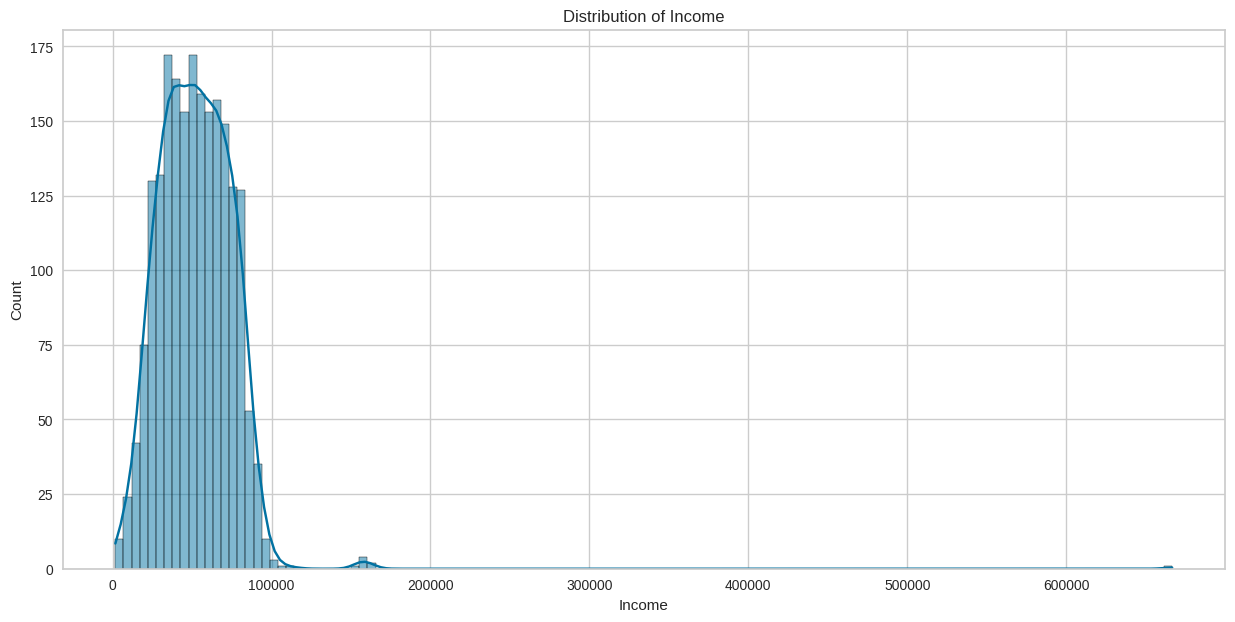

In [ ]:
#histogram for Income feature
plt.figure(figsize=(15, 7))
sns.histplot( x="Income",data=data, kde=True)
plt.title("Distribution of Income")
plt.show()

We can observe some extreme values on the right tail. Lets visualize using box plot to get more insights

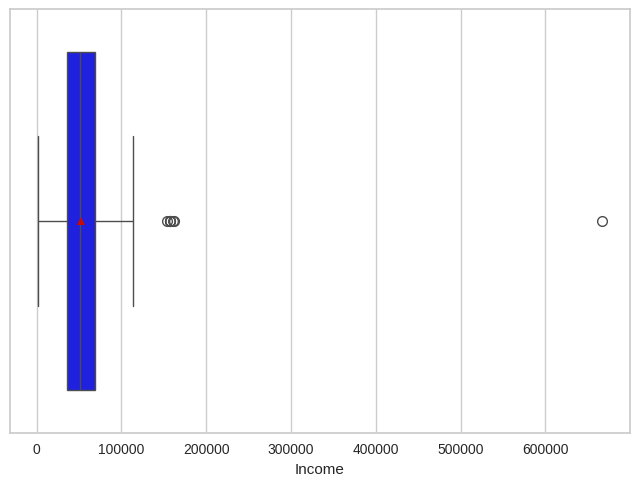

In [ ]:
# box plot for income feature
sns.boxplot(data=data, x="Income",showmeans=True, color="blue")
plt.show()

The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Lets analyze these values

In [ ]:
# Calculating the upper whisker for the Income variable

Q1 = data['Income'].quantile(q=0.25)
Q3 = data['Income'].quantile(q=0.75)
IQR = Q3-Q1
upper_whisker = (Q3 + 1.5 * IQR)
print(upper_whisker)

117053.625


In [ ]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   2014-03-01       98        20          2  ...                   22   
617   2013-06-03       31        85          1  ...                    0   
655   2014-02-07       81         1          1  ...                    0   
687   2012-08-04       21        55         16  ...                   28   
1300  2013-06-04       37        39          1  ...                    0   
1653  2013-04-29       13         1          0  ...                   28   
2132  2013-08-29       85         2          1  ...                    0   
2233  2013-06-02       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

We found that the upper_whisker value is at 117053.625 and there are 8 observations which are more than upper whisker value. Though they are extreme values we can flag them as high income category for marketing but there is one extreme value which can be an outlier and we can drop that row

In [ ]:
 #Dropping observations identified as outliers
data = data[data.index != 2233]
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1986  Graduation         Single  26816.0        0         0   
2235        1967  Graduation        Married  61223.0        0         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       58       635         88  ...                   10   
1     2014-03-08       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-02-10       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2232  2012-08-17       50         5          1  ...                    0   
2235  2013-06-13       46       709         43  ...                    3   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2232                  3                  4             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2232             0             0             0         0         0  
2235             0             0             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2057 rows x 26 columns]

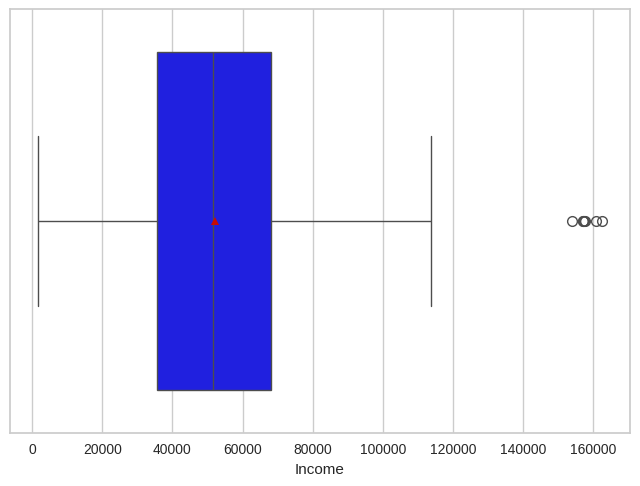

In [ ]:
# box plot for income feature
sns.boxplot(data=data, x="Income",showmeans=True, color="blue")
plt.show()

**Distribution of MntWines**

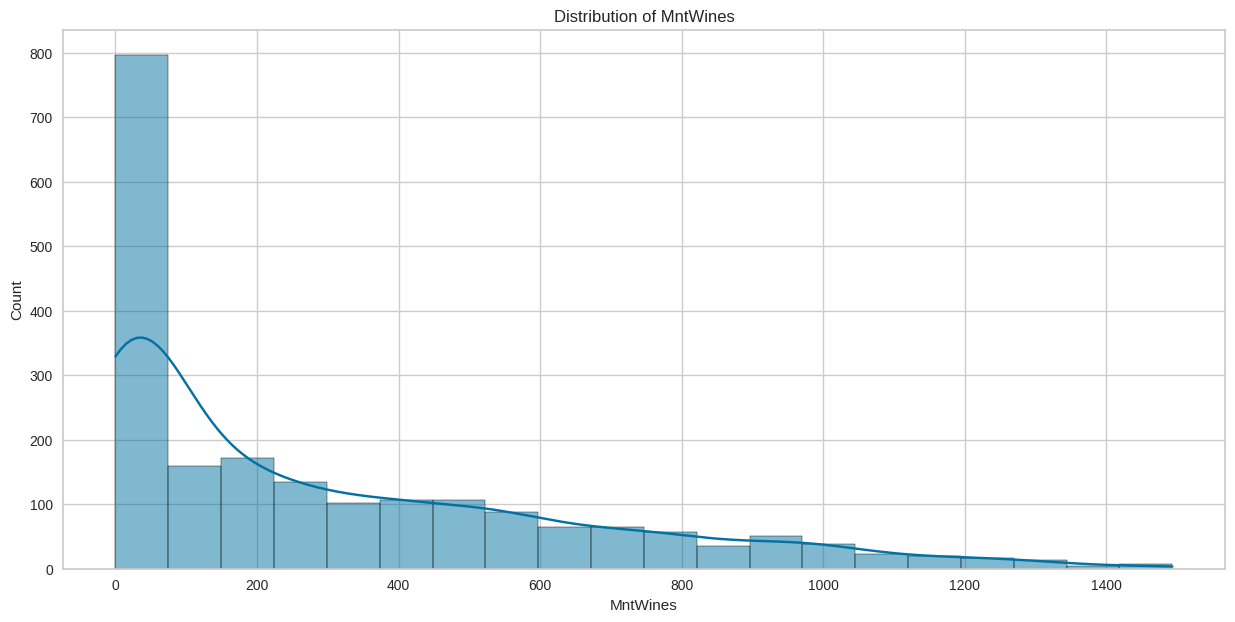

In [ ]:
# Plot the histogram for 'MntWines'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntWines",data=data, kde=True)
plt.title("Distribution of MntWines")
plt.show()

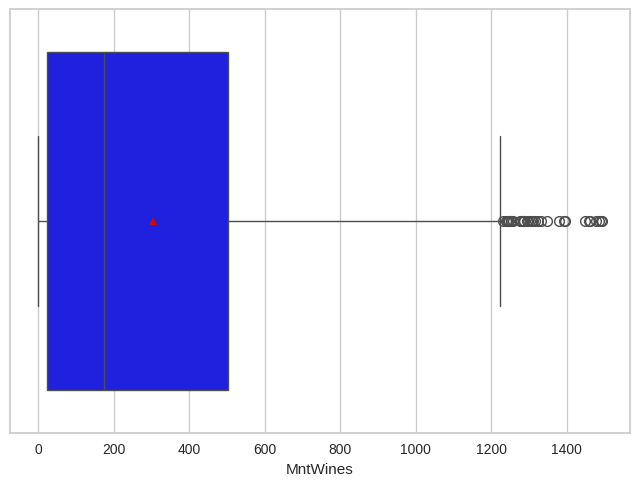

In [ ]:
# box plot for MntWines
sns.boxplot(data=data, x="MntWines",showmeans=True, color="blue")
plt.show()

observations
  
  * multiple customers spending over 1000 units on wine — these are statistical outliers based on the IQR rule.
  * most customers spend between ~25th percentile and ~75th percentile, likely around 24 to 504 units.

**Distribution of MntFruits**

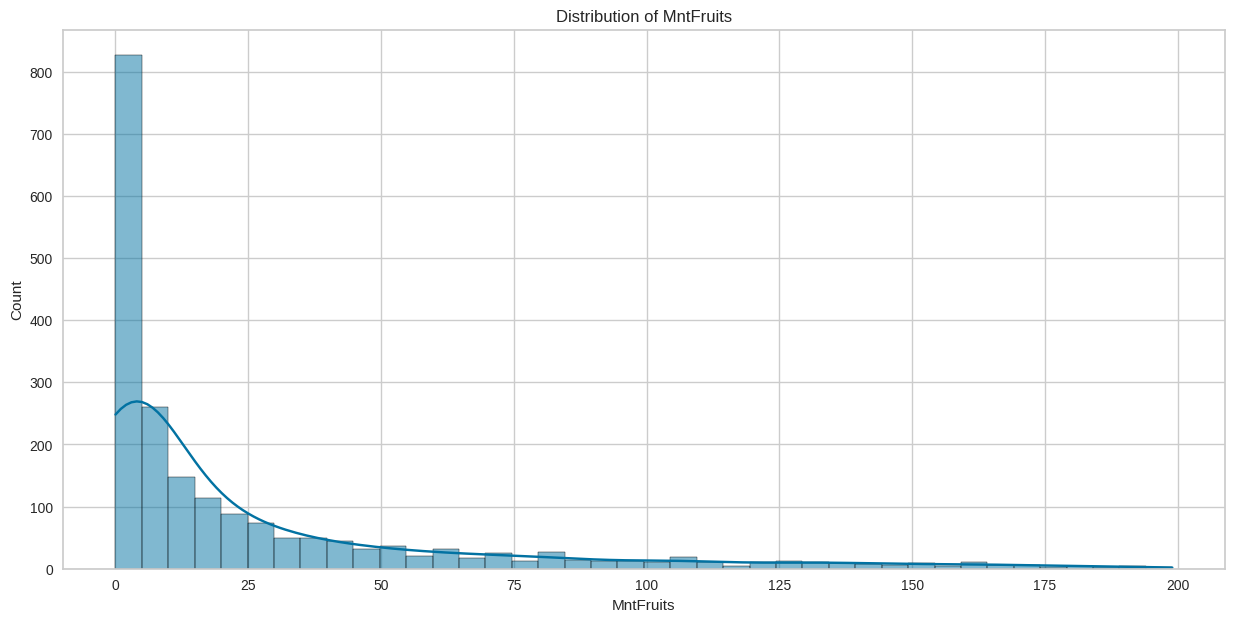

In [ ]:
# Plot the histogram for 'MntFruits'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntFruits",data=data, kde=True)
plt.title("Distribution of MntFruits")
plt.show()


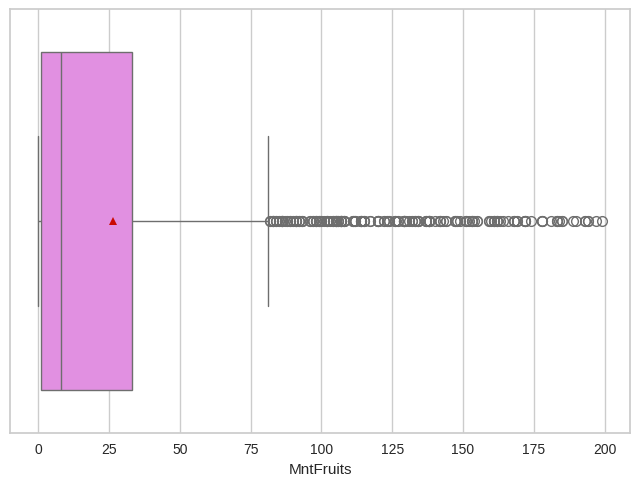

In [ ]:
# boxplot for MntFruits
sns.boxplot(data=data, x='MntFruits',showmeans=True, color="violet")
plt.show()

Observations:

* The boxplot shows a median around 8–10, meaning 50% of your customers spend that amount or less on fruits
* The overall mean for MntFruits ~26 slightly right shift from the median due to some customers spending more on right tail
* Most customers spend between ~2 to ~30 on fruit products.



**Distribution of MntMeatProducts**

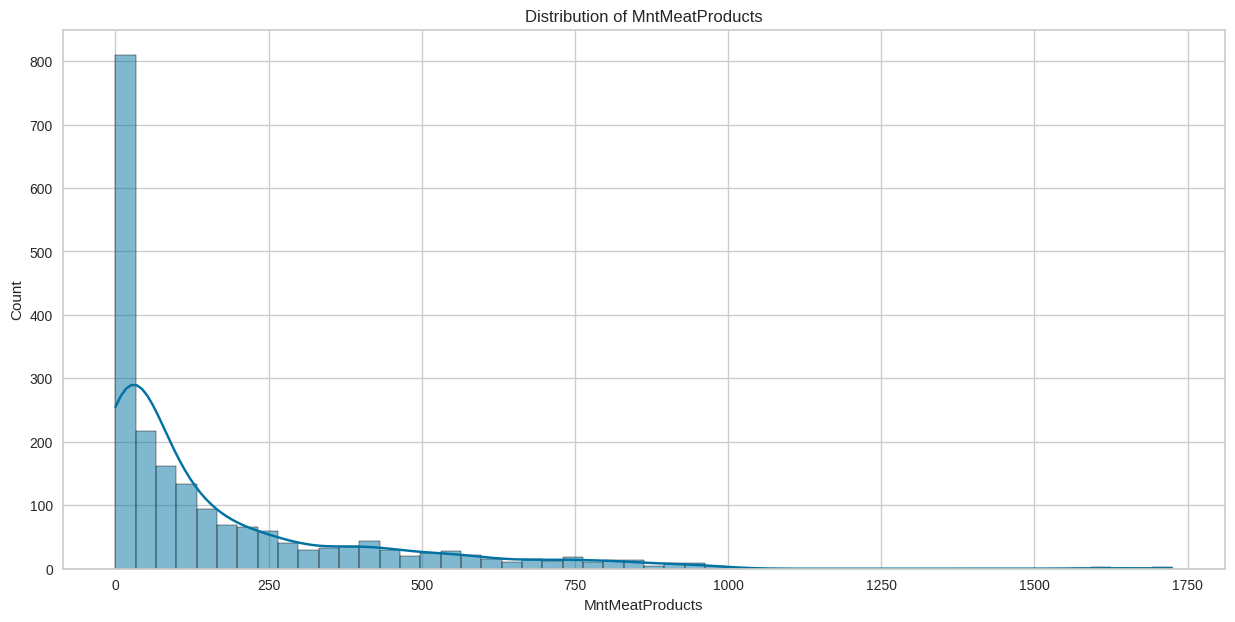

In [ ]:
# Plot the histogram for 'MntMeatProducts'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntMeatProducts",data=data, kde=True)
plt.title("Distribution of MntMeatProducts")
plt.show()

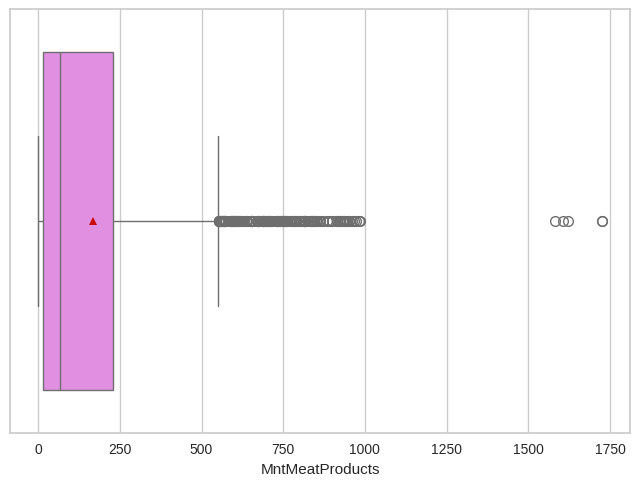

In [ ]:
# box plot for MntMeatProducts
sns.boxplot(data=data, x='MntMeatProducts',showmeans=True, color="violet")
plt.show()

Observations:
* The boxplot shows that most customers spend moderately on meat, but a valuable minority spends a lot.
* Median looks to be around ~150–175, meaning 50% of customers spend less than that on meat products.



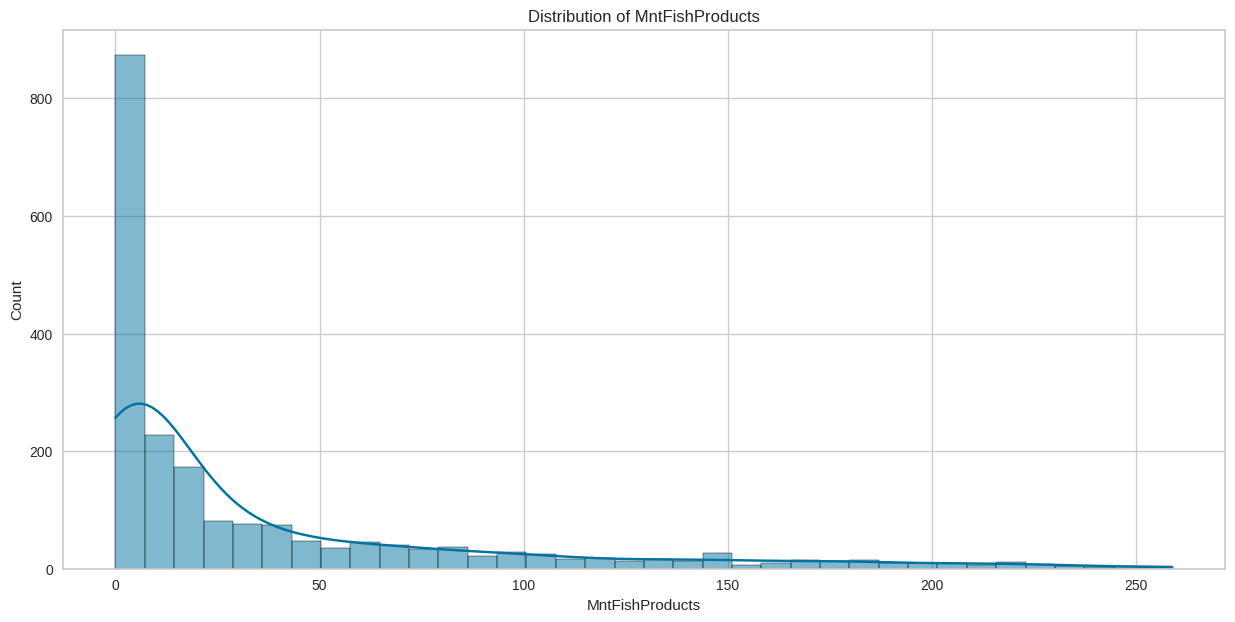

In [ ]:
# Plot the histogram for 'MntFishProduct'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntFishProducts",data=data, kde=True)
plt.title("Distribution of MntFishProducts")
plt.show()

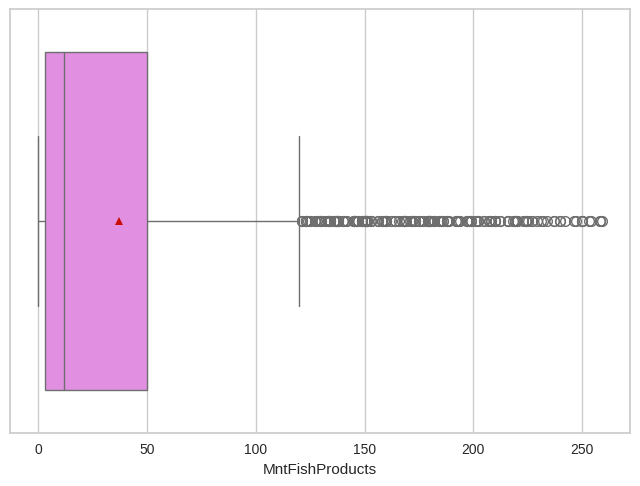

In [ ]:
# boxplot for fish products
sns.boxplot(data=data, x='MntFishProducts',showmeans=True, color="violet")
plt.show()

Observation:

* Most customers spend very little on fish products — majority under $60.

* Distribution is skewed: a few customers spend a lot more, pushing the mean up.

* Frequent outliers: suggests that while it's not a mass favorite, some niche customers value fish highly.

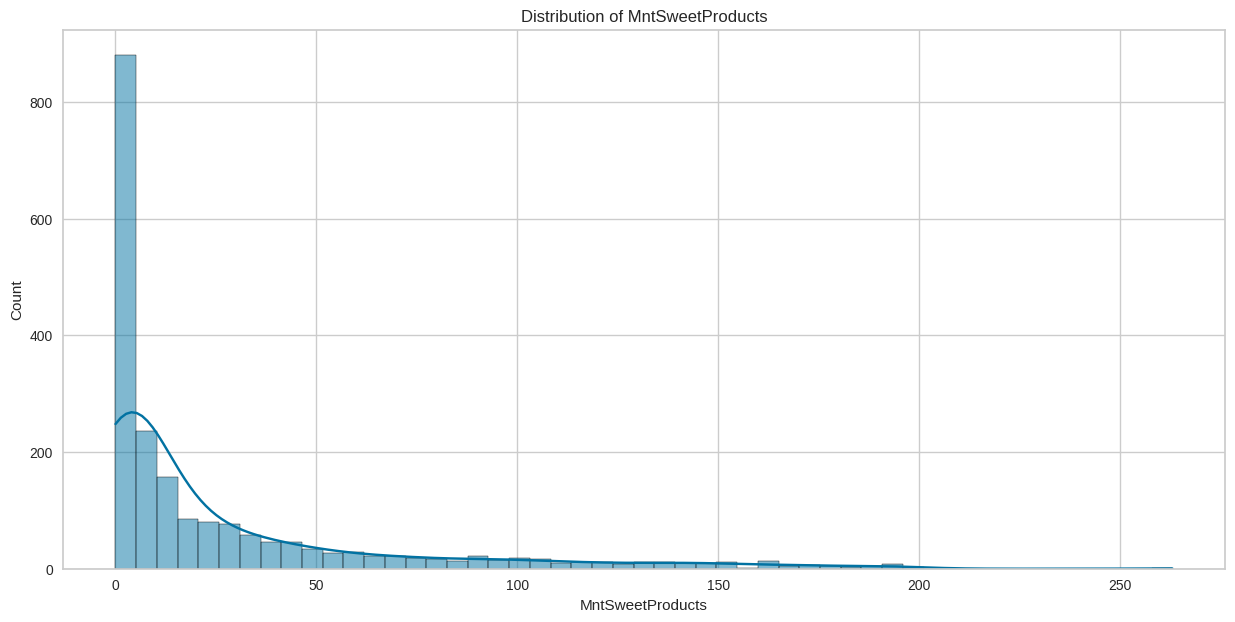

In [ ]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntSweetProducts",data=data, kde=True)
plt.title("Distribution of MntSweetProducts")
plt.show()

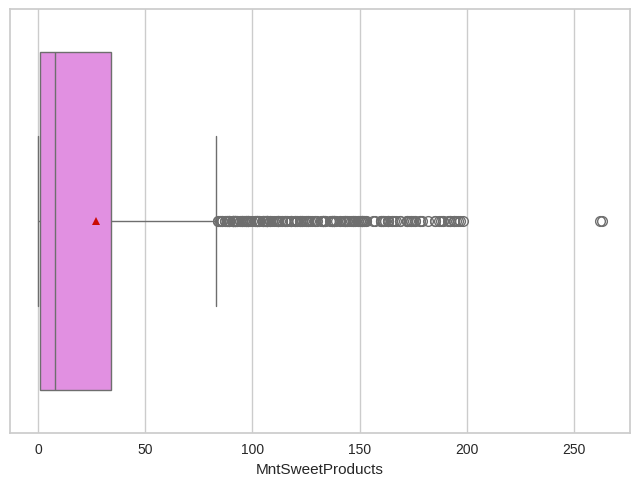

In [ ]:
# box plot for MntsweetProducts
sns.boxplot(data=data, x='MntSweetProducts',showmeans=True, color="violet")
plt.show()

Observation;
* The plot shows most customers spend little on sweet products, but there’s a niche high-value group.

* The majority spend less than $45, with 50% under 20

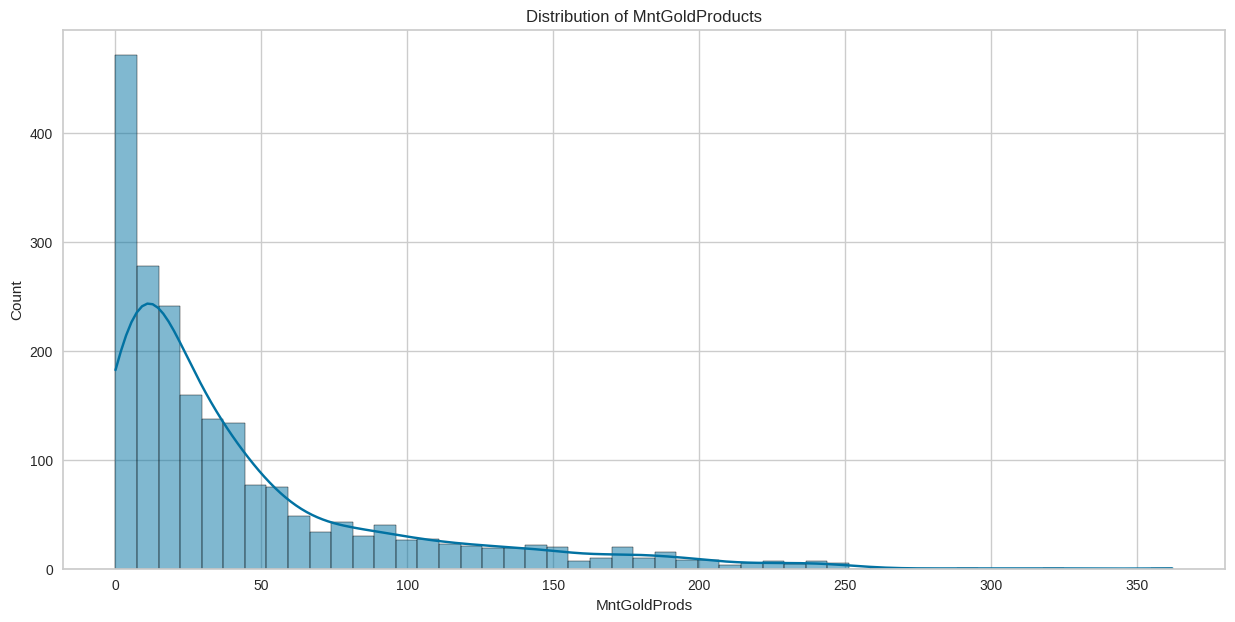

In [ ]:
# Plot the histogram for 'MntGoldProducts'
plt.figure(figsize=(15, 7))
sns.histplot( x="MntGoldProds",data=data, kde=True)
plt.title("Distribution of MntGoldProducts")
plt.show()


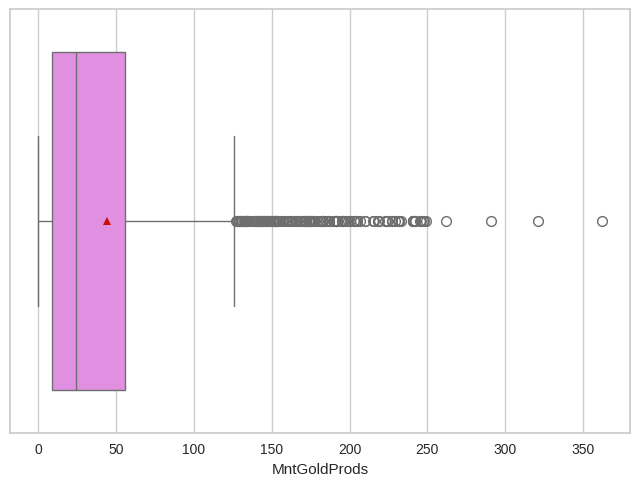

In [ ]:
# box plot for MntGoldProds
sns.boxplot(data=data, x='MntGoldProds',showmeans=True, color="violet")
plt.show()


Observation

 General Trend:
Majority of customers spend between 10 and $70 on gold products.

The typical customer is a light/moderate buyer.

 High Spenders:
Some customers spend 150 to $360, and are clearly outliers.

They may represent a premium-focused segment or gift buyers.



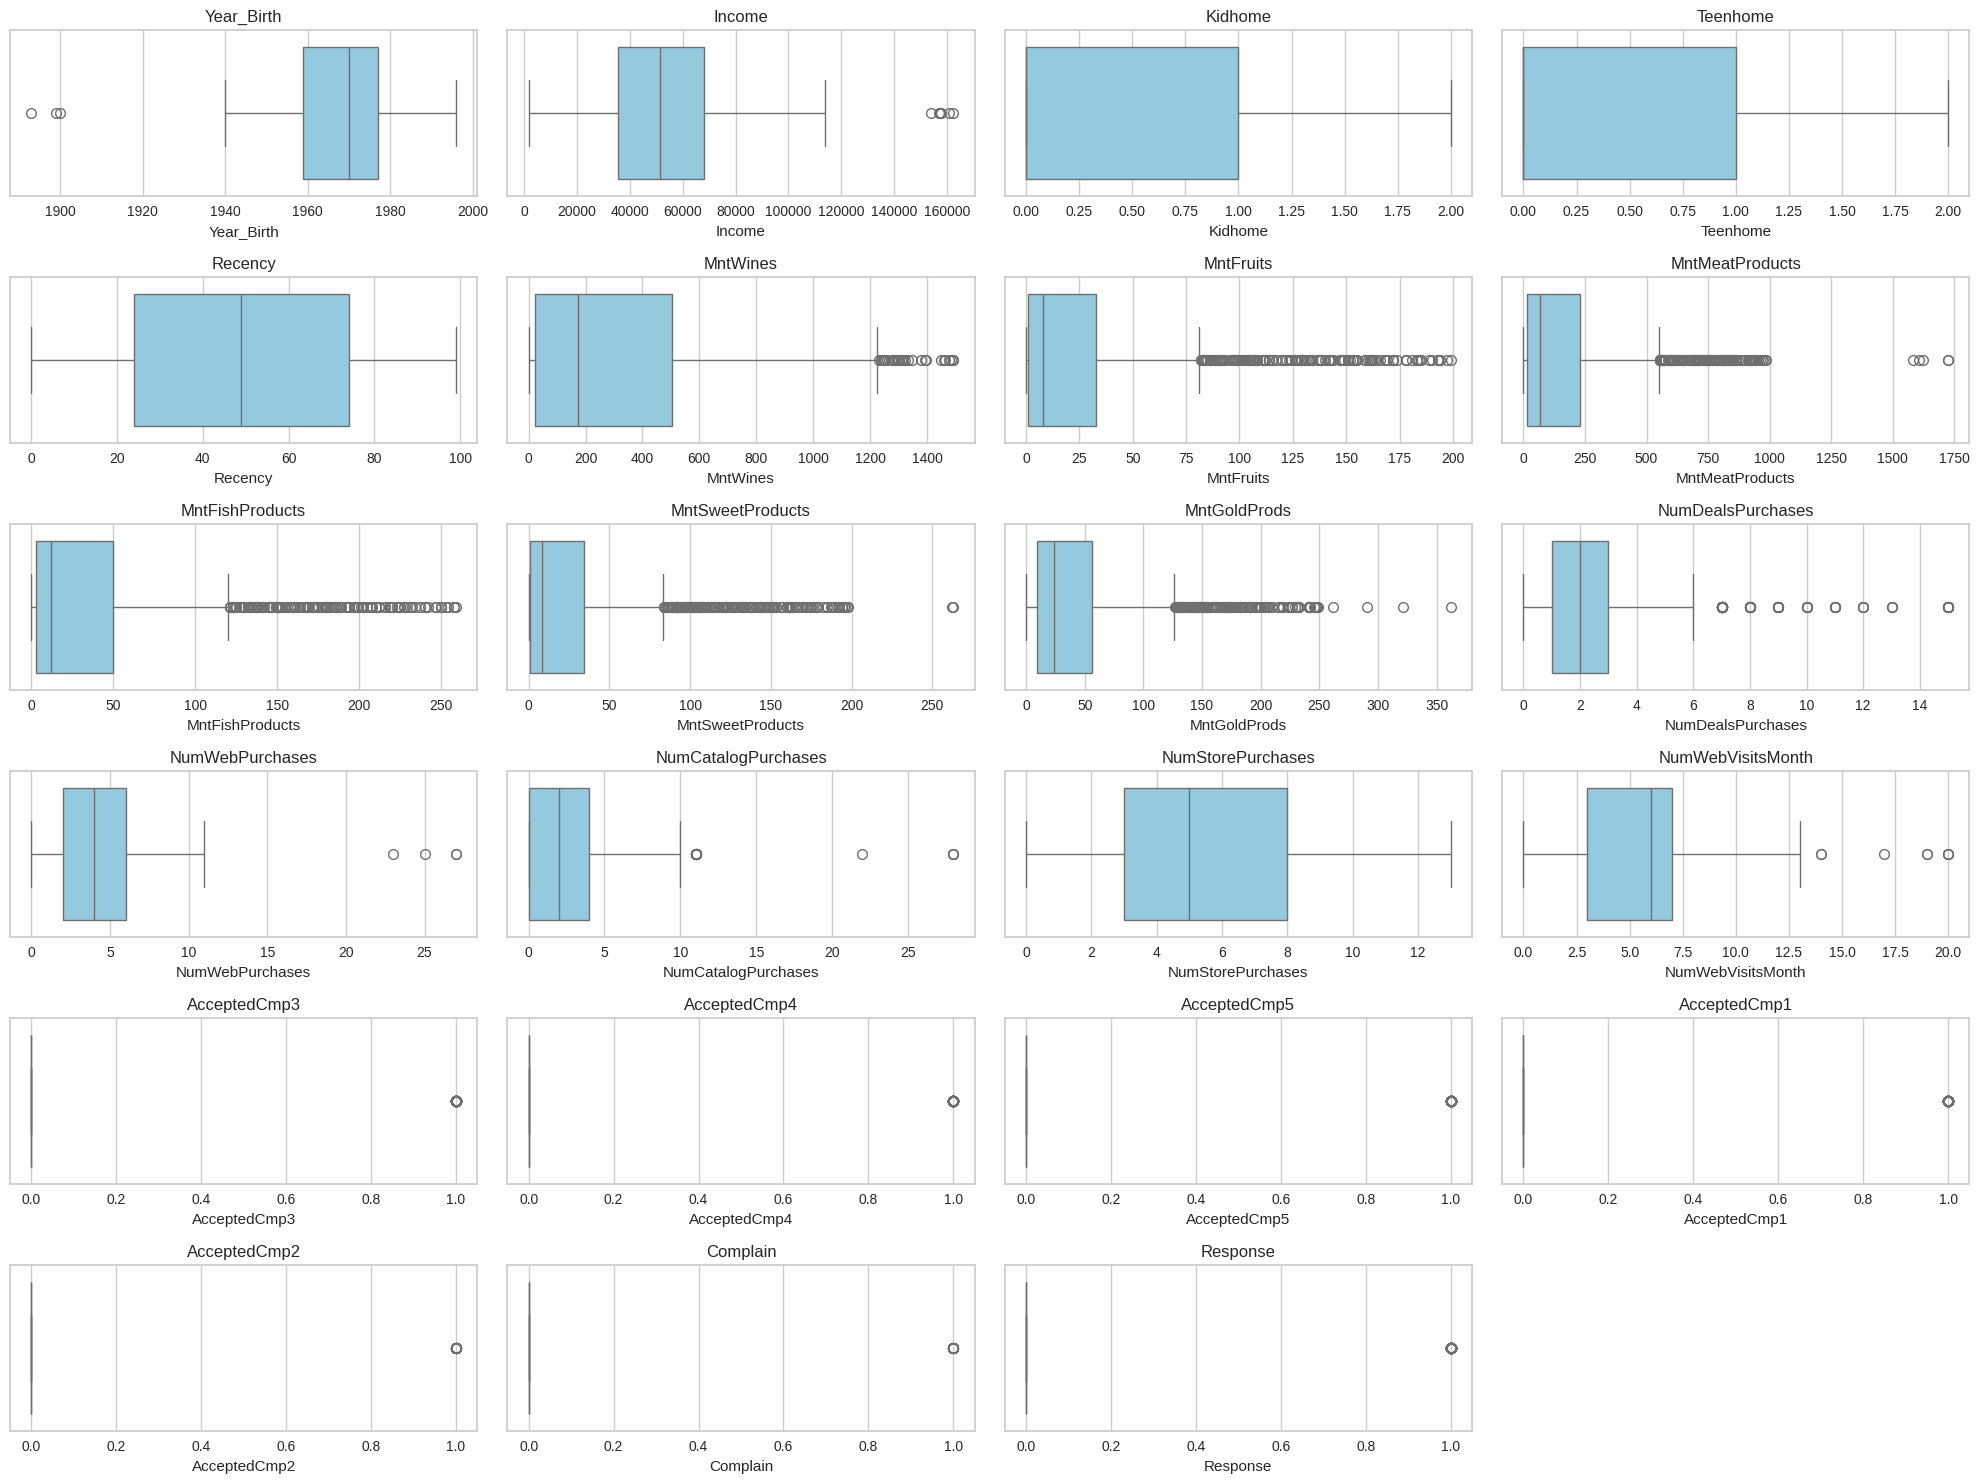

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)  # 5 rows × 4 columns = 20 plots
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

**Univariate analysis -  Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [ ]:
def perc_on_bar(data, z):
    total = data[z].notna().sum()
    count_series = data[z].value_counts()
    perc_series = data[z].value_counts(normalize=True) * 100

    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=count_series.index)

    for p, label in zip(ax.patches, perc_series):
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(f'{label:.1f}%', (x, y), size=12)

    plt.show()


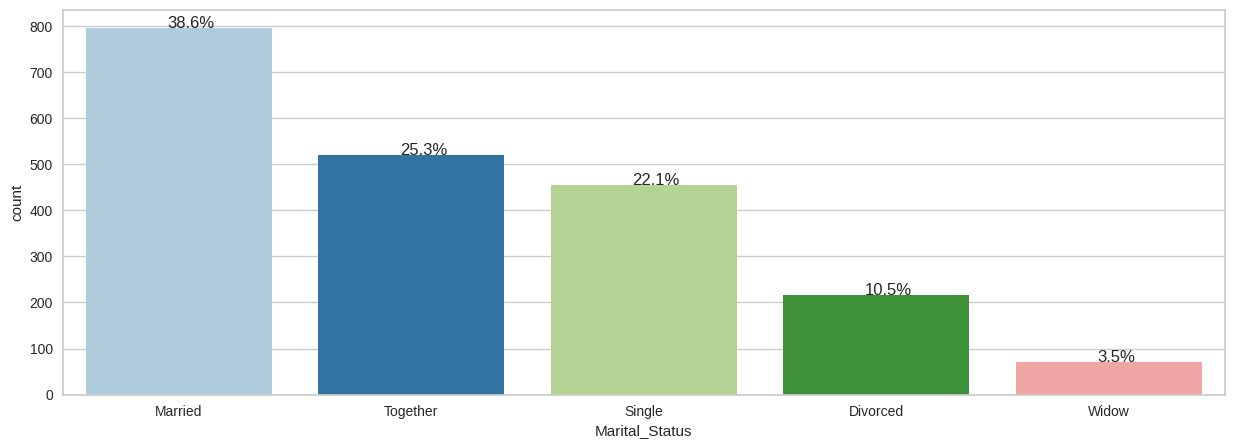

In [ ]:
# Bar plot for 'Marital_Status'
perc_on_bar(data, 'Marital_Status')

Observations:

* Married individuals represent the largest segment in the dataset, accounting for approximately 39% of the total customers.

* Widowed customers form the smallest group, with only 3.5%, indicating a minimal presence in the marketing base.

* Single individuals and those living together (cohabiting couples) are observed in similar proportions, at 22.1% and 25.3% respectively.

* The Divorced category contributes to 10.5% of the observations, suggesting a moderate representation in the customer base.


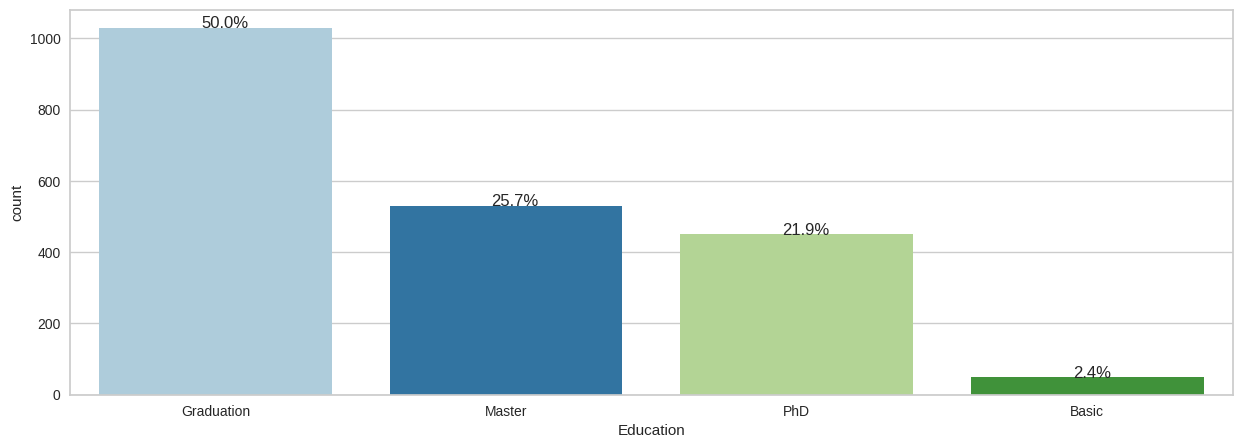

In [ ]:
# bar plot for Education
perc_on_bar(data, 'Education')

observations:

* Nearly half of the customers in the dataset are Graduates, making it the most common education level.

* A little over one-fourth of the customers (~26%) have obtained a Master’s degree.

* Around 22% of the customers hold a PhD, indicating a highly educated segment.

* Only 2.4% of the customers have received Basic education, representing a very small portion of the dataset.

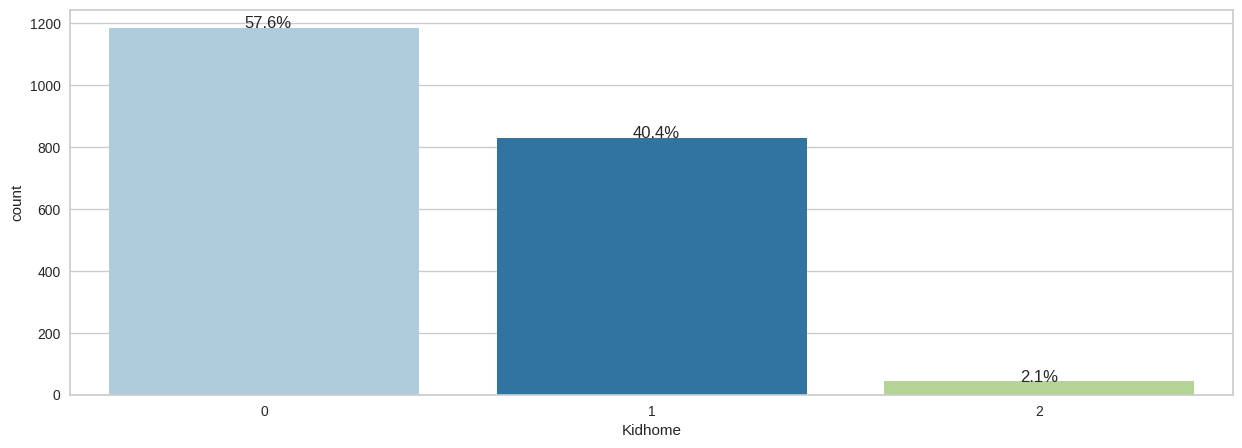

In [ ]:
# barplot of kidhome
perc_on_bar(data, 'Kidhome')

Observations:

* Interestingly, over 50% of the customers do not have any kids at home.

* A very small portion (~2%) of customers have 2 kids living with them.

* The remaining customers have exactly 1 child at home, representing a moderate segment of the population.







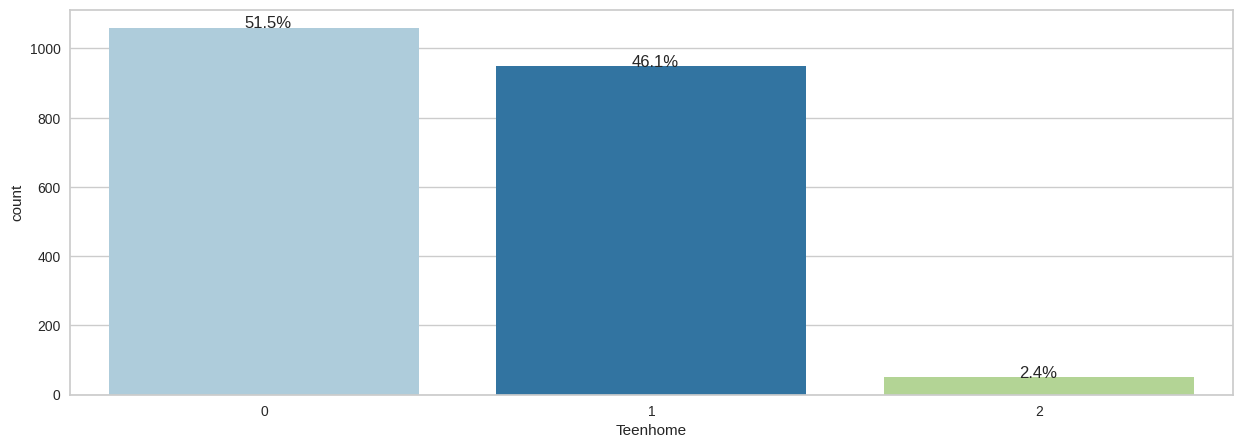

In [ ]:
# barplot of teen home
perc_on_bar(data, 'Teenhome')

Observations:

* Same as above just 2.4 % having 2 teens
* half of the customers don't have teen and 46.% had a teen at home

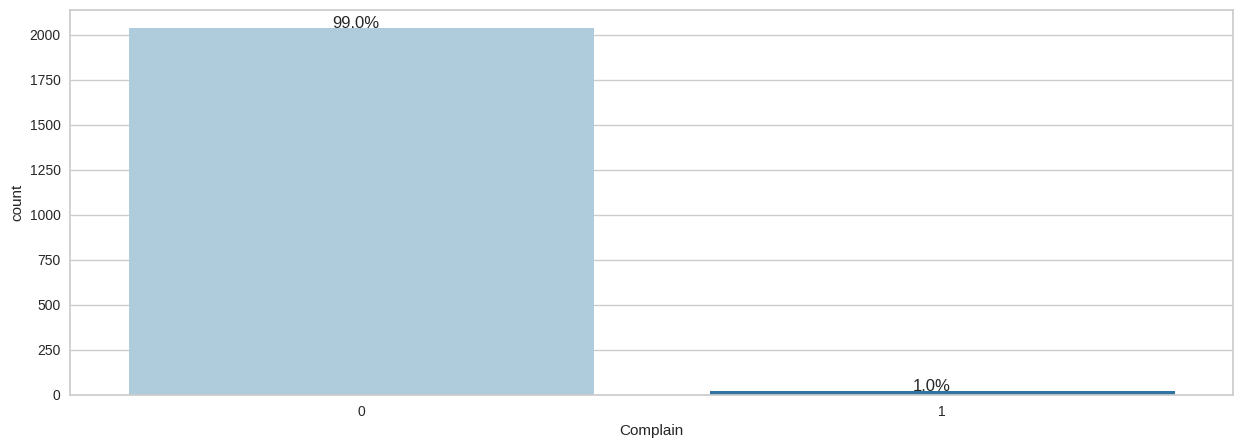

In [ ]:
#bar plot for Complain
perc_on_bar(data, 'Complain')

Obseravtion:

* only 1% of entire dataset raised concerns about the service recieved. This is good sign but still needs this number in low

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

**Correlation Heat map**

Heat map help to find correlation between numerical features

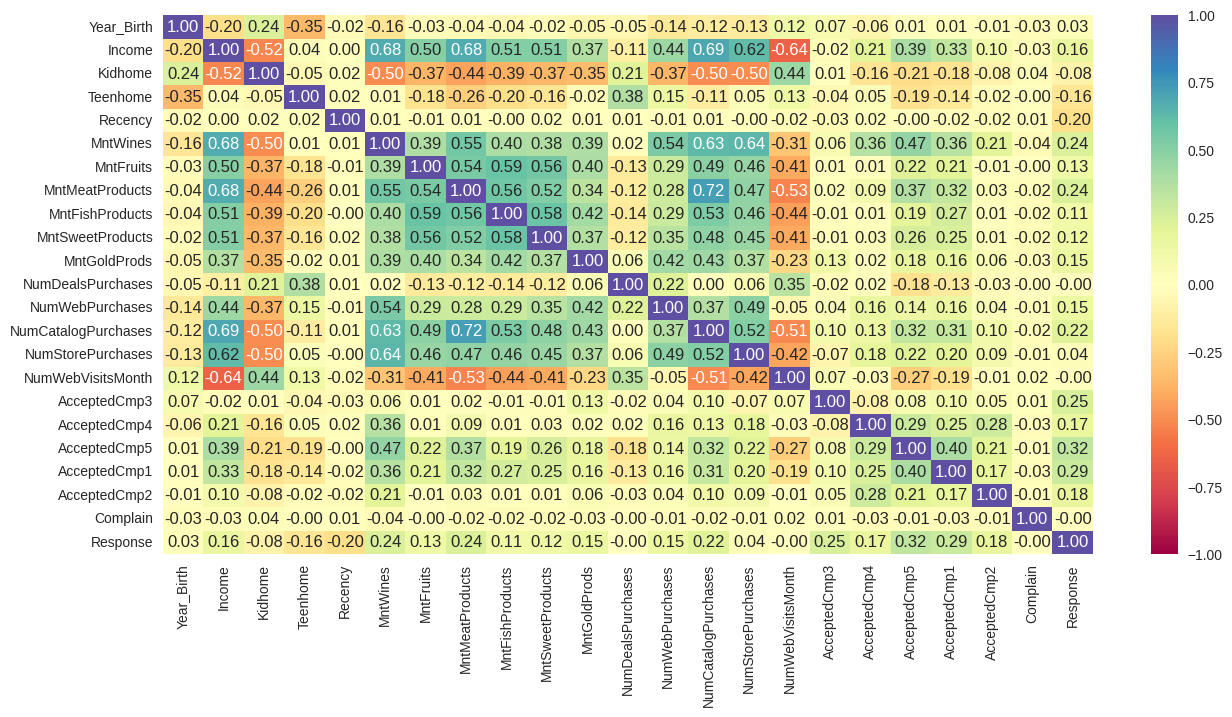

In [ ]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# correlation Plot
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" ,annot=True)
plt.show()

**Observations:**

* Most features exhibit negative or weak correlations with each other, suggesting limited linear dependency across many variables.

* The dataset contains variables that are minimally correlated with some features while showing moderate to strong correlations with others — indicating diverse customer behavior patterns.

* Income shows a strong positive correlation with catalog purchases and has a similar correlation with the amount spent on wine and meat products, suggesting that higher-income customers are more inclined toward premium or bulk purchases.

* There is a notable positive correlation between the amount spent on wine and meat products and catalog purchases, implying that customers who spend more on these products tend to engage more with catalog buying.

* Product-related features such as meat, fish, fruits, and gold show moderate positive correlations with each other, indicating shared spending tendencies across these categories.

* Purchase channels like web, store, and catalog purchases are also positively correlated with spending on various products — though some relationships are minimal, highlighting varied channel preferences among customer segments.

**Let's check the relationship of numerical variables with categorical variables.**

**Education Vs Income**

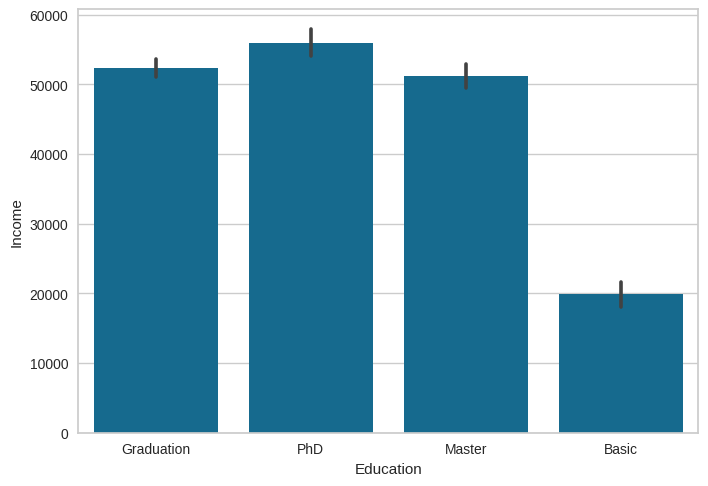

In [ ]:
# plotting barplot for education vs income
sns.barplot(x="Education", y="Income", data=data)
plt.show()

**Observation:**
* Customers with a PhD have the highest average income among all education levels.

* Those with a Graduation degree follow closely behind, but their average income is slightly lower than PhD holders.

* Masters also earn a comparable income, though marginally lower than those with postgraduate degrees.

* Individuals with a Basic education earn significantly less on average than all other groups — indicating a strong positive association between higher education and income levels.

* The income distribution is relatively stable across the top three education categories, while Basic stands out with a notable gap,

**Marital Status Vs Income**

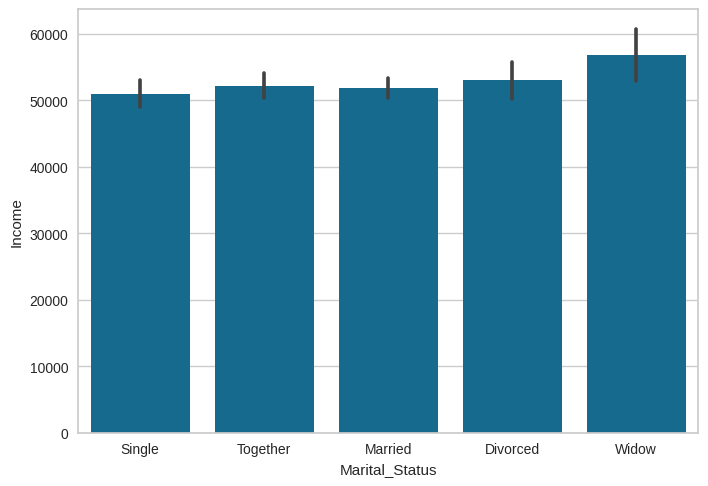

In [ ]:
# plotting Marital Status Vs Income

sns.barplot(x="Marital_Status", y="Income", data=data)
plt.show()

Observations:

* Widowed individuals appear to have the highest average income among all marital status categories.

* Customers who are Divorced or living Together also earn slightly more than those who are Single or Married.

* Single customers tend to have the lowest average income, which may reflect younger age or early career stages.

**Kidhome Vs Income**

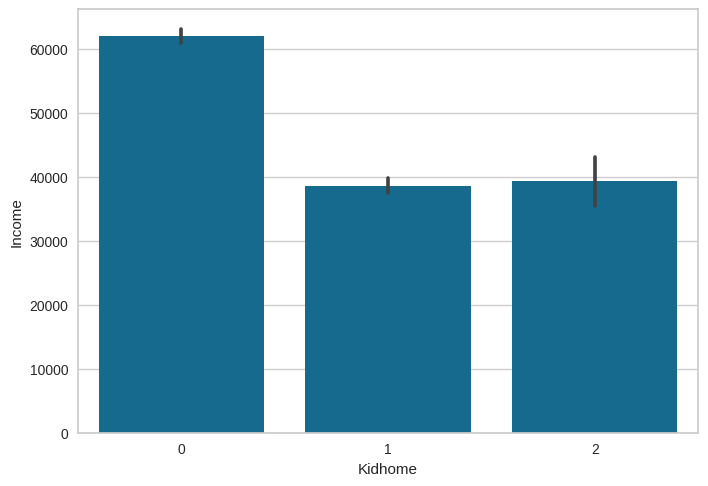

In [ ]:
# plotting Kidhome Vs Income
sns.barplot(x="Kidhome", y="Income", data=data)
plt.show()

Observation:

* People who don't have kids has highesh average income compared to who have kids
* People with one kid & 2 kids home average earnings are almost similar with the latter having an edge

**Kidhome vs MntFish Products**

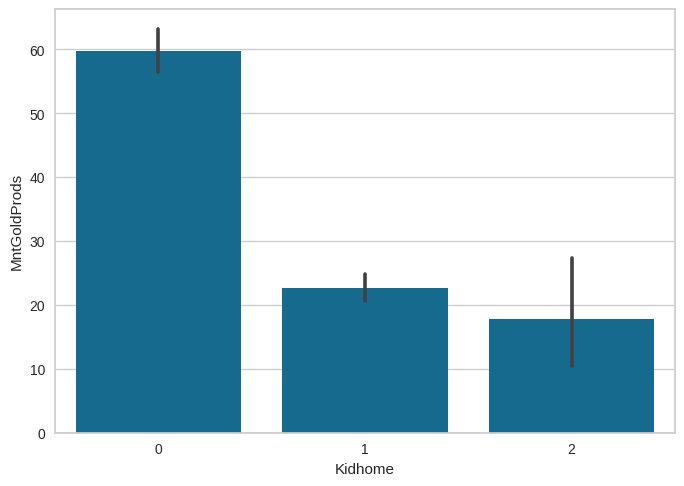

In [ ]:
# plotting kidhome vs amount spent of fish products
sns.barplot(x="Kidhome", y="MntGoldProds", data=data)
plt.show()

**Teenhome Vs MntWine**

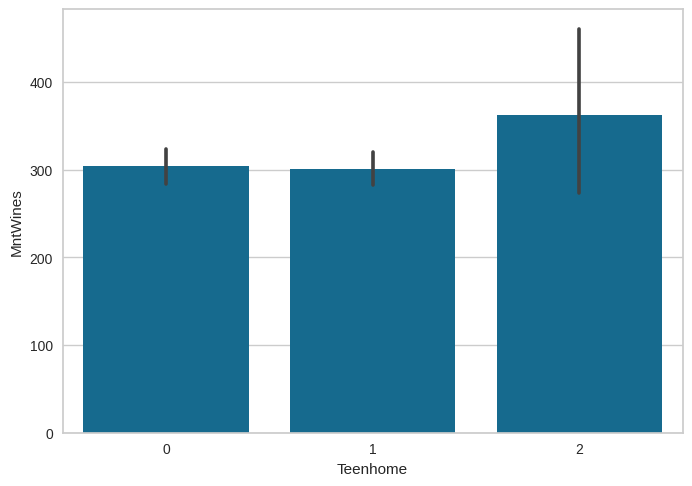

In [ ]:
# plotting teen home vs amount spent on wine
sns.barplot(x="Teenhome", y="MntWines", data=data)
plt.show()

**Income vs catalog purchase**

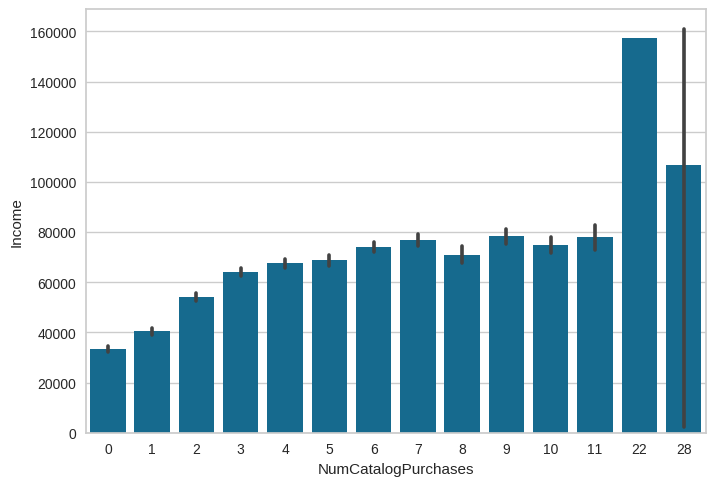

In [ ]:
# plotting Income vs catalog purchase
sns.barplot(y="Income", x="NumCatalogPurchases", data=data)
plt.show()


**Marital_Status and Kidhome**

<Axes: xlabel='Marital_Status'>

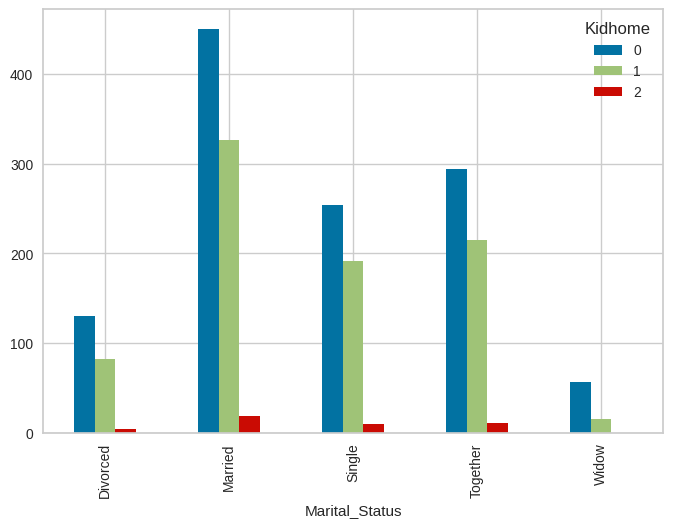

In [ ]:
# plotting for for Marital_Status and Kidhome
pd.crosstab(data['Marital_Status'], data['Kidhome']).plot(kind='bar', stacked=False)

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [ ]:
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1986  Graduation         Single  26816.0        0         0   
2235        1967  Graduation        Married  61223.0        0         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       58       635         88  ...                   10   
1     2014-03-08       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-02-10       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2232  2012-08-17       50         5          1  ...                    0   
2235  2013-06-13       46       709         43  ...                    3   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2232                  3                  4             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2232             0             0             0         0         0  
2235             0             0             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2057 rows x 26 columns]

In [ ]:
# extract the age of each customer and create a new feature subtracting year_birth from 2016 will give us the age of the customer at the time of data collection in 2016
data["Age"] = 2016 - data["Year_Birth"]
data["Age"].sort_values()
data['Age'].unique()

array([ 59,  62,  51,  32,  35,  49,  45,  31,  42,  66,  33,  40,  57,
        64,  29,  70,  36,  67,  34,  37,  65,  47,  30,  27,  53,  46,
        43,  73,  41,  20,  48,  52,  39,  38,  61,  50,  28,  68,  58,
        44,  56,  71,  25,  54,  63,  55,  60,  24, 116, 123,  26,  69,
       117,  23,  22,  75,  72,  21,  76])

As we can see in the data set there are people with age more than 100 years which couldn't be the case really. We can drop those observations

In [ ]:
# Drop the observations with age > 100
data = data[data['Age']<=100]
data['Age'].unique()

array([59, 62, 51, 32, 35, 49, 45, 31, 42, 66, 33, 40, 57, 64, 29, 70, 36,
       67, 34, 37, 65, 47, 30, 27, 53, 46, 43, 73, 41, 20, 48, 52, 39, 38,
       61, 50, 28, 68, 58, 44, 56, 71, 25, 54, 63, 55, 60, 24, 26, 69, 23,
       22, 75, 72, 21, 76])

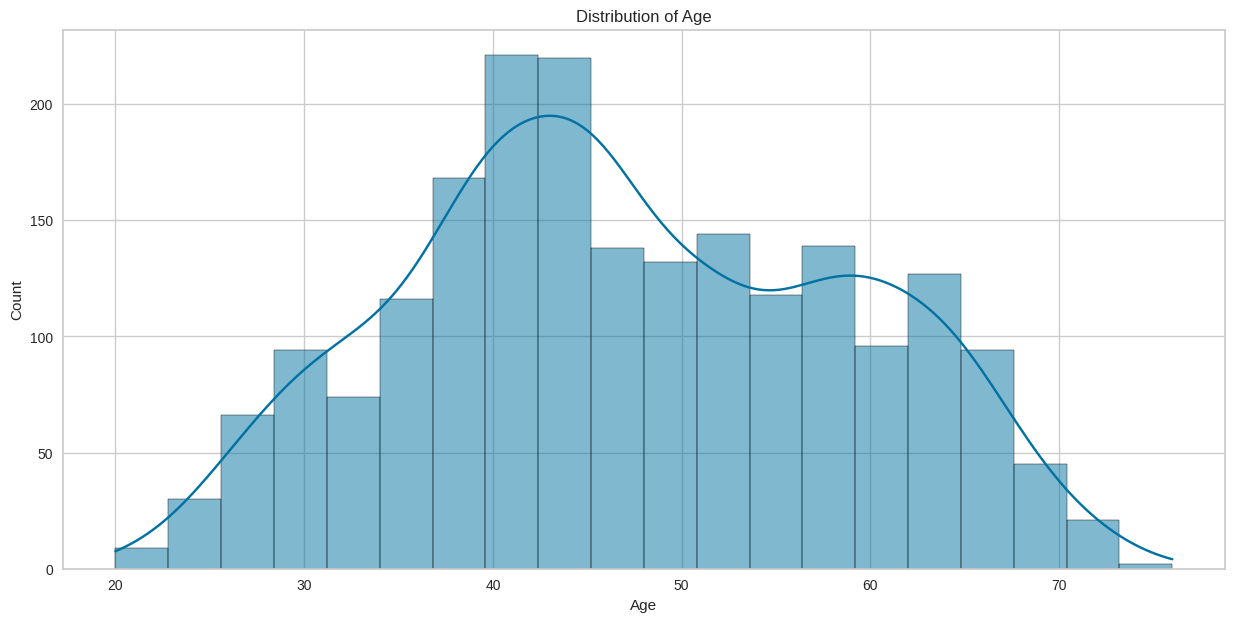

In [ ]:
# distribution of AGE column
plt.figure(figsize=(15, 7))
sns.histplot( x="Age",data=data, kde=True)
plt.title("Distribution of Age")
plt.show()

**Observations**:
* The curve roughly follows a normal distribution, indicating most customers fall into a central age range.

* The highest number of customers are aged between 40 and 45.

* A mild right (positive) skew can be observed, as the tail on the right (older age) is slightly longer.Suggests a few older customers (possibly in the 60s–70s).

In [ ]:
# Finding the total kids and teens in the home
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Kids'].unique()
data['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2232    0
2235    1
2237    0
2238    1
2239    2
Name: Kids, Length: 2054, dtype: int64

**Findind out how many members each family has**

* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [ ]:
# Check the unique categories in Marial_Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* We can combine subcategories like Single, divorced and widow as 'single' and Together, Married as 'relationship'
* We can create another variable called 'Status' and assign 1 for single 2 for relationship
* Then will use the Kids column we created above to find the family size

In [ ]:
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1986  Graduation         Single  26816.0        0         0   
2235        1967  Graduation        Married  61223.0        0         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0     2012-09-04       58       635         88  ...                  7   
1     2014-03-08       38        11          1  ...                  5   
2     2013-08-21       26       426         49  ...                  4   
3     2014-02-10       26        11          4  ...                  6   
4     2014-01-19       94       173         43  ...                  5   
...          ...      ...       ...        ...  ...                ...   
2232  2012-08-17       50         5          1  ...                  4   
2235  2013-06-13       46       709         43  ...                  5   
2237  2014-01-25       91       908         48  ...                  6   
2238  2014-01-24        8       428         30  ...                  3   
2239  2012-10-15       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2232             0             0             0             0             0   
2235             0             0             0             0             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Response  Age  Kids  
0            0         1   59     0  
1            0         0   62     2  
2            0         0   51     0  
3            0         0   32     1  
4            0         0   35     1  
...        ...       ...  ...   ...  
2232         0         0   30     0  
2235         0         0   49     1  
2237         0         0   35     0  
2238         0         0   60     1  
2239         0         1   62     2  

[2054 rows x 28 columns]

In [ ]:
# Clubbing Single, Divorced, widow into "Single" column & Together, Married as 'relationship'
data.loc[(data['Marital_Status'] == 'Single') | (data['Marital_Status'] == 'Divorced') | (data['Marital_Status'] == 'Widow'), 'Marital_Status'] = 'Single'
data.loc[(data['Marital_Status'] == 'Together') | (data['Marital_Status'] == 'Married'), 'Marital_Status'] = 'Relationship'
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [ ]:
data['Marital_Status']

0             Single
1             Single
2       Relationship
3       Relationship
4       Relationship
            ...     
2232          Single
2235    Relationship
2237          Single
2238    Relationship
2239    Relationship
Name: Marital_Status, Length: 2054, dtype: object

In [ ]:
data['Status']= data['Marital_Status'].map({'Single':1,'Relationship':2})
data['Status']

0       1
1       1
2       2
3       2
4       2
       ..
2232    1
2235    2
2237    1
2238    2
2239    2
Name: Status, Length: 2054, dtype: int64

In [ ]:
# creating new column family size adding 'status' & 'kids'
data['Family_Size'] = data['Status'] + data['Kids']
data['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2232    1
2235    3
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2054, dtype: int64

Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [ ]:
#Create a new feature by Adding the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data['Expenses'] = data[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
data['Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2232      22
2235    1341
2237    1241
2238     843
2239     172
Name: Expenses, Length: 2054, dtype: int64

Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [ ]:
# creating new"NumTotalPurchases" column by adding all the channels
data['NumTotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data['NumTotalPurchases']

0       25
1        6
2       21
3        8
4       19
        ..
2232     4
2235    18
2237    19
2238    23
2239    11
Name: NumTotalPurchases, Length: 2054, dtype: int64

**finding out how long the customer has been with the company**

In [ ]:
# Check the minimum of the date
data['Dt_Customer'].min()

# Check the maximum of the date
data['Dt_Customer'].max()

# Convert the string "2015-01-01" to a datetime object
data["day"] = pd.to_datetime("2015-01-01")

data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days
data["Engaged_in_days"]

0       849
1       299
2       498
3       325
4       347
       ... 
2232    867
2235    567
2237    341
2238    342
2239    808
Name: Engaged_in_days, Length: 2054, dtype: int64

**Lets check the number of offers customers have accepted**

In [ ]:
# creating new feature "TotalAcceptedCmp" by adding all campaigns
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data['TotalAcceptedCmp']

0       0
1       0
2       0
3       0
4       0
       ..
2232    0
2235    0
2237    1
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2054, dtype: int64

**Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.**

In [ ]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase
data['AmountPerPurchase'] = data['Expenses'] / data['NumTotalPurchases']
data['AmountPerPurchase']



0       64.680000
1        4.500000
2       36.952381
3        6.625000
4       22.210526
          ...    
2232     5.500000
2235    74.500000
2237    65.315789
2238    36.652174
2239    15.636364
Name: AmountPerPurchase, Length: 2054, dtype: float64

In [ ]:
# Check the max value
data['AmountPerPurchase'].max()

inf

since we divided expense with total num of purchase if there are no purchases made by customer i.e 0 then it value be infinite. Lets find out such obseravation & drop them

In [ ]:
# Find how many observations have NumTotalPurchases equal to 0
data[data['NumTotalPurchases'] == 0]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
655         1975  Graduation         Single  153924.0        0         0   
981         1965  Graduation         Single    4861.0        0         0   
1524        1973  Graduation         Single    3502.0        1         0   
2132        1949         PhD   Relationship  156924.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  Kids  Status  \
655   2014-02-07       81         1          1  ...   41     0       1   
981   2014-06-22       20         2          1  ...   51     0       1   
1524  2013-04-13       56         2          1  ...   43     1       1   
2132  2013-08-29       85         2          1  ...   67     0       2   

      Family_Size  Expenses  NumTotalPurchases        day  Engaged_in_days  \
655             1         6                  0 2015-01-01              328   
981             1         6                  0 2015-01-01              193   
1524            2         5                  0 2015-01-01              628   
2132            2         8                  0 2015-01-01              490   

      TotalAcceptedCmp  AmountPerPurchase  
655                  0                inf  
981                  0                inf  
1524                 0                inf  
2132                 0                inf  

[4 rows x 36 columns]

In [ ]:
# Drop the observations with NumTotalPurchases equal to 0,
data = data[data['NumTotalPurchases'] != 0]

In [ ]:
# Check the summary statistics of the AmountPerPurchase variable
data['AmountPerPurchase'].describe()

count    2050.000000
mean       33.453939
std        46.290628
min         0.533333
25%         9.703571
50%        23.588235
75%        45.493750
max      1679.000000
Name: AmountPerPurchase, dtype: float64

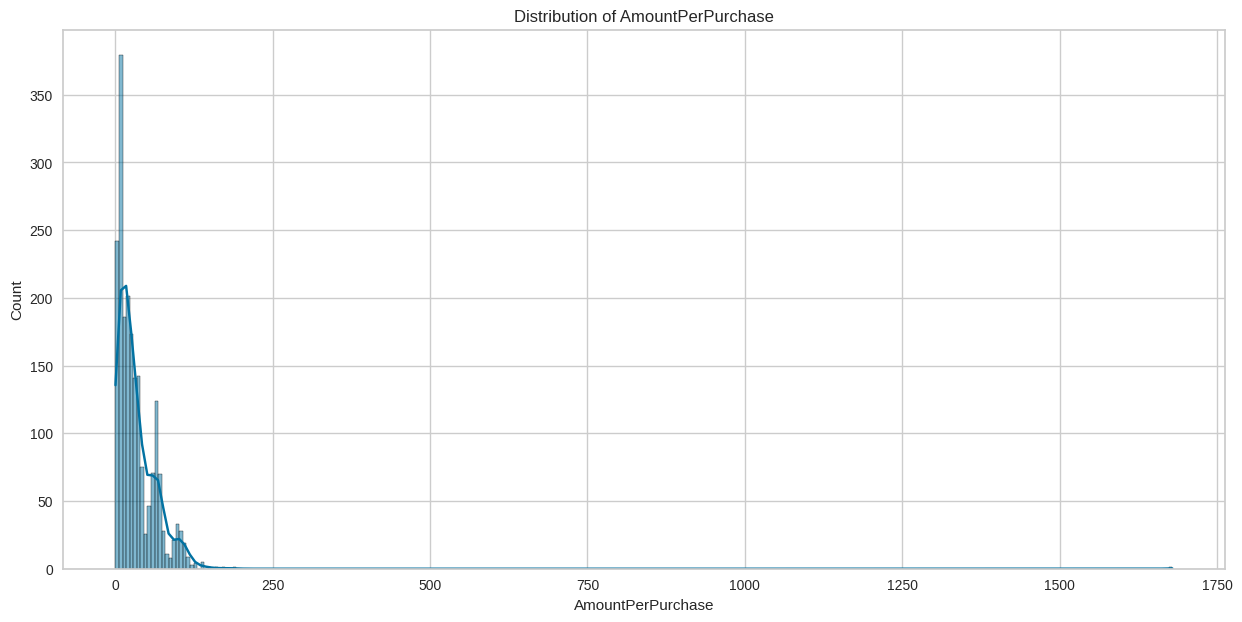

In [ ]:
#plotting histogram
plt.figure(figsize=(15, 7))
sns.histplot( x="AmountPerPurchase",data=data, kde=True)
plt.title("Distribution of AmountPerPurchase")
plt.show()


The max value is due to a single purchase made my the customer.

In [ ]:
max_value = data['AmountPerPurchase'].max()
data = data[data['AmountPerPurchase'] != max_value]

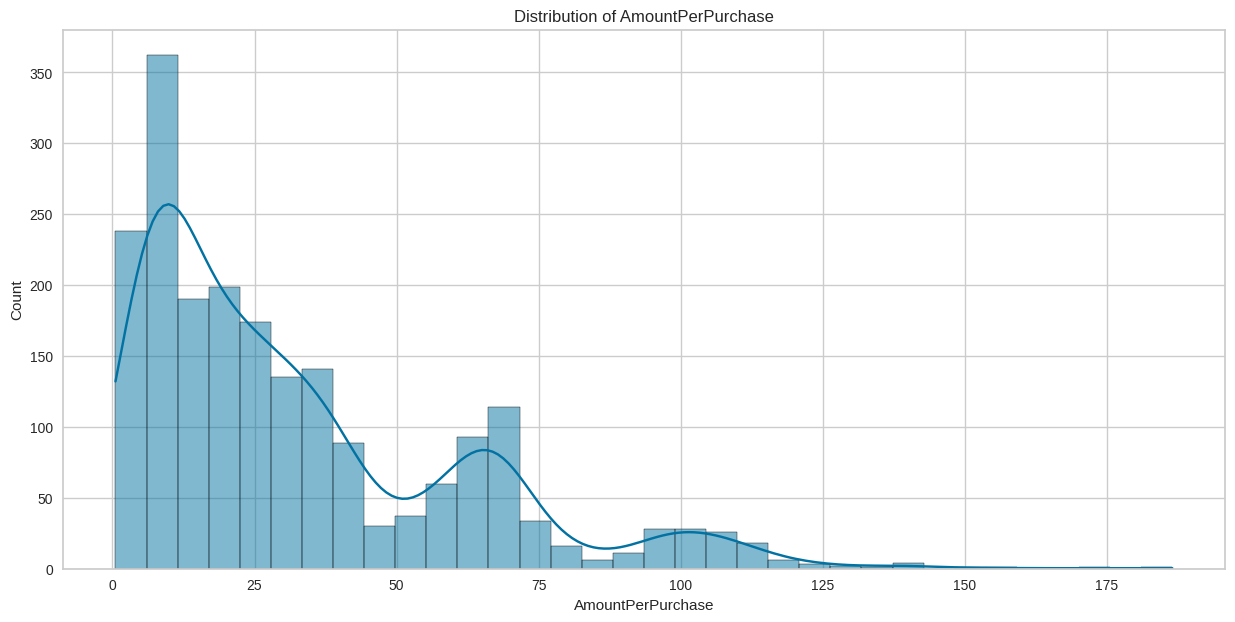

In [ ]:
#plotting histogram
plt.figure(figsize=(15, 7))
sns.histplot( x="AmountPerPurchase",data=data, kde=True)
plt.title("Distribution of AmountPerPurchase")
plt.show()

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

* Most customers are middle-aged, with a peak around 40–45 years.

* Over 50% of customers have no kids, and only a small fraction have 2 kids.

* A new feature combining Kidhome and Teenhome reveals that most families have zero or one dependent at home.

* By calculating total family size, it's clear that a majority of customers live in smaller households (1–3 members), which may influence product preferences and basket size.

  Income & Spending Patterns
  
* The average income is around $52,346, but there are a few extreme outliers (e.g., 666,666) that were treated during preprocessing.

* Customers tend to spend the most on wine and meat, while fruits, sweets, and gold receive lower spending.

* A newly engineered feature for total amount spent across all products shows wide variance, suggesting the presence of high-value and low-engagement segments.

  Purchase Behavior
* The feature AmountPerPurchase (total spend divided by total purchases) revealed skewed spending behavior, with a few customers making very expensive single purchases.

* Customers are more engaged with store purchases than web or catalog purchases, although catalog purchases show strong correlation with high income.

* There is a clear positive correlation between income and catalog engagement — higher-income individuals tend to purchase more through catalogs.

 Campaign Effectiveness
* Most promotional campaigns had low acceptance rates, with Campaign 2 performing the worst.

* A new column aggregating accepted campaigns revealed that a majority of customers did not accept any offers, suggesting a need for personalization or reevaluation of campaign strategy.

 Customer Tenure
* A derived feature for customer tenure (using Dt_Customer) showed that many customers have been with the company for several years, which can help in loyalty segmentation.

 Correlation Insights
* Income, wine/meat spending, and catalog purchases are moderately to highly correlated, indicating a distinct affluent customer segment.

* Purchase channels (web, store, catalog) show positive correlation with each other and with overall spend, suggesting multi-channel shoppers are more valuable.



## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(columns=[
    "Year_Birth",
    "Dt_Customer",
    "day",
    "Complain",
    "Response",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Marital_Status",
    "Status",
    "Kids",
    'Education',
    'Kidhome',
    'Teenhome', 'Income','Age', 'Family_Size'
], axis=1)

In [ ]:
#check shape of new data
data_model


Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2232       50         5          1                6                3   
2235       46       709         43              182               42   
2237       91       908         48              217               32   
2238        8       428         30              214               80   
2239       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2232                 4             3                  1                0   
2235               118           247                  2                9   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                      10                  4                  7      1617   
1                       1                  2                  5        27   
2                       2                 10                  4       776   
3                       0                  4                  6        53   
4                       3                  6                  5       422   
...                   ...                ...                ...       ...   
2232                    0                  3                  4        22   
2235                    3                  4                  5      1341   
2237                    3                 13                  6      1241   
2238                    5                 10                  3       843   
2239                    1                  4                  7       172   

      NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                    25              849                 0          64.680000  
1                     6              299                 0           4.500000  
2                    21              498                 0          36.952381  
3                     8              325                 0           6.625000  
4                    19              347                 0          22.210526  
...                 ...              ...               ...                ...  
2232                  4              867                 0           5.500000  
2235                 18              567                 0          74.500000  
2237                 19              341                 1          65.315789  
2238                 23              342                 0          36.652174  
2239                 11              808                 0          15.636364  

[2049 rows x 17 columns]

**Let's plot the correlation plot after we've removed the irrelevant variables.**

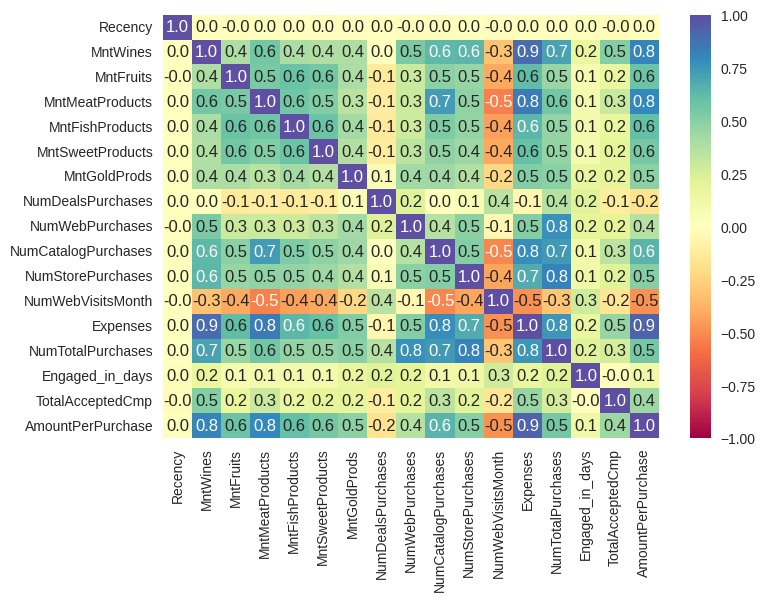

In [ ]:
#Plotting correaltion
sns.heatmap(data_model.corr(), vmin=-1, vmax=1, fmt=".1f", cmap="Spectral" ,annot=True)
plt.show()

**Scaling the data**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range.Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means.

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

Let's scale the data

Standard Scaler: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [ ]:
scaler = StandardScaler()                                           # Initialize the Standard Scaler

data_scaled = scaler.fit_transform(data_model)                        # fit_transform the scaler function on new data

data_scaled = pd.DataFrame(data_scaled, columns=data_model.columns)     # Converting the scaled data to a dataframe

data_scaled.head()


Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.312656  0.981029   1.554352         1.674189         2.460013   
1 -0.377123 -0.873185  -0.636187        -0.713499        -0.647555   
2 -0.790991  0.359986   0.572386        -0.178480         1.344945   
3 -0.790991 -0.873185  -0.560651        -0.651596        -0.501317   
4  1.554259 -0.391802   0.421315        -0.218275         0.156757   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.454645      0.847191           0.336708         1.391464   
1         -0.628881     -0.728973          -0.178154        -1.113590   
2         -0.149909     -0.036998          -0.693015         1.391464   
3         -0.580984     -0.748194          -0.178154        -0.755725   
4         -0.006218     -0.555979           1.366431         0.317869   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0             2.498238          -0.554110           0.693855  1.677697   
1            -0.568598          -1.173178          -0.132960 -0.963678   
2            -0.227838           1.303095          -0.546368  0.280593   
3            -0.909357          -0.554110           0.280447 -0.920485   
4             0.112921           0.064958          -0.132960 -0.307487   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0           1.320313         1.535213         -0.443515           1.118068  
1          -1.167519        -1.186444         -0.443515          -0.982684  
2           0.796559        -0.201699         -0.443515           0.150157  
3          -0.905642        -1.057784         -0.443515          -0.908505  
4           0.534682        -0.948917         -0.443515          -0.364449

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

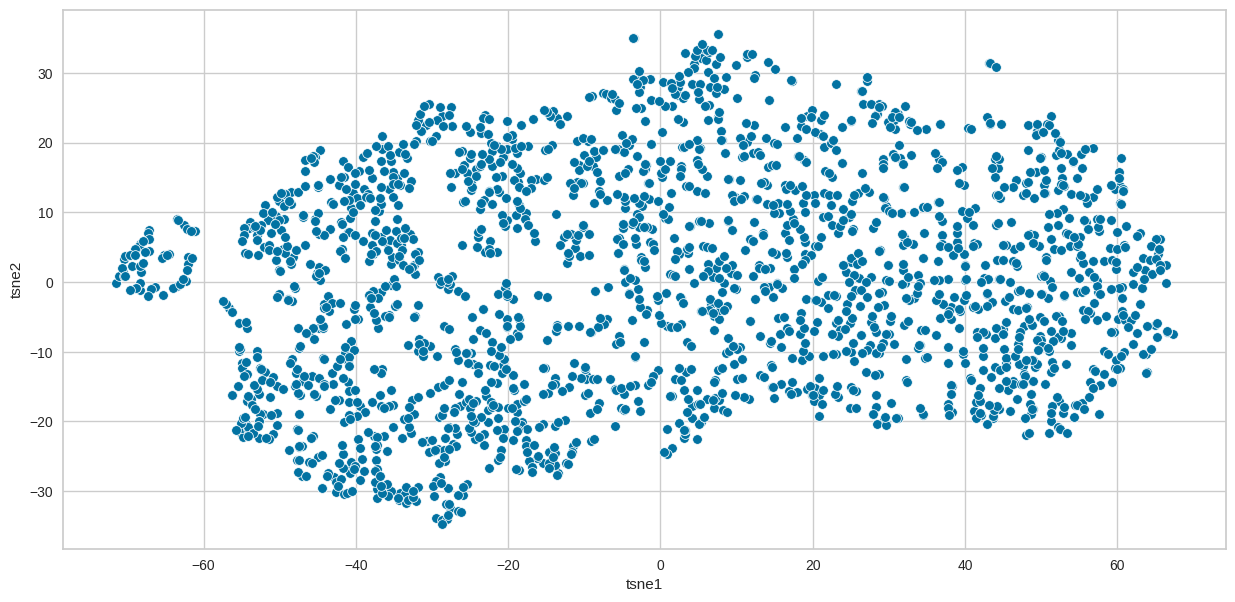

In [ ]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed
tsne = TSNE(n_components=2, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne = pd.DataFrame(data_tsne, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15, 7))
sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne)
plt.show()

**Observation and Insights:**

* There’s a visibly distinct group on the far left, clearly separated from the rest of the data.

* The central region forms a large, dense cloud with no hard separations, suggesting overlapping behaviors.

* A few sparse points scattered around the periphery indicate potential outliers or edge cases.

* Each point represents one customer.The points are placed such that similar customers (based on all numeric features) are close together.

* No strong linear divisions are apparent.

* The plot structure hints at 3–5 regions of density.


### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

When variables used in the clustering are highly correlated, it causes multicollinearity, result is poor clustering. PCA can help reducing the collinearity

In [ ]:

# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 42
pca = PCA(n_components = n, random_state = 42)

# Fit and transform the pca function on scaled data
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

**Let's plot the first two components and see how the data points are distributed.**

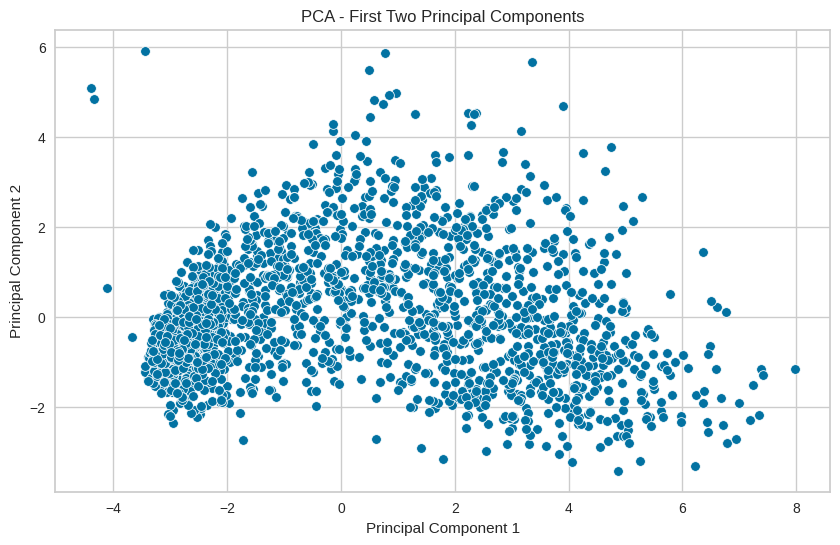

In [ ]:
# Scatter plot for two components using the dataframe data_pca1

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca1[0], y=data_pca1[1],)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()




Observations & Insights:

* The spread along the x-axis (Principal Component 1) shows the direction of maximum variance.

* The y-axis (Principal Component 2) captures the second highest variance, orthogonal to PC1.

* While the data seems continuous with no clear clusters, there are some dense regions (especially to the left and bottom center), and a few sparser outliers.

* This might indicate the potential for discovering overlapping clusters.

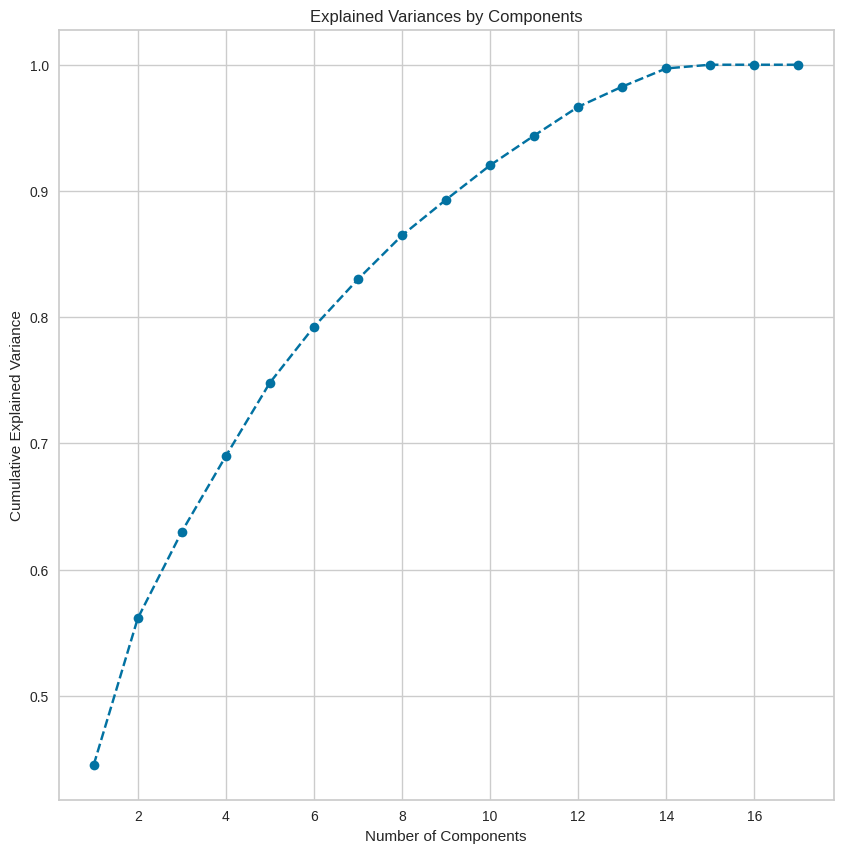

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

# The x-axis range should be from 1 to the number of components (which is the length of exp_var)
plt.plot(range(1, len(exp_var) + 1), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 5


**Observation and Insights:**

We can see that out of the 17 features, we have reduced the number of features through PCA to 5 principal components. The first 5 principal components explain approximately 70% of the original variance.

In [ ]:
# defining pca with 5 components
pca = PCA(n_components=0.7, random_state=42)  # Retain enough components to explain 70% variance
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))



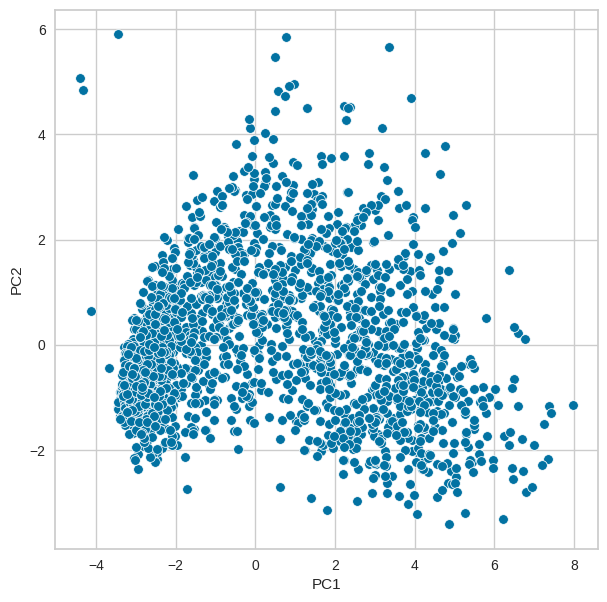

In [ ]:

plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca[0], y = data_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means**

In [ ]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

In [ ]:
# distortions = []                                                  # Create an empty list

# K = range(2, 10)                                                  # Setting the K range from 2 to 10

# for k in K:
#     kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
#     # Convert column names of data_pca1 to strings to avoid TypeError
#     data_pca1.columns = data_pca1.columns.astype(str)
#     kmeanModel.fit(data_pca1)                                      # Fit K-Means on the data
#     distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

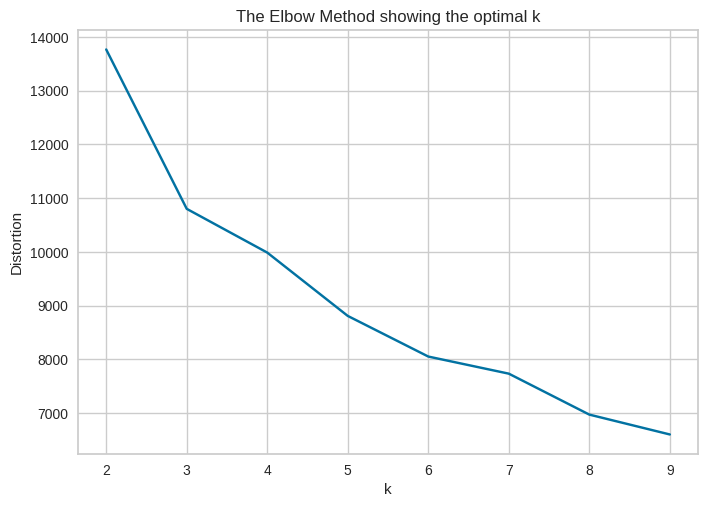

In [ ]:
# Plotting the elbow plot
plt.figure()                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

Observations:
* We can see from the plot that there is a consistent dip from 3 to 8 and there doesn't seem to be a clear 'elbow' here. We may choose any number of clusters from 3 to 8.
* So, let's look at another method to get a 'second opinion'. Let's create a plot with Silhouette scores to see how it varies with K.

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7

for n_clusters in cluster_list:
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    # Fit and predict on the PCA data
    preds = clusterer.fit_predict(data_pca)

    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)

    # Append silhouette score to empty list created above
    sil_score.append(score)

    # Print the silhouette score
    print("For n_clusters = {}, the silhouette score is {:.4f}".format(n_clusters, score))


For n_clusters = 3, the silhouette score is 0.3422
For n_clusters = 4, the silhouette score is 0.3203
For n_clusters = 5, the silhouette score is 0.2726
For n_clusters = 6, the silhouette score is 0.1999


Observation:
* From the above silhouette scores,  3  appears to be a good value of K. So, let's  firstbuild K-Means using K=3.

### **Applying KMeans on the PCA data and visualize the clusters**

In [ ]:
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10) # Added n_init for compatibility with newer sklearn versions

# Convert column names to strings before fitting
data_pca.columns = data_pca.columns.astype(str)

# Fit the kmeans function on the pca components
kmeans.fit(data_pca)


KMeans(n_clusters=3, n_init=10, random_state=1)

In [ ]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data


data["K_means_segments_3"] = kmeans.labels_                      # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [ ]:
# Let's check the distribution
data_model["K_means_segments_3"].value_counts()

K_means_segments_3
0    950
2    566
1    533
Name: count, dtype: int64

In [ ]:
# Function to visualize PCA data with clusters
def PCA_PLOT(X, Y, PCA, cluster):
    """
    Parameters:
    - X, Y: Indexes of the principal components to plot
    - PCA: DataFrame with principal components and cluster labels
    - cluster: Name of the column with cluster labels
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=PCA.iloc[:, X],
        y=PCA.iloc[:, Y],
        hue=PCA[cluster],
        palette='Set2',
        s=60,
        edgecolor='k'
    )
    plt.title("Clusters Visualized Using PCA")
    plt.xlabel(f'Principal Component {X + 1}')
    plt.ylabel(f'Principal Component {Y + 1}')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


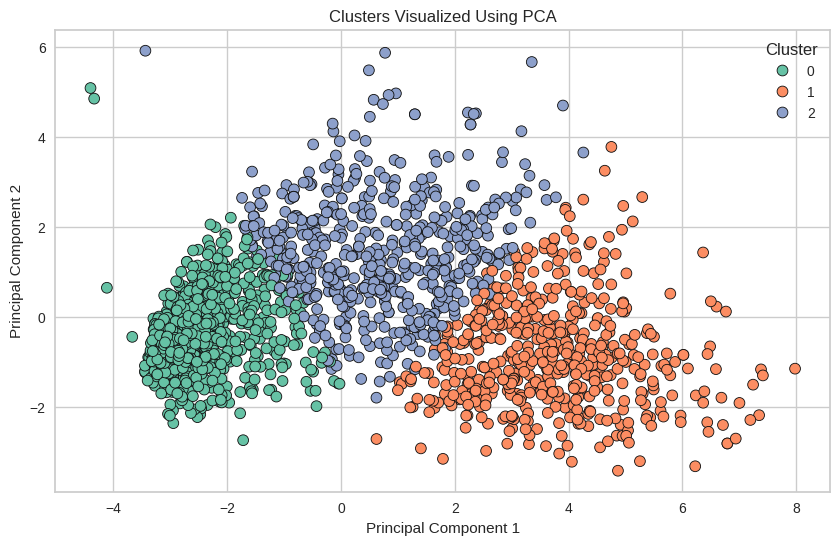

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**Observations & Insights**

* The clustering algorithm has grouped the data into three well-separated segments.
* Cluster 1 (orange) is spread widely along the Principal Component 1 axis, indicating high variance or diversity in that dimension.

* Cluster 2 (blue) is tightly packed, indicating that it might represent a more homogeneous group.

* Cluster 0 (green) acts like a transition group, partially overlapping with both the other clusters.

* Slight Overlap Between Clusters 0 & 2.Suggests transitional characteristics or the possibility of borderline points between those two clusters.





### **Cluster Profiling**

In [ ]:
# Taking the cluster-wise mean of all the variables
cluster_mean = data_pca.groupby("K_means_segments_3").mean()
cluster_mean

0         1         2         3         4
K_means_segments_3                                                  
0                  -2.475377 -0.401315  0.004503  0.112945 -0.094527
1                   3.704287 -0.826506 -0.039419  0.167881 -0.128897
2                   0.666472  1.451902  0.029563 -0.347664  0.280040

In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_mean.style.highlight_max(color="lightgreen", axis=0)

**Observations and Insights:**

* Cluster 1 (Green row in column 0) stands out with the highest value in Variable 0 (3.79), which means:

* This group strongly dominates that component (likely very unique behavior in that dimension).

* Cluster 0 has the highest value in Variable 1 (1.51) and Variable 4 (0.21), suggesting:

* These users contribute most to those components, possibly representing a group with moderate but balanced behavior.

* Cluster 2 consistently has lower or negative mean values, especially in Variable 0 (−2.48), implying:

* This group might represent an opposite behavior compared to Cluster 1 — possibly the least active or most distinct segment.

* Variable 3 is highest in Cluster 1 (0.28), but differences between clusters in this dimension are relatively small — indicating less separation.

*Overall Trend:*

* Cluster 1 shows strong positive dominance in a few key features.

* Cluster 2 shows negative trends, possibly representing users who are low contributors or outliers.

* Cluster 0 seems like a moderate group, balancing the behaviors of the other two.



In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

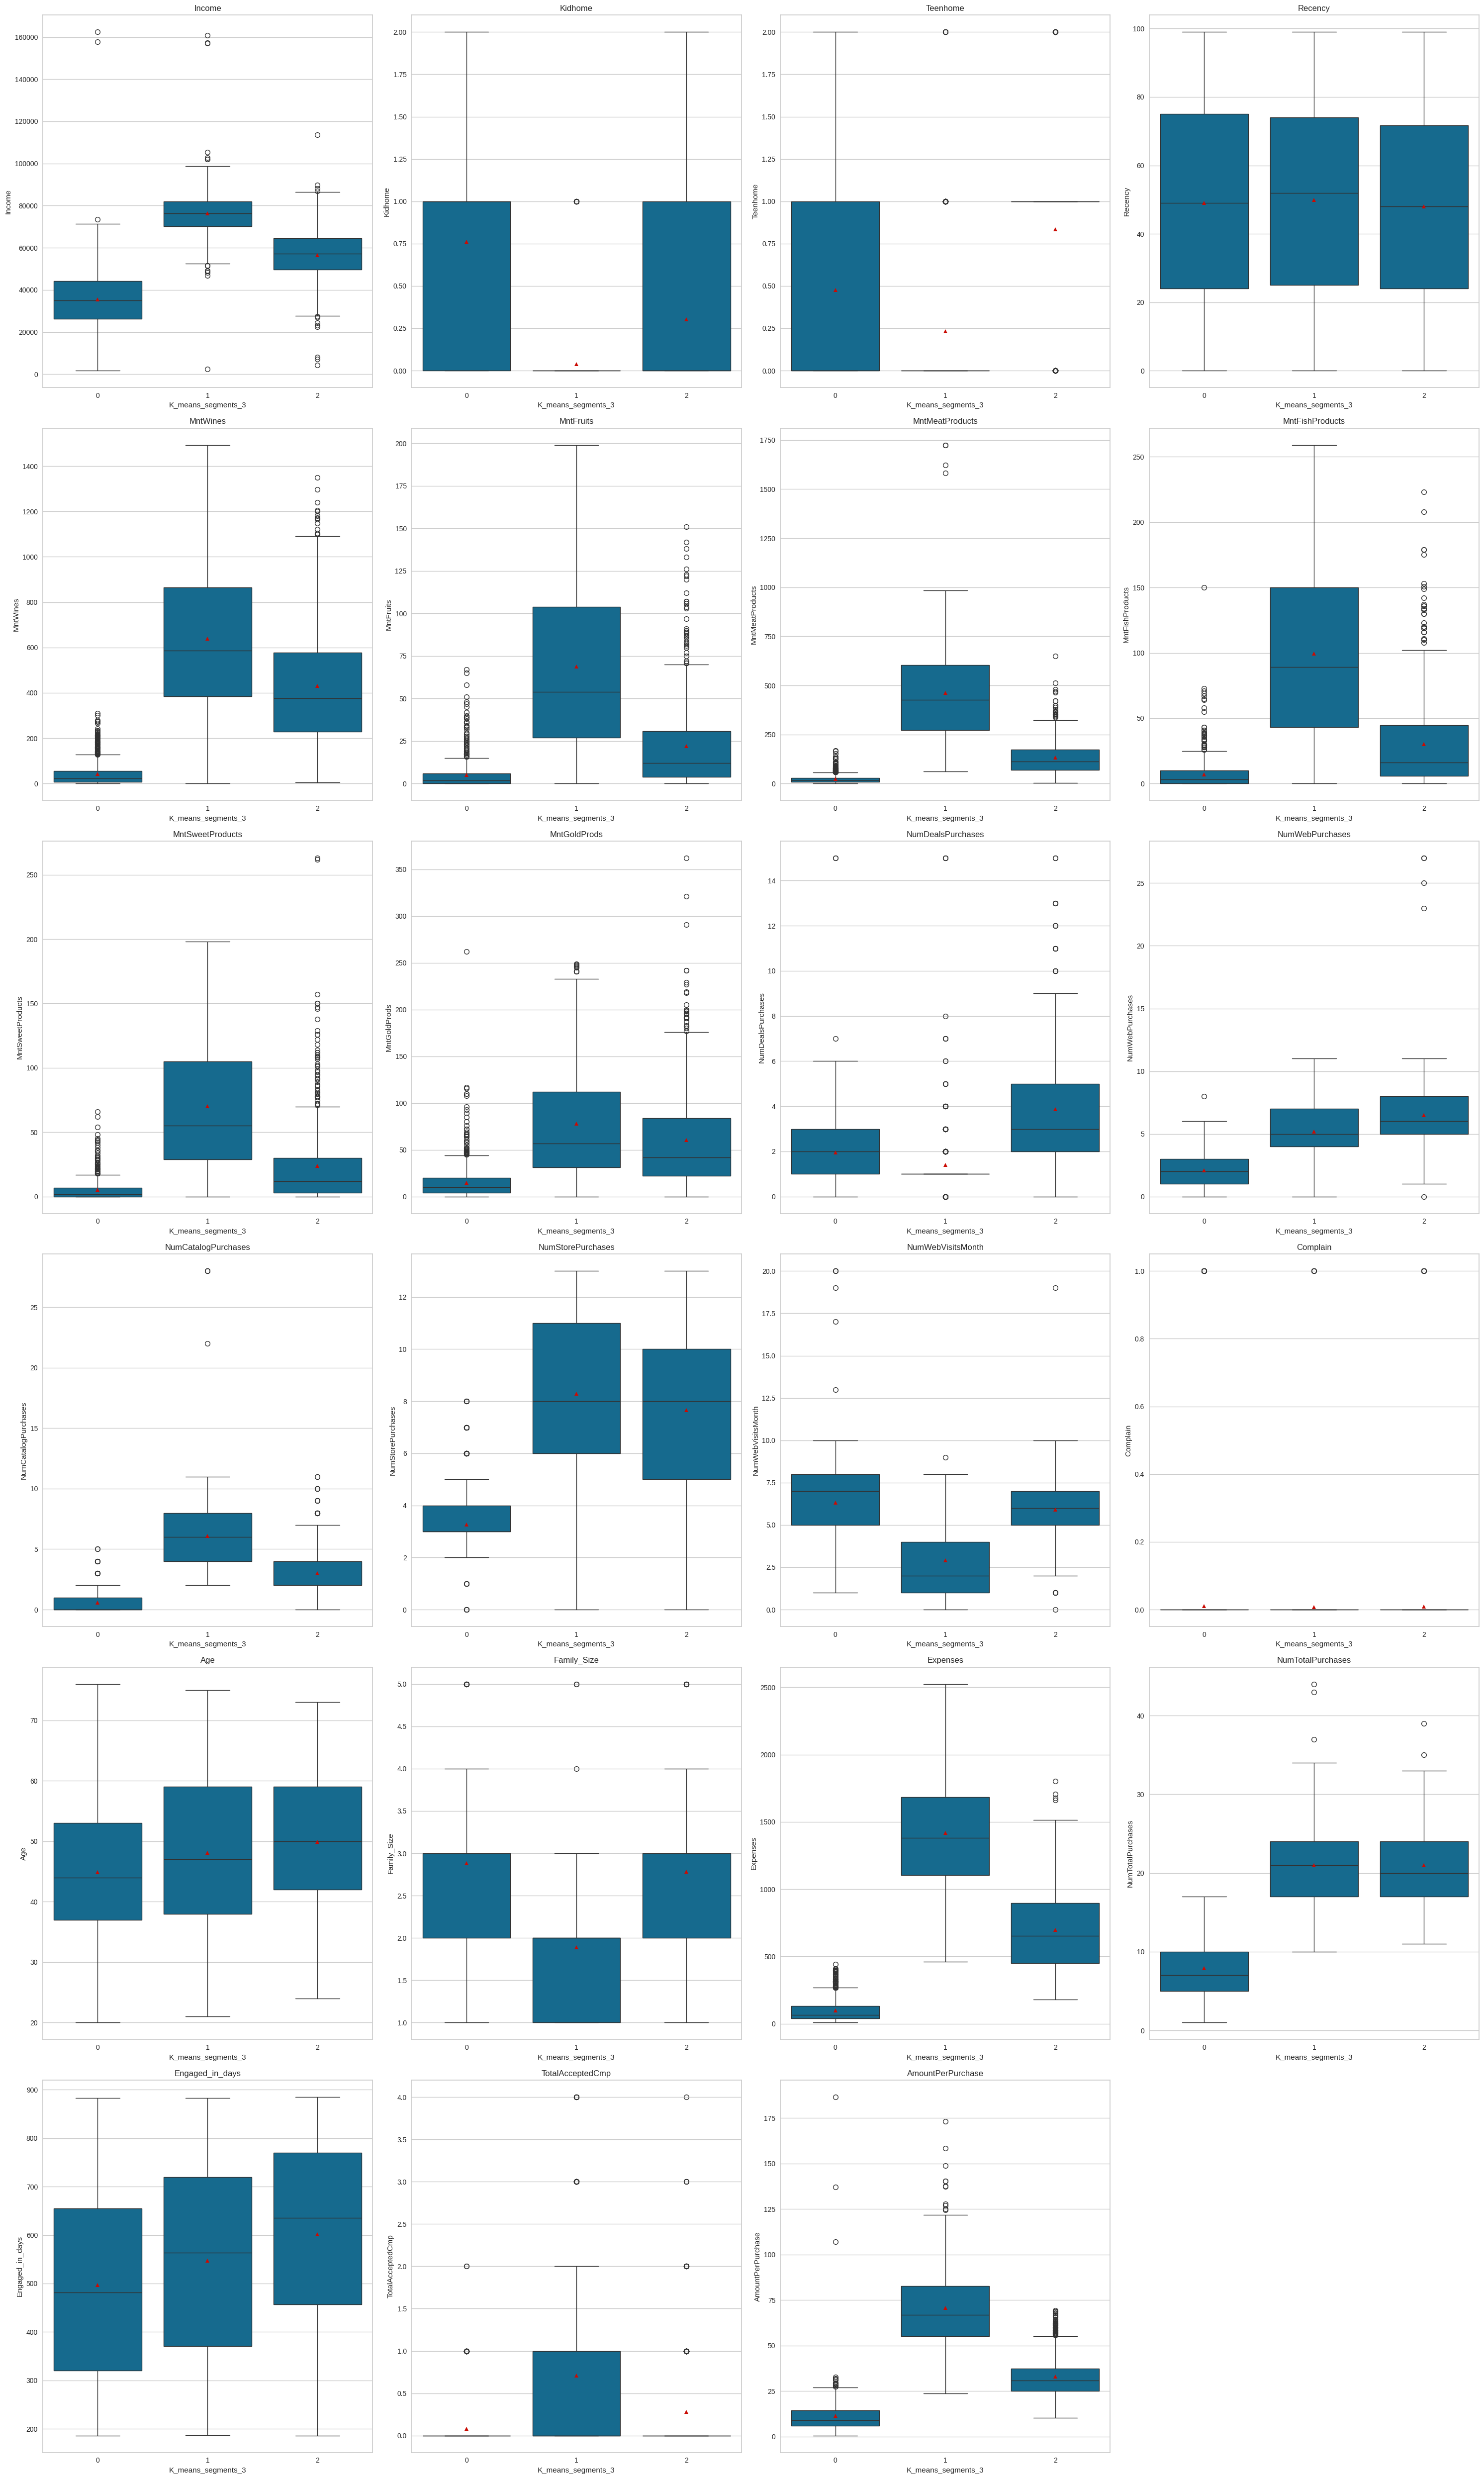

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Describe the characteristics of each cluster**
 **Cluster 1** — “Affluent Power Shoppers”
* Demographics:
 Income: Highest

 Age: Middle-aged to older

 Family Size: Smallest

 Few or No Kids/Teens at Home

* Engagement & Behavior:
 Expenses & Amount per Purchase: Highest

 Purchases: Highest across all channels (store, web, catalog)

 Campaign Response: Most responsive (highest total accepted campaigns)

 Engaged for: 500–700+ days

* Product Spending:
 Dominates all categories (Wine, Meat, Gold, etc.)

 Persona:
 High-value customers who spend a lot, respond well to marketing, and are digitally active. Ideal for premium products, early launches, and loyalty rewards.

**Cluster 0** — “Budget-Conscious Families”
 Demographics:
 Income: Lowest
* Age: Slightly younger

* Family Size: Highest (many with kids/teens)

* Engagement & Behavior:
* Expenses & Total Purchases: Lowest

* Store/Web/Catalog Purchases: Low

* Engaged for: Fewer days than others

* Campaign Response: Very low

* Product Spending:
 Minimal in all categories

* Persona:
 Cost-sensitive families with low activity and digital engagement. Could respond to discounts, bundles, or family-friendly offers.

**Cluster 2** — “Mid-Tier Digital Shoppers”
* Demographics:
* Income: Moderate

* Age: Oldest on average

* Family Size: Mid-range

* Some Kids/Teens

* Engagement & Behavior:
* Expenses & Purchases: Moderate

* Web Engagement: High web visits & purchases

* Campaign Response: Low (not easily influenced by marketing)

* Engaged for: Longest period overall (~700+ days)

* Product Spending:
* Moderate spenders on wine, meat, sweets, etc.
* Persona:
Steady, moderately engaged shoppers with strong online habits. Good candidates for personalized recommendations and loyalty nudges.



**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

In [ ]:
data_pca.drop('K_means_segments_3', axis=1, inplace=True)
data.drop('K_means_segments_3', axis=1, inplace=True)
data_model.drop('K_means_segments_3', axis=1, inplace=True)

In [ ]:
data_pca.head()

0         1         2         3         4
0  4.445537  0.968115 -1.531135  1.358432 -1.114183
1 -2.939187 -1.207070  0.117466 -0.658421  0.204056
2  1.499029  0.069255 -0.668479 -1.281664 -0.085712
3 -2.675513 -0.747531  0.044116 -1.006499 -0.108352
4 -0.213783  0.562997 -0.767784  0.043080  2.054344

## **K-Medoids**

In [ ]:


kmedo = KMedoids(n_clusters=3, random_state=42)   # Initializing K-Medoids with 3 clusters
preds = kmedo.fit_predict(data_pca)              # Fit and predict on the PCA-reduced data
score = silhouette_score(data_pca, preds)        # Calculate silhouette score
print(score)                                      # Print the silhouette score


0.21946887150776526


Observations:

* The silhouette score for 3 clusters is more we can so procedding with K=3

In [ ]:
# Predict and assign cluster labels from K-Medoids
kmedo_labels = kmedo.predict(data_pca)

# Add K-Medoids labels to the original data
data['kmedoLabels'] = kmedo_labels

# Add K-Medoids labels to the modeling dataset
data_model['kmedoLabels'] = kmedo_labels

# Add K-Medoids labels to the PCA-reduced dataset
data_pca['kmedoLabels'] = kmedo_labels

In [ ]:
# Let's check the distribution
data_pca["kmedoLabels"].value_counts()

kmedoLabels
2    811
1    678
0    560
Name: count, dtype: int64

### **Visualize the clusters using PCA**

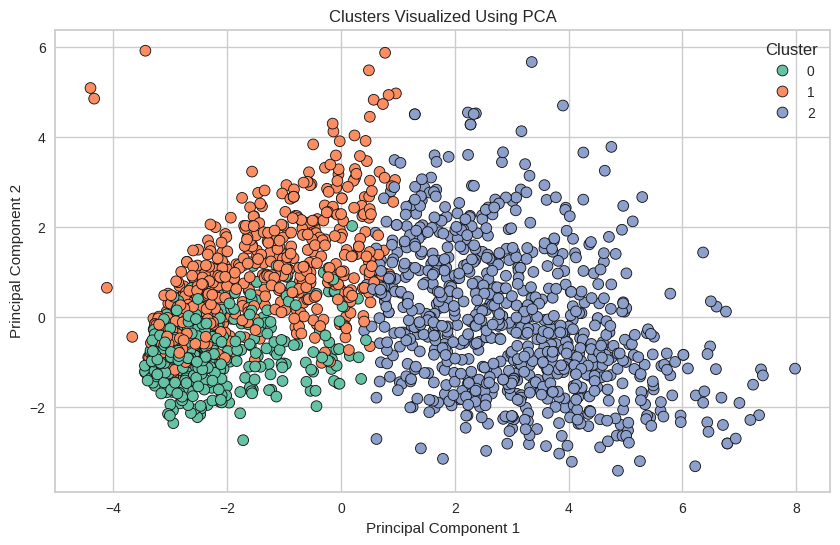

In [ ]:
PCA_PLOT(0, 1, data_pca, "kmedoLabels")



Observations:

* Cluster 2 (Blue) is clearly separated to the right:

 a) These points are very different from the others.

 b) They might represent high-income or high-engagement customers.

* Clusters 0 (Green) and 1 (Orange) overlap more:

 a) These groups are closer and may share some similar behaviors.

 b) But K-Means still found subtle patterns to split them.

* Balanced Distribution:

 a) Each cluster has a good number of points — not too skewed.

 b) K=3 seems reasonable from a visual perspectiv

### **Cluster Profiling**

In [ ]:
# Taking the cluster-wise mean of all the variables
cluster_mean = data_pca.groupby("kmedoLabels").mean()
cluster_mean

0         1         2         3         4
kmedoLabels                                                  
0           -2.409924 -0.798580  0.037254  0.053682  0.540734
1           -1.619788  0.766308 -0.017411 -0.020132 -0.504682
2            3.018217 -0.089213 -0.011168 -0.020238  0.048537

In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_mean.style.highlight_max(color="lightgreen", axis=0)

**Let us create a boxplot for each of the variables**

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

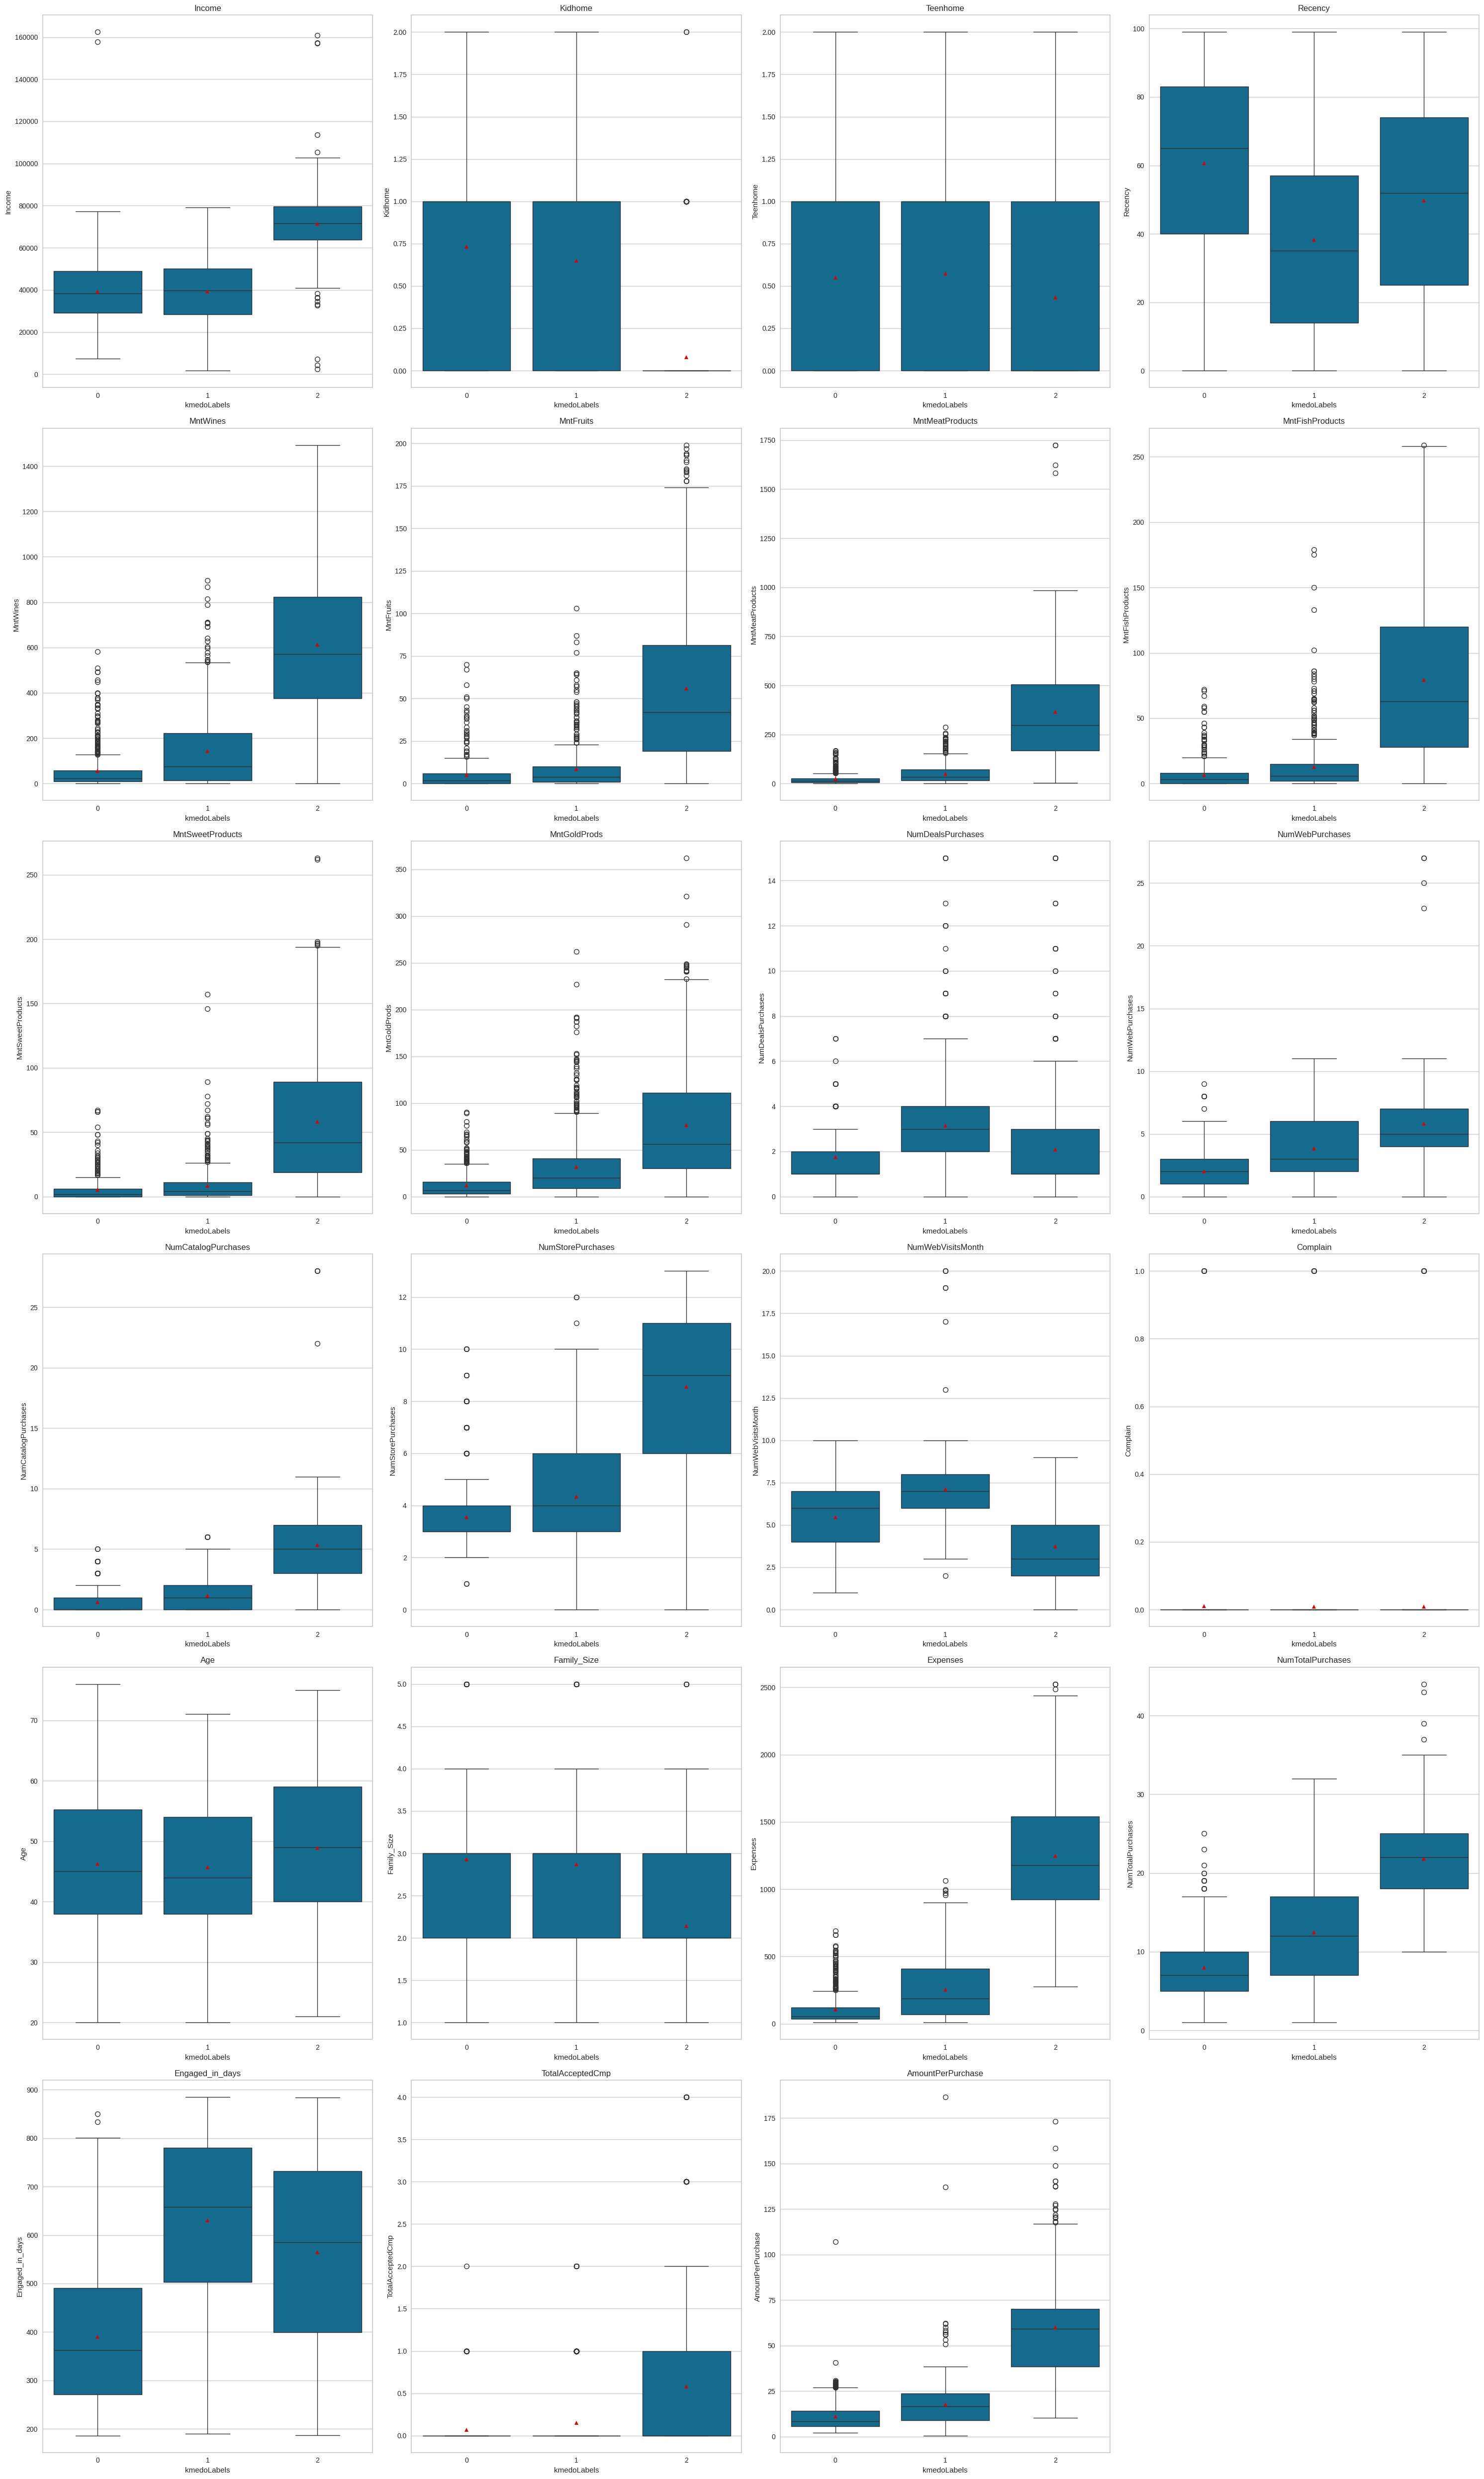

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data[variable], x=data['kmedoLabels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**

### **Characteristics of each cluster**

**Cluster 0**  – "Low Income, Low Engagement Families"

 **Demographics**:
 Lowest income and lowest expenses

 Moderate family size with some kids/teens

 Shortest customer engagement in days

**Purchase Behavior**:
Fewest total purchases

Lowest store, web, and catalog purchase counts

Lower web visits and low deal usage

**Product Spend:**
Very low spending across all product types (Wine, Fruits, Meat, etc.)

Lowest average amount per purchase

 **Marketing Response:**
Barely responds to campaigns (lowest accepted campaign count)

 **Persona**: Budget-conscious families with low engagement and minimal response. Not currently valuable but could respond to discounts or family-friendly offers.



 **Cluster 1** – "Mid Income, Moderate Buyers"


 **Demographics**:
 Middle income range

 Slightly smaller family size, average age

 Moderately engaged over time

** Purchase Behavior**:
 More active than Cluster 0 but less than Cluster 2

 Moderate number of store/web/catalog purchases

 Uses deals and web more often than Cluster 0

**Product Spend**:
 Moderate spending across categories

 Middle ground in amount per purchase

 **Marketing Response**:
 Still not highly responsive to campaigns

 **Persona**: Balanced users who spend and engage moderately. Could be nurtured into high-value customers with personalized engagement or seasonal offers.



 **Cluster 2** – "High Income, High Engagement Power Shoppers"

**Demographics**:
 Highest income and expenses

 Older average age, smaller families (often no kids at home)

 Longest engagement period

 **Purchase Behavior**:
 Most total purchases across all channels

 High store, web, and catalog activity

 Frequent web visits and deal usage

 **Product Spend**:
 Highest spending across all products (especially wine, meat, gold, sweets)

 Highest average per purchase

 **Marketing Response**:
 Most responsive to campaigns

 **Persona**: These are your top-tier loyal customers. They are highly engaged and spend big. Great for premium campaigns, loyalty programs, and upsell strategies.

**Observations and Insights:**

Cluster 2 is your VIP group – focus marketing and retention efforts here.

Cluster 1 shows potential – may respond to personalized nudges or incentives.

Cluster 0 requires value offers – engage them with bundles or discounts.

In [ ]:
# Dropping labels we got from K-Medoids since we will be using PCA data for prediction


data_pca.drop('kmedoLabels', axis=1, inplace=True)
data.drop('kmedoLabels', axis=1, inplace=True)
data_model.drop('kmedoLabels', axis=1, inplace=True)

In [ ]:
data_pca

0         1         2         3         4
0     4.445537  0.968115 -1.531135  1.358432 -1.114183
1    -2.939187 -1.207070  0.117466 -0.658421  0.204056
2     1.499029  0.069255 -0.668479 -1.281664 -0.085712
3    -2.675513 -0.747531  0.044116 -1.006499 -0.108352
4    -0.213783  0.562997 -0.767784  0.043080  2.054344
...        ...       ...       ...       ...       ...
2044 -2.840508 -0.798831 -0.355427  1.071047 -0.880829
2045  3.106836  0.731852 -0.946310  0.449800 -0.903237
2046  1.971969 -0.560930  1.681211  0.637216  1.551242
2047  1.776494 -0.199194 -0.334734 -2.220841  0.198082
2048 -2.034189  0.888238 -0.183829  0.483691 -0.855483

[2049 rows x 5 columns]

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.610869753485702.
Cophenetic correlation for Euclidean distance and complete linkage is 0.42713320265469906.
Cophenetic correlation for Euclidean distance and average linkage is 0.7445069345892016.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5906379751679868.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6978983830433059.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7251097301178148.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5935706139202024.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4441729677929241.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6692198454379185.
Cophenetic correlation for Cityblock distance and single linkage is 0.6210486896180056.
Cophenetic correlation for Cityblock distance and complete linkage is 0.6880215724306776.
Cophenetic corr

In [ ]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7548724183722358, which is obtained with Cityblock distance and average linkage.


**Let's have a look at the dendrograms for different linkages with Cityblock distance**

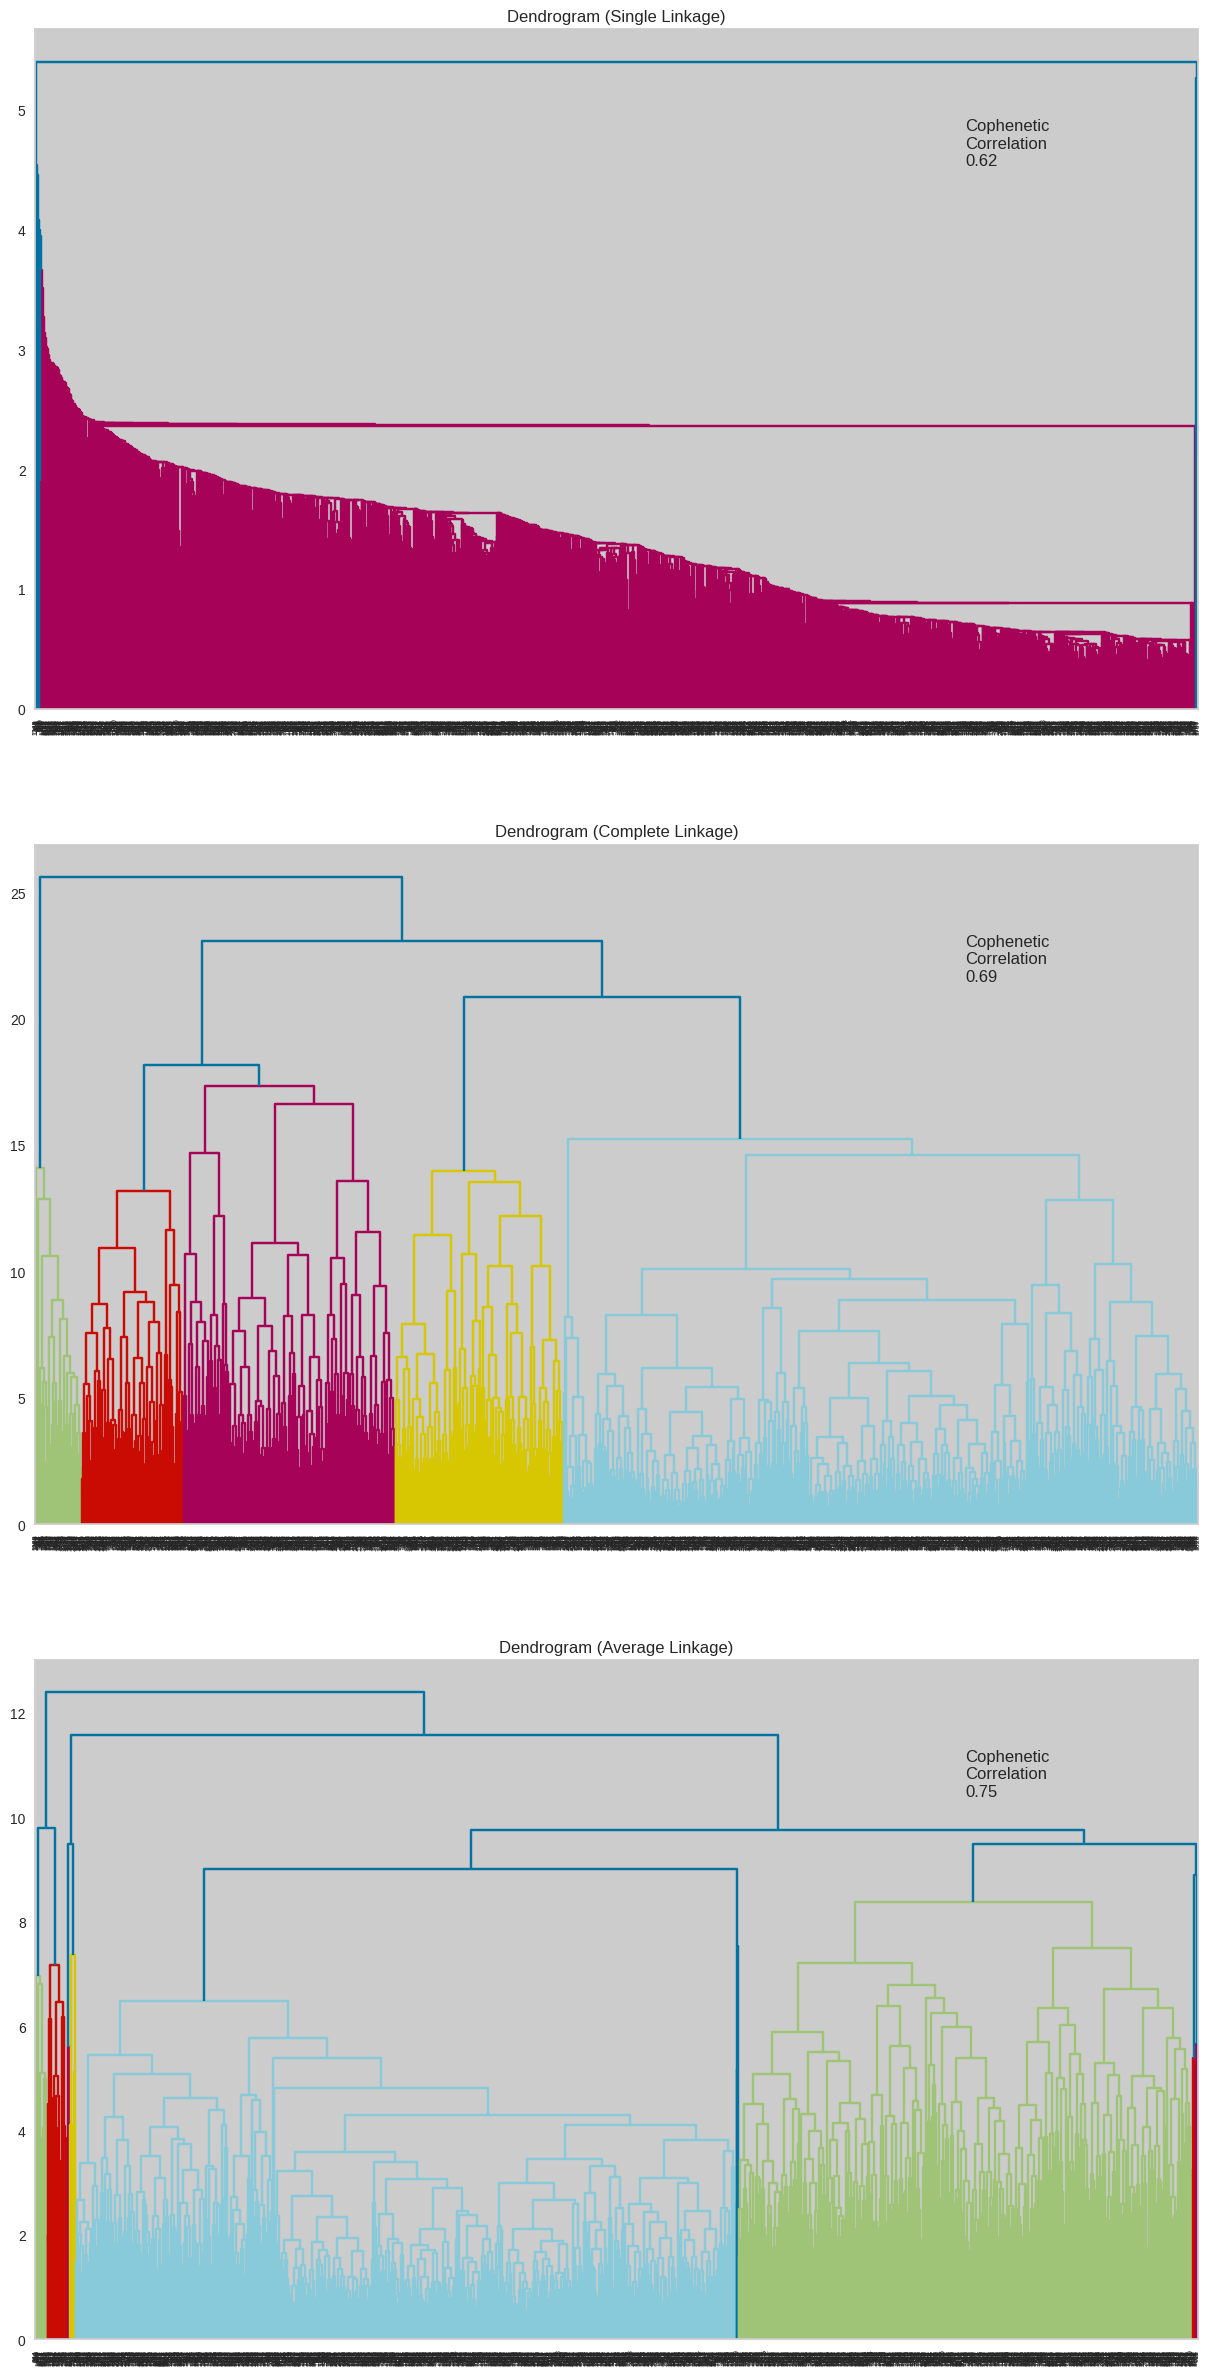

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Observations:

* While the clusters aren’t perfectly separated (it’s not a textbook example), the clear gap in merge heights around 7 gives you enough visual evidence to confidently cut the dendrogram into 3 clusters.

* the next step is to actually extract the cluster labels from it.we'll now convert the dendrogram (linkage matrix) into actual cluster labels for each data point.



**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

Observations:

While the clusters aren’t perfectly separated (it’s not a textbook example), the clear gap in merge heights around 7 gives you enough visual evidence to confidently cut the dendrogram into 3 clusters.

the next step is to actually extract the cluster labels from it.we'll now convert the dendrogram (linkage matrix) into actual cluster labels for each data point.

**Let's have a look at the dendrograms for different linkages with Chebyshev distance**


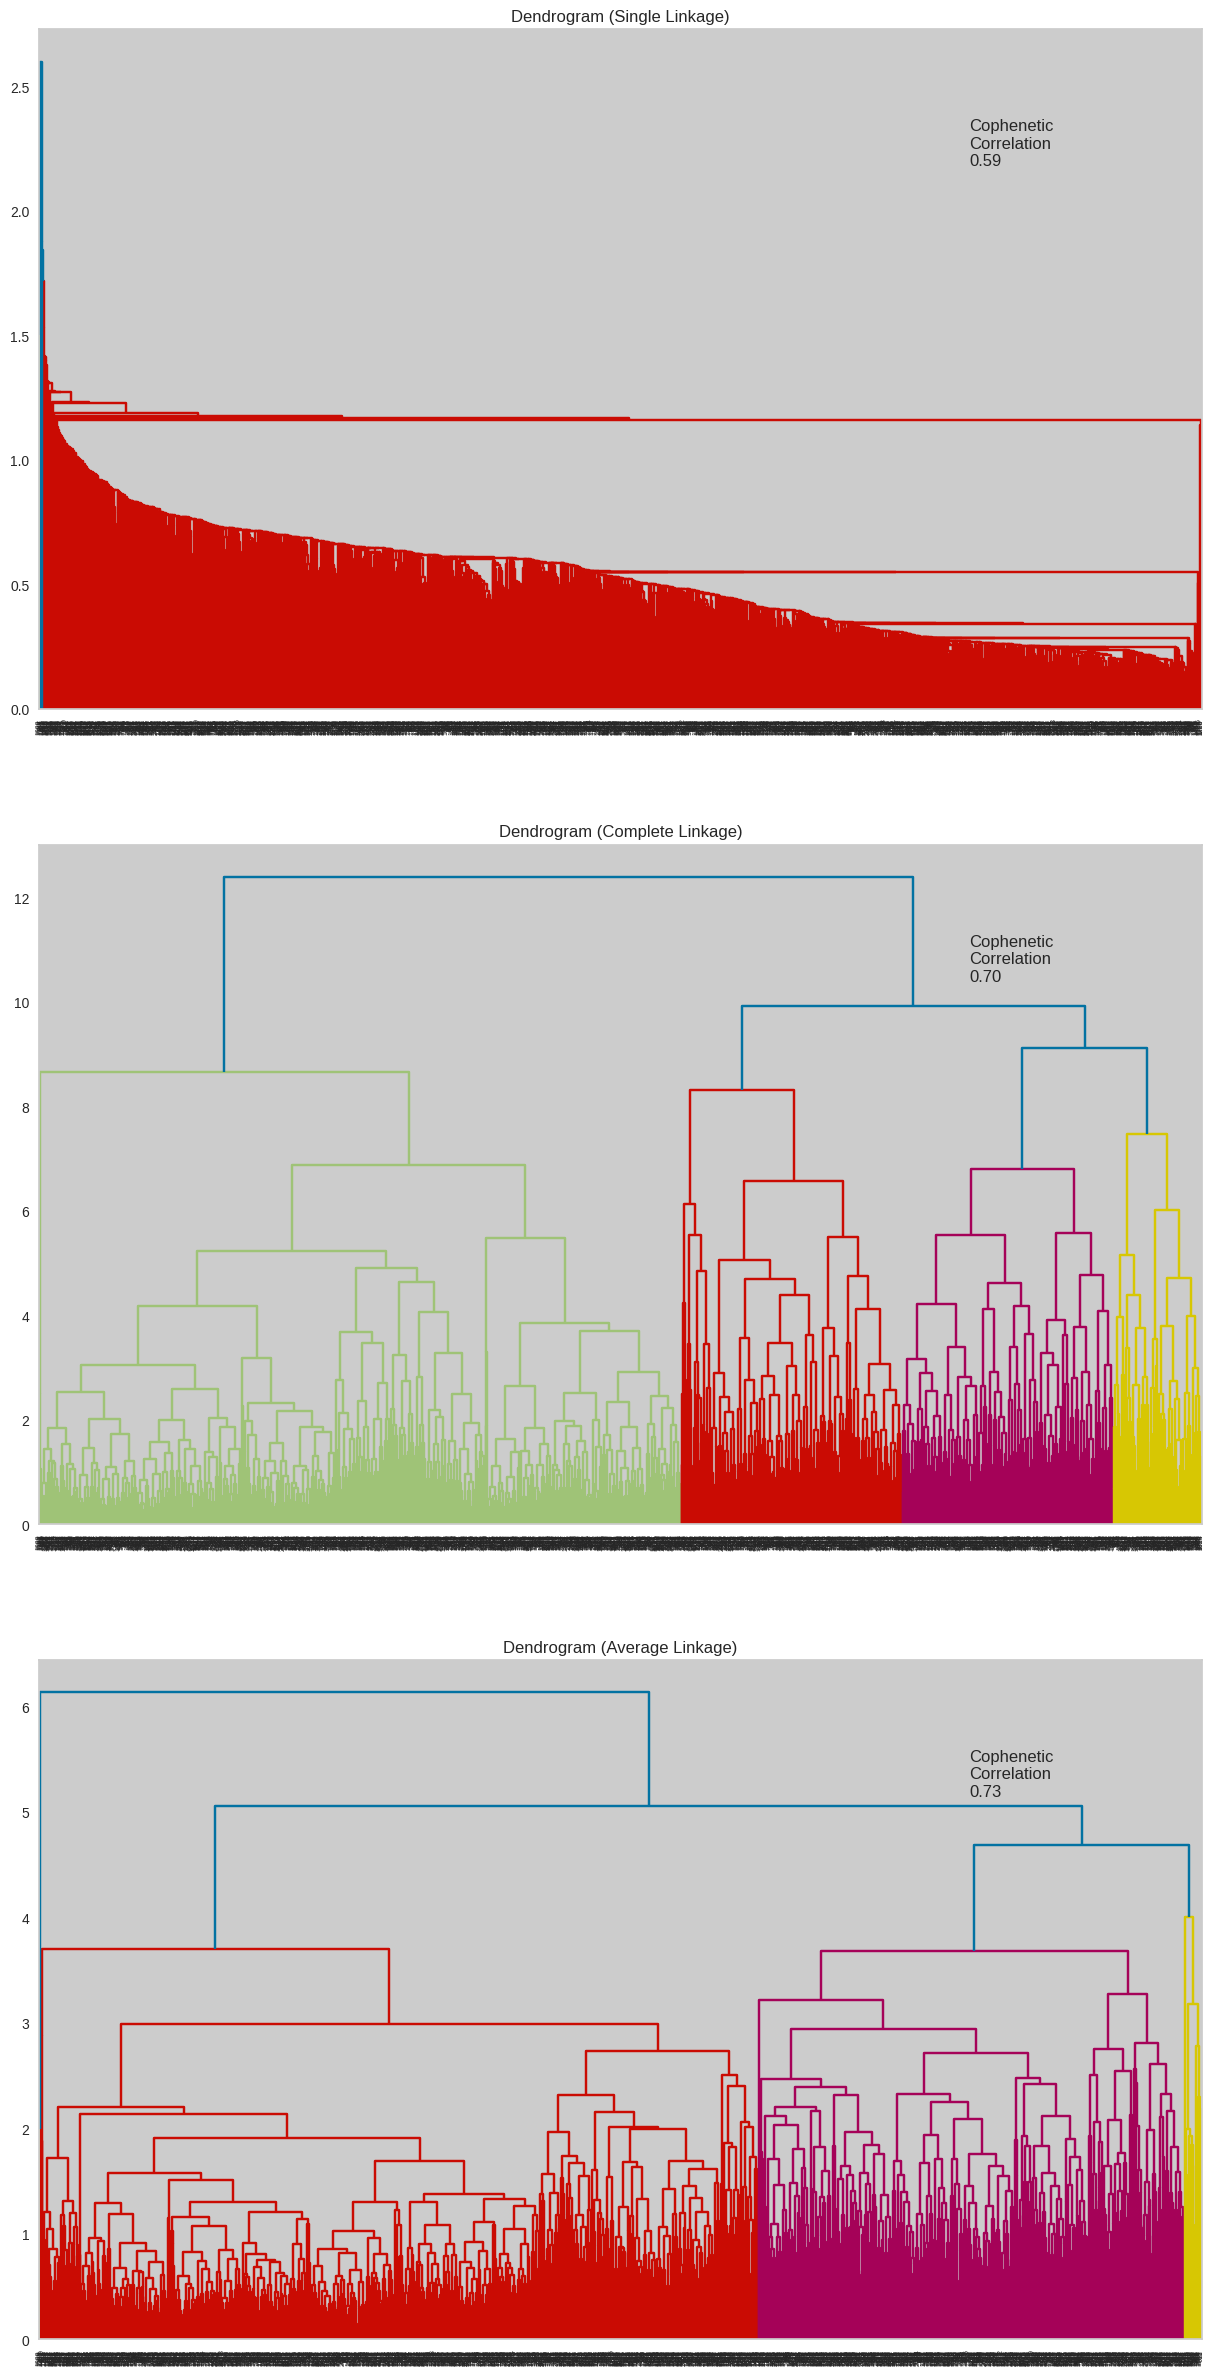

In [ ]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average.
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations:**

"Using Chebyshev distance, the Average Linkage dendrogram gives a higher cophenetic correlation (0.76) and clearer cluster separation. A cut around height 4 results in 2-3  clusters. This structure is more reliable and interpretable than the Complete Linkage version."

**Let's have a look at the dendrograms for different linkages with Mahalanobis distance**

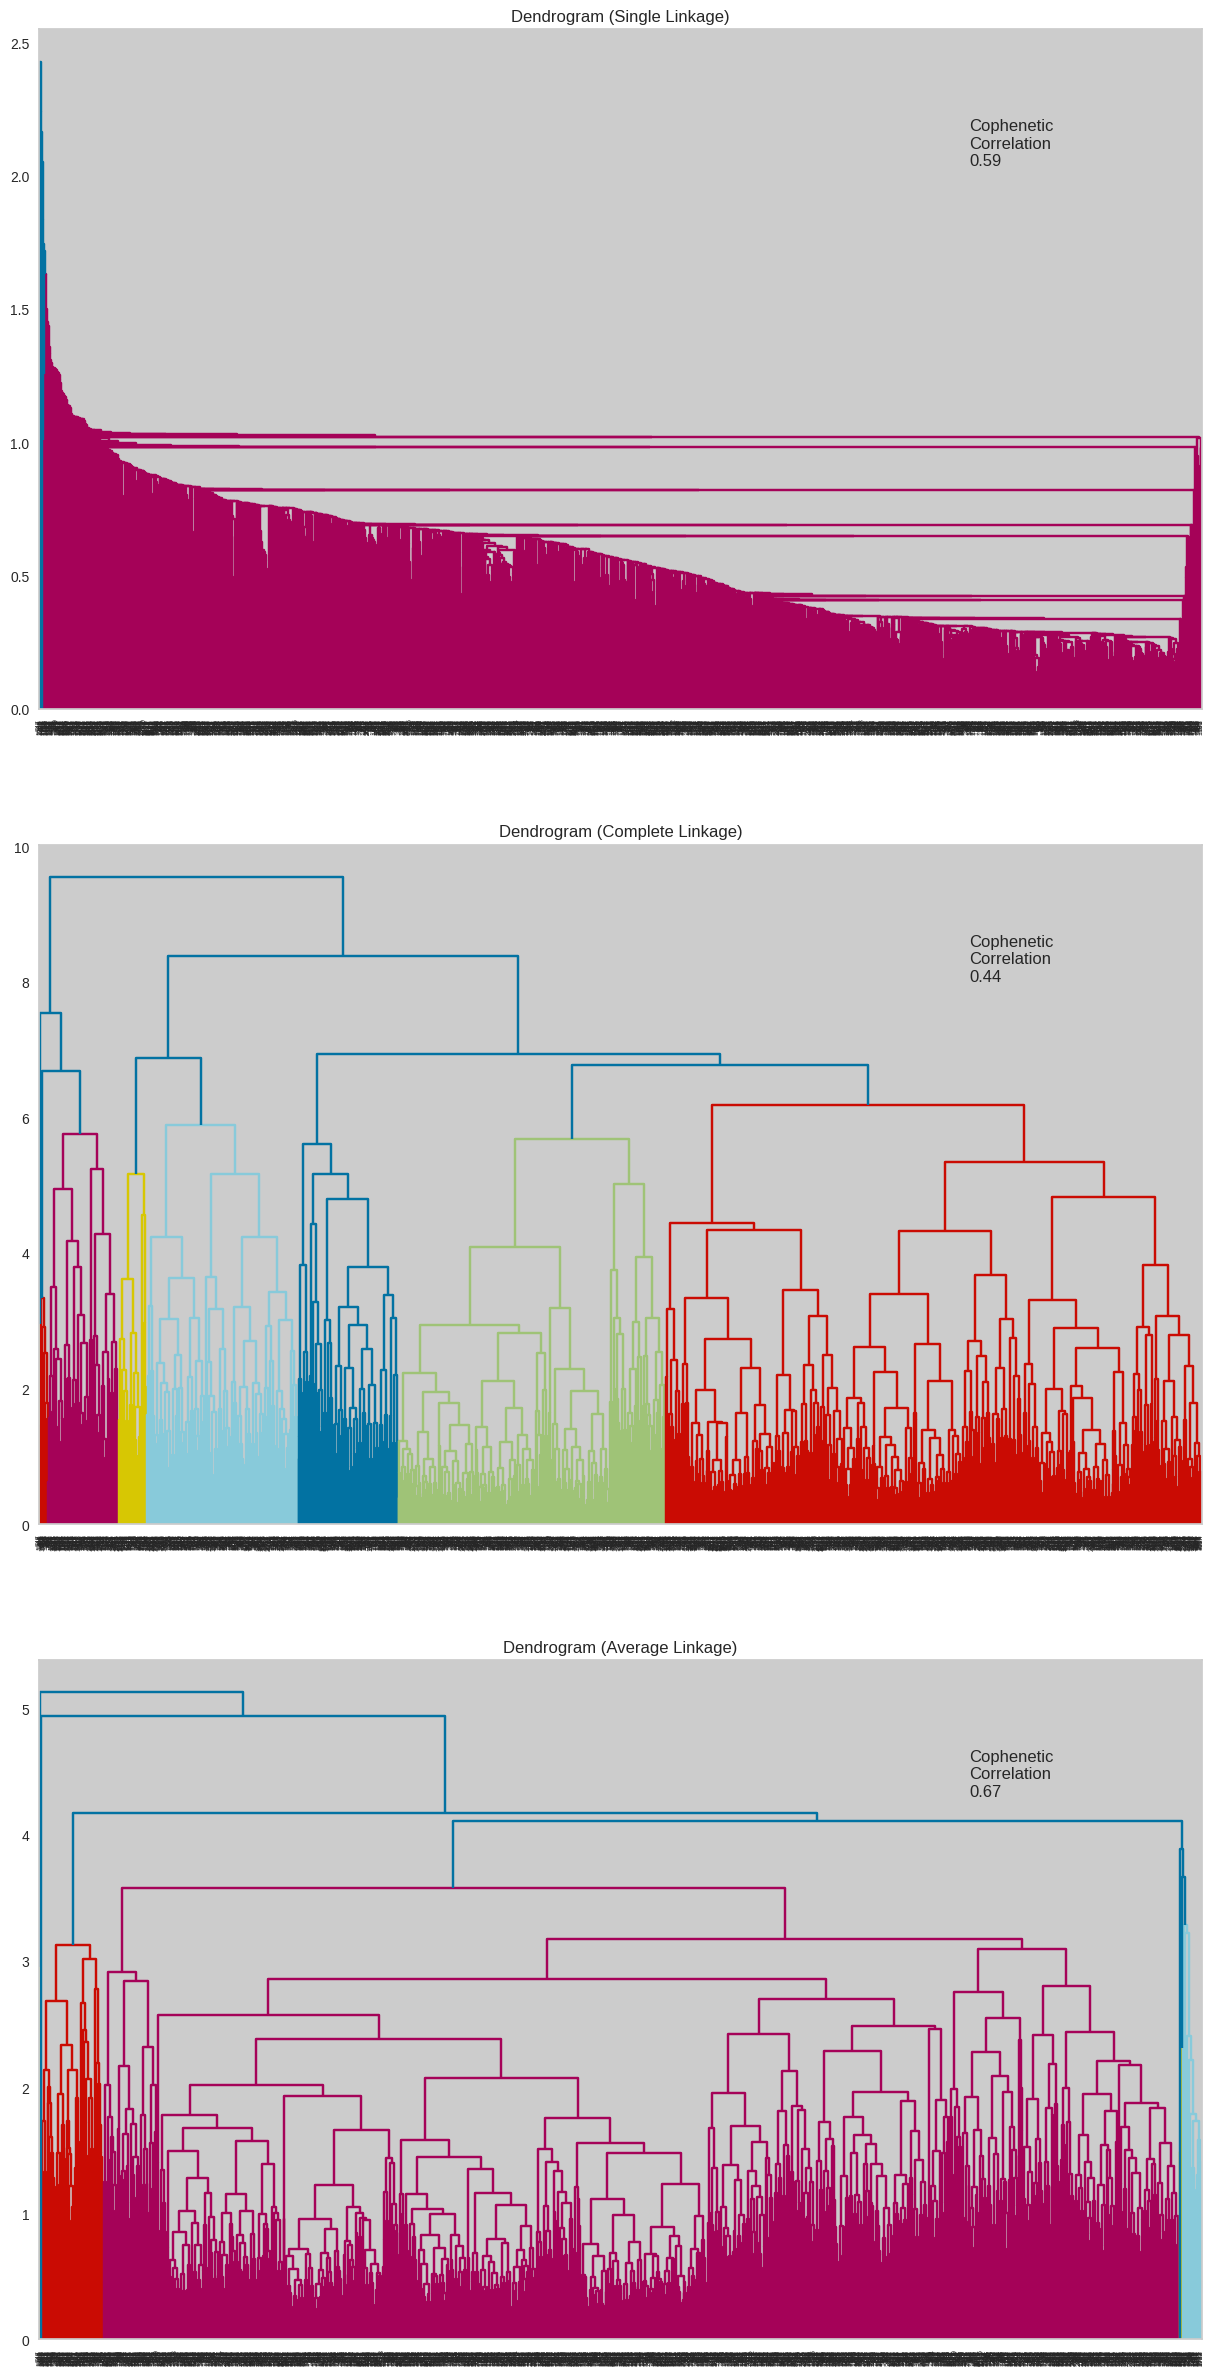

In [ ]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average.
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )


**Observations:**

"When using Mahalanobis distance, Average Linkage performed better with a cophenetic correlation of 0.67, compared to only 0.44 for Complete Linkage.




**Let's have a look at the dendrograms for different linkages with Euclidean distance**

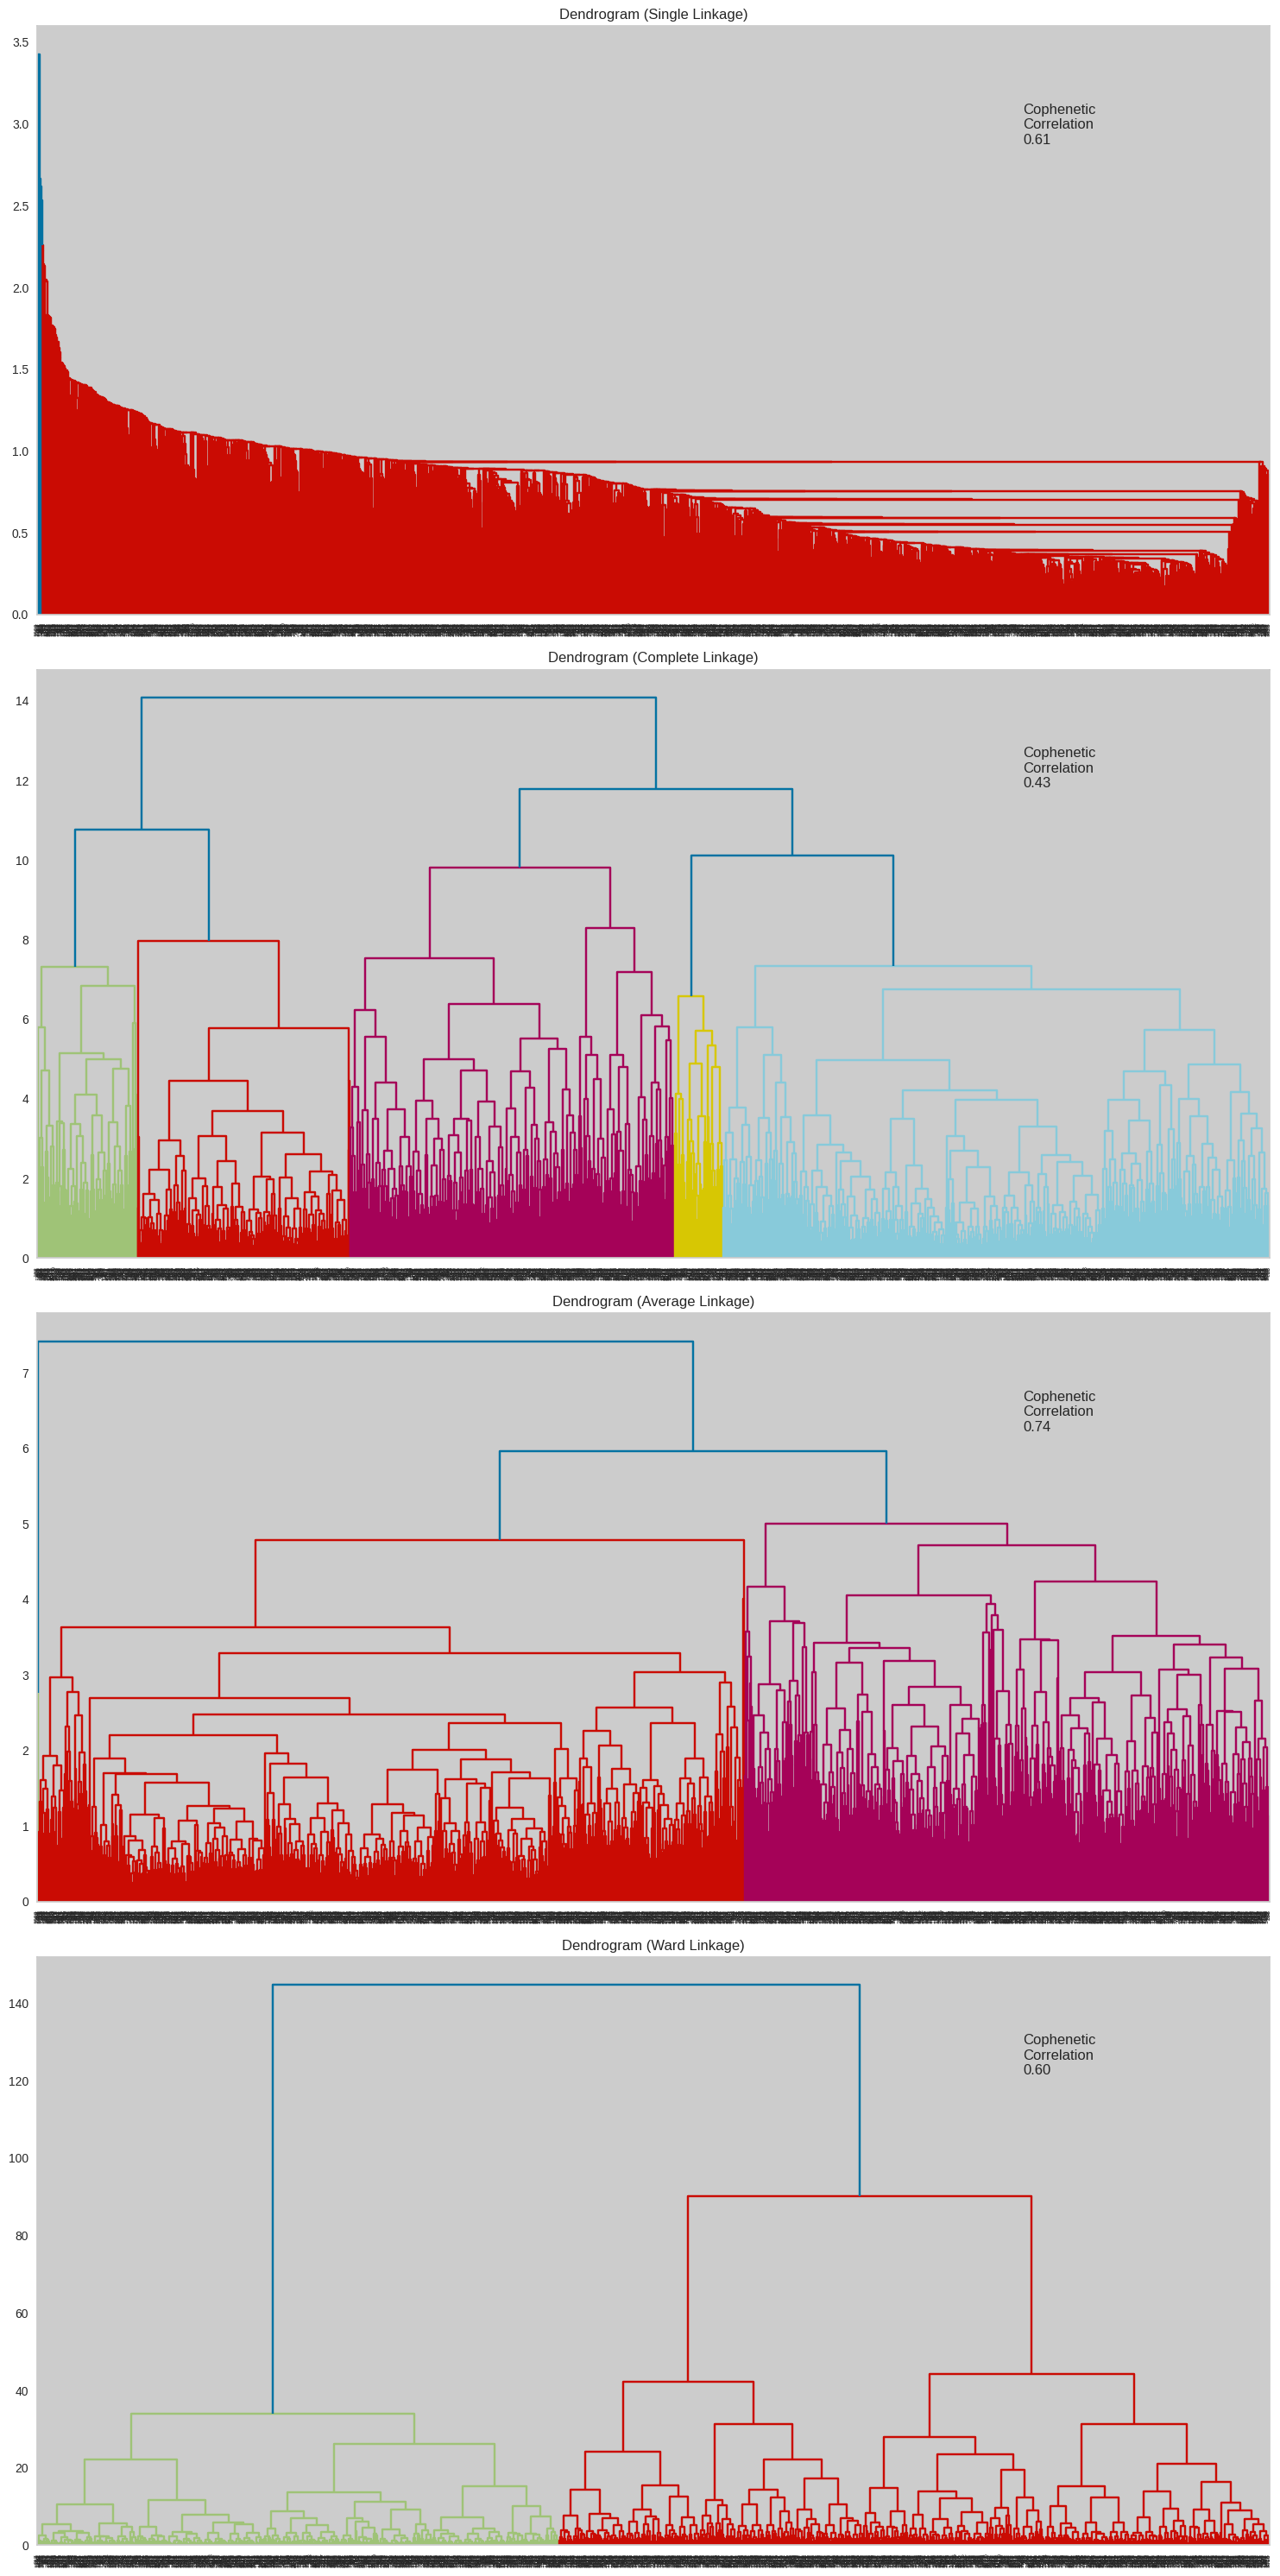

In [ ]:
# Plot the dendrogram for Euclidean distance with linkages single, complete and average, and ward.
# List of linkage methods
linkage_methods = ["single", "complete", "average", "ward"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# Calculate pairwise Euclidean distances once
dist_matrix_euclidean = pdist(data_pca, metric="euclidean")

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    if method == "ward":
        # Ward linkage implicitly uses Euclidean distance, so we don't need to specify the metric here
        Z = linkage(data_pca, method=method)
    else:
        # For other methods, we use the pre-calculated Euclidean distance matrix
        Z = linkage(dist_matrix_euclidean, method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    # Finding cophenetic correlation for different linkages with Euclidean distance
    # We use the pre-calculated Euclidean distance matrix for cophenet calculation
    coph_corr, coph_dist = cophenet(Z, dist_matrix_euclidean)
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()

**Observations**

"Among all linkage methods tested with Euclidean distance, Average Linkage performed the best with a cophenetic correlation of 0.74, indicating a faithful representation of the original distances. It produced clean and interpretable clusters, with a suggested cut around height 5 yielding 2 well-balanced clusters.

In [ ]:
# Initialize Agglomerative Clustering with affinity (distance) as cityblock, linkage as 'average' with clusters=3
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering
HCmodel = AgglomerativeClustering(
    n_clusters=3,
    metric='cityblock',
    linkage='average'
)

# Fit the model on PCA data
HCmodel.fit(data_pca)


AgglomerativeClustering(linkage='average', metric='cityblock', n_clusters=3)

In [ ]:
# Get cluster labels from the fitted model
agglo_labels = HCmodel.labels_

# Add Agglomerative Clustering labels to each dataset
data_pca['AggloLabels'] = agglo_labels
data['AggloLabels'] = agglo_labels
data_model['AggloLabels'] = agglo_labels


In [ ]:
# Let's check the distribution
data_pca["AggloLabels"].value_counts()

AggloLabels
1    1978
0      57
2      14
Name: count, dtype: int64

### **Visualize the clusters using PCA**

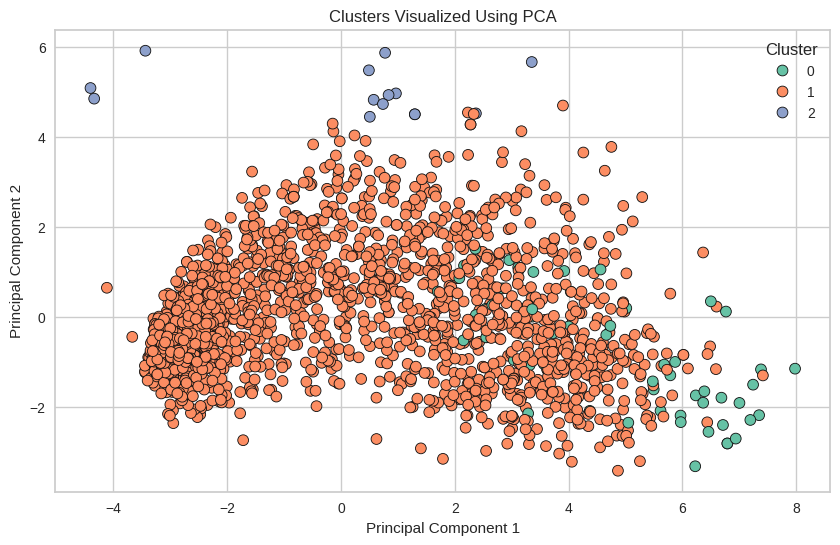

In [ ]:
PCA_PLOT(0, 1, data_pca, "AggloLabels")

**Observations:**
“While the Cityblock + Average linkage combination yielded a high cophenetic correlation (0.75), the PCA visualization reveals a highly imbalanced cluster distribution. Cluster 1 dominates, while Clusters 0 and 2 are sparsely populated, suggesting the segmentation may not be ideal for practical interpretation.”

In [ ]:
# Take the cluster-wise mean of all the variables.
cluster_mean = data_pca.groupby("AggloLabels").mean()
cluster_mean

0         1         2         3         4
AggloLabels                                                  
0            4.781382 -0.834332  2.600068  0.993222 -0.786200
1           -0.138306 -0.011446 -0.073243 -0.022423  0.020920
2            0.073675  5.014140 -0.237804 -0.875750  0.245287

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_mean.style.highlight_max(color="lightgreen", axis=0)

**Lets create boxplot for all columns**


In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

### **Cluster Profiling**

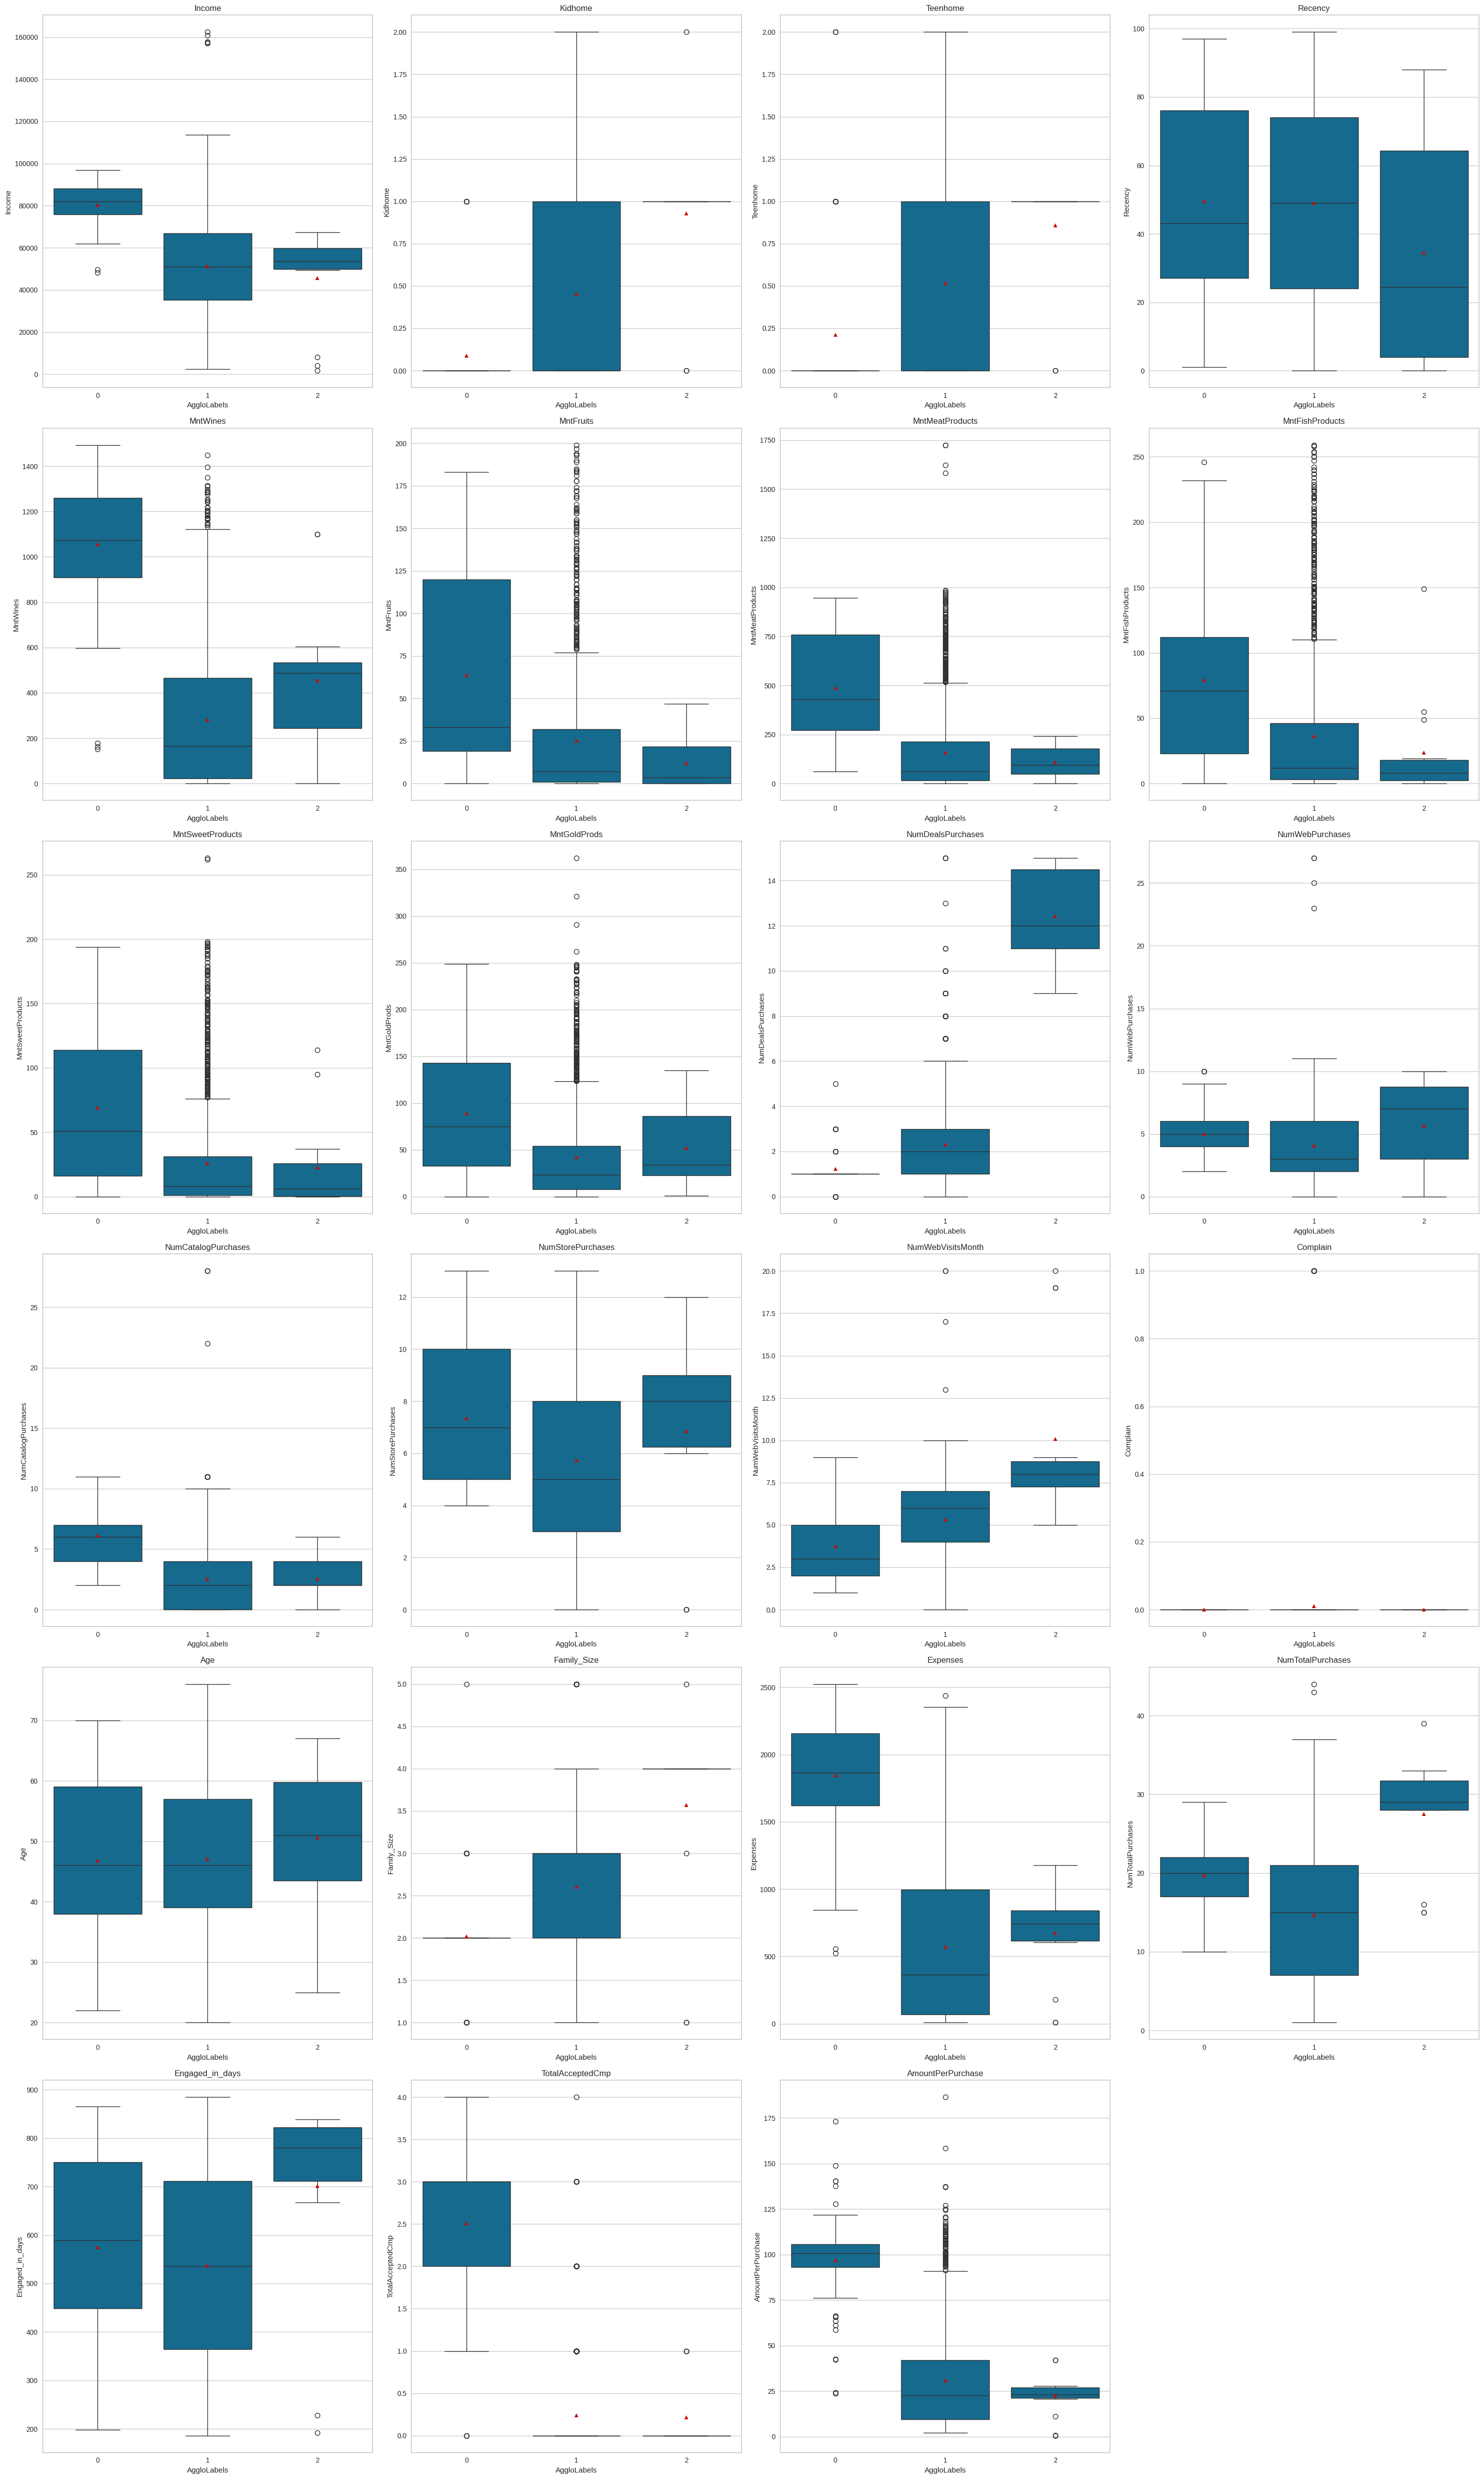

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data[variable], x=data['AggloLabels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary of each cluster:**

**Cluster 1 (Label: 1 — 1978 members)**

* Majority Cluster: This is the dominant segment — over 95% of the data falls into this group.

* Average Everything: Based on the box plots, this cluster tends to represent the “average” consumer — middle income, moderate purchase behavior across all product categories.

* Stable Buyers: They have reasonable spending patterns, moderate recency, decent store and web purchases.

* General Target Audience: Likely to be the focus for most broad marketing strategies.

**Cluster 0 (Label: 0 — 57 members)**
* High-Value, Loyal Shoppers: This group shows higher income, significantly higher spending across almost every product category (Wines, Gold, Meat, etc.).

* Long Engagement: They have the highest engagement days and accepted most campaigns.

* Less Kids/Teens: Often have fewer dependents at home (low Kidhome and Teenhome values).

* VIP Segment: Ideal for premium campaigns, exclusive offers, and loyalty programs.

**Cluster 2 (Label: 2 — 14 members)**
* Low Income, Low Activity: This is a very small segment with lower income, least purchases, and lower engagement.

* Potentially Disengaged or New: Could either be inactive customers or new entrants who haven’t interacted much.

* Ignore or Nurture?: Either ignore for now (cost-saving) or run onboarding/welcome campaigns to increase engagement.

* High Recency: They might’ve interacted recently, so nurturing them could also work.



In [ ]:
#dropping the labels from the data
data_pca.drop('AggloLabels', axis=1, inplace=True)
data.drop('AggloLabels', axis=1, inplace=True)
data_model.drop('AggloLabels', axis=1, inplace=True)

In [ ]:
data_pca

0         1         2         3         4
0     4.445537  0.968115 -1.531135  1.358432 -1.114183
1    -2.939187 -1.207070  0.117466 -0.658421  0.204056
2     1.499029  0.069255 -0.668479 -1.281664 -0.085712
3    -2.675513 -0.747531  0.044116 -1.006499 -0.108352
4    -0.213783  0.562997 -0.767784  0.043080  2.054344
...        ...       ...       ...       ...       ...
2044 -2.840508 -0.798831 -0.355427  1.071047 -0.880829
2045  3.106836  0.731852 -0.946310  0.449800 -0.903237
2046  1.971969 -0.560930  1.681211  0.637216  1.551242
2047  1.776494 -0.199194 -0.334734 -2.220841  0.198082
2048 -2.034189  0.888238 -0.183829  0.483691 -0.855483

[2049 rows x 5 columns]

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if round(high_silhouette_avg, 6) < round(silhouette_avg, 6):
            high_silhouette_avg = silhouette_avg
            high_i_j[0] = i
            high_i_j[1] = j








For eps value =2 For min sample =6 The average silhoutte_score is : 0.35769432372858984
For eps value =2 For min sample =20 The average silhoutte_score is : 0.35372418550219276
For eps value =3 For min sample =6 The average silhoutte_score is : 0.36062801249378473
For eps value =3 For min sample =20 The average silhoutte_score is : 0.36062801249378473


In [ ]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0.36062801249378473 for eps = 3 and min sample = 6


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [ ]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps=2, min_samples=6)


In [ ]:
# Fit and predict cluster labels
dbscan_labels = dbs.fit_predict(data_pca)

# Assign labels to your datasets
data_pca["DBSCAN_Labels"] = dbscan_labels
data_model["DBSCAN_Labels"] = dbscan_labels
data["DBSCAN_Labels"] = dbscan_labels


In [ ]:
# Let's check the distribution

data_pca["DBSCAN_Labels"].value_counts()

DBSCAN_Labels
 0    2034
-1      15
Name: count, dtype: int64

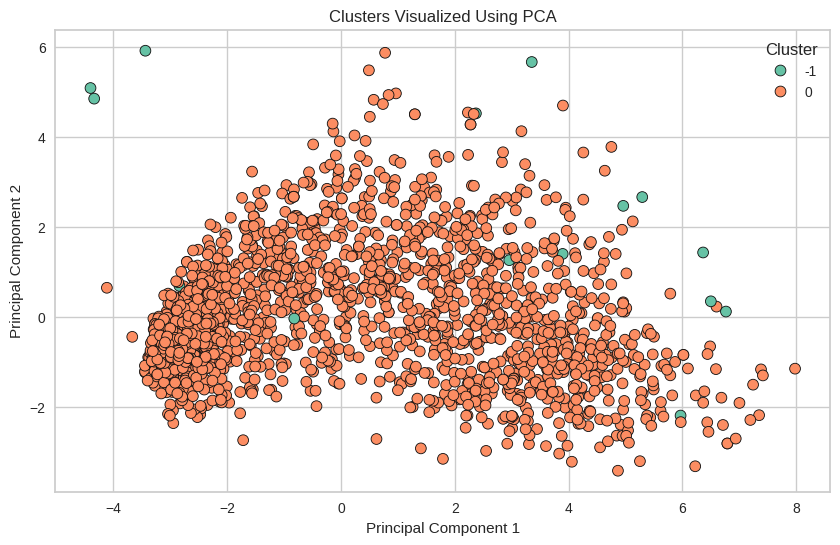

In [ ]:
PCA_PLOT(0, 1, data_pca, "DBSCAN_Labels")

**Observations and Insights:**

**Cluster 0 (Label = 0)**
* Majority of data is assigned to this cluster.

* The cluster is large and dense, forming the core structure of dataset.

* DBSCAN considers this area dense enough based on eps=2 and min_samples=6.

* This single-cluster result with a high silhouette score (0.37) means that  data likely doesn't have clearly separated high-density pockets, at least under the chosen parameters.

**Outliers (Label = -1)**
A very small number of points are labeled as outliers.

These are not dense enough to belong to cluster 0 based on DBSCAN’s definition.

You can review these points to see if they are genuine anomalies or just edge cases.





**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Lets try lowering the eps & min_sample slightly**

In [ ]:
# Initializing lists
eps_value = [0.5,1.5]                       # Taking random eps value
min_sample_values = [4,5,6]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if round(high_silhouette_avg, 6) < round(silhouette_avg, 6):
            high_silhouette_avg = silhouette_avg
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =0.5 For min sample =4 The average silhoutte_score is : -0.2586318909216283
For eps value =0.5 For min sample =5 The average silhoutte_score is : -0.07297848899725891
For eps value =0.5 For min sample =6 The average silhoutte_score is : -0.08883621830889714
For eps value =1.5 For min sample =4 The average silhoutte_score is : 0.21607295780055533
For eps value =1.5 For min sample =5 The average silhoutte_score is : 0.3314215251714268
For eps value =1.5 For min sample =6 The average silhoutte_score is : 0.33056759929475193


In [ ]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0.3314215251714268 for eps = 1.5 and min sample = 5


In [ ]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps=2, min_samples=6)

In [ ]:
# Fit and predict cluster labels
dbscan_labels = dbs.fit_predict(data_pca)

# Assign labels to your datasets
data_pca["DBSCAN_Labels"] = dbscan_labels
data_model["DBSCAN_Labels"] = dbscan_labels
data["DBSCAN_Labels"] = dbscan_labels

In [ ]:
# Let's check the distribution

data_pca["DBSCAN_Labels"].value_counts()

DBSCAN_Labels
 0    2034
-1      15
Name: count, dtype: int64

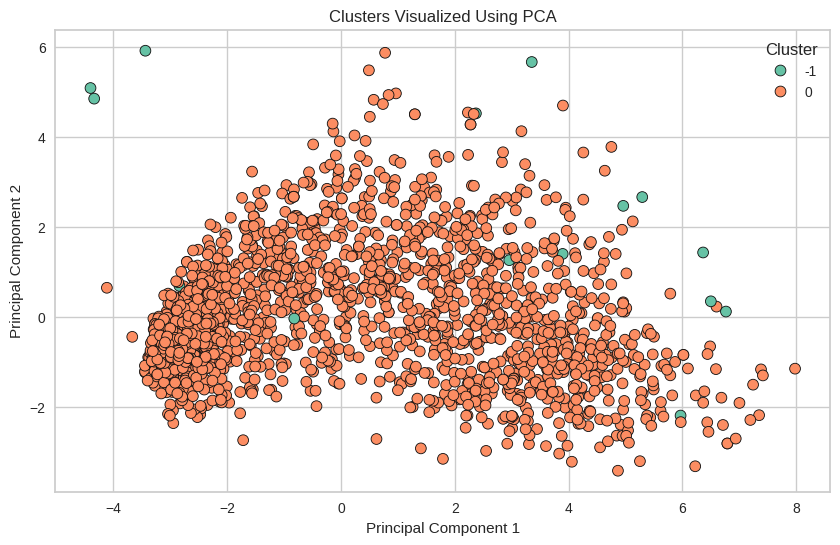

In [ ]:
PCA_PLOT(0, 1, data_pca, "DBSCAN_Labels")

### **Characteristics of each cluster**

**Summary of each cluster:**

**Cluster Summary**:

**Cluster 0**: 2028 points — practically the entire dataset is in one cluster.

**Cluster -1 (Noise)**: 21 points — DBSCAN labeled these as outliers.



* still getting just one dominant cluster, meaning DBSCAN considers most of the dataset as a dense blob.

* The few green dots scattered across the plot (label -1) are noise points, which DBSCAN excludes from clusters because they don't have enough neighboring points within eps = 1.5.

* DBSCAN repeatedly gives only 1 cluster, it might not be the right method for this data.

In [ ]:
# Dropping labels we got from DBSCAN since we will be using PCA data for prediction
data_pca.drop('DBSCAN_Labels', axis=1, inplace=True)
data.drop('DBSCAN_Labels', axis=1, inplace=True)
data_model.drop('DBSCAN_Labels', axis=1, inplace=True)

## **Gaussian Mixture Model**

In [ ]:


# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit and predict
preds = gmm.fit_predict(data_pca)

# Calculate silhouette score
score = silhouette_score(data_pca, preds)

# Print the score
print(score)


0.23594953203274568


In [ ]:
# Predicting on data_pca using the trained GMM model
gmm_labels = gmm.predict(data_pca)

# Add Gaussian Mixture Model cluster labels to the whole data
data['GMM_Labels'] = gmm_labels

# Add Gaussian Mixture Model cluster labels to data_model
data_model['GMM_Labels'] = gmm_labels

# Add Gaussian Mixture Model cluster labels to data_pca
data_pca['GMM_Labels'] = gmm_labels



In [ ]:
# Let's check the distribution
data_pca["GMM_Labels"].value_counts()

GMM_Labels
2    695
0    685
1    669
Name: count, dtype: int64

### **Visualize the clusters using PCA**

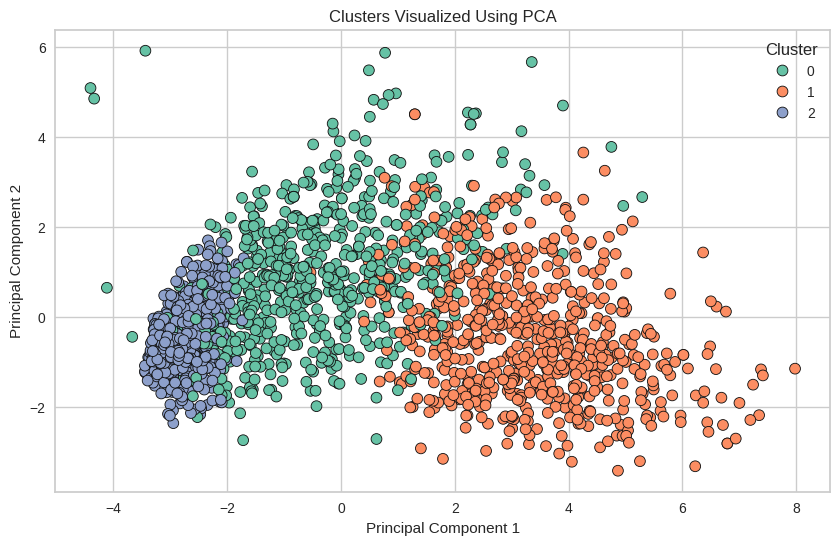

In [ ]:
PCA_PLOT(0, 1, data_pca, "GMM_Labels")

**Observations and Insights:**

* Each of the three clusters (Cluster 0, Cluster 1, and Cluster 2) has a relatively even distribution:

 Cluster 0: 685 points

 Cluster 1: 669 points

 Cluster 2: 695 points
This indicates good separation and no dominant cluster.

* The clusters are well-separated in the PCA plot. GMM forms elliptical boundaries, which is useful when data isn't separated in a purely spherical manner like in KMeans.


* Even though this visualization shows hard labels, GMM assigns probabilities of belonging to each cluster. This can help in identifying borderline cases if needed (e.g., customers with mixed behavior).


* Compared to DBSCAN and Hierarchical, GMM seems to capture the shape and spread of  data more naturally—especially the overlapping regions in the center.

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables
cluster_mean = data_pca.groupby("GMM_Labels").mean()
cluster_mean


0         1         2         3         4
GMM_Labels                                                  
0          -0.441770  0.902517 -0.009321 -0.251899  0.238414
1           3.295265 -0.431475  0.078341  0.088375 -0.104496
2          -2.736575 -0.474198 -0.066223  0.163206 -0.134398

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_mean.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

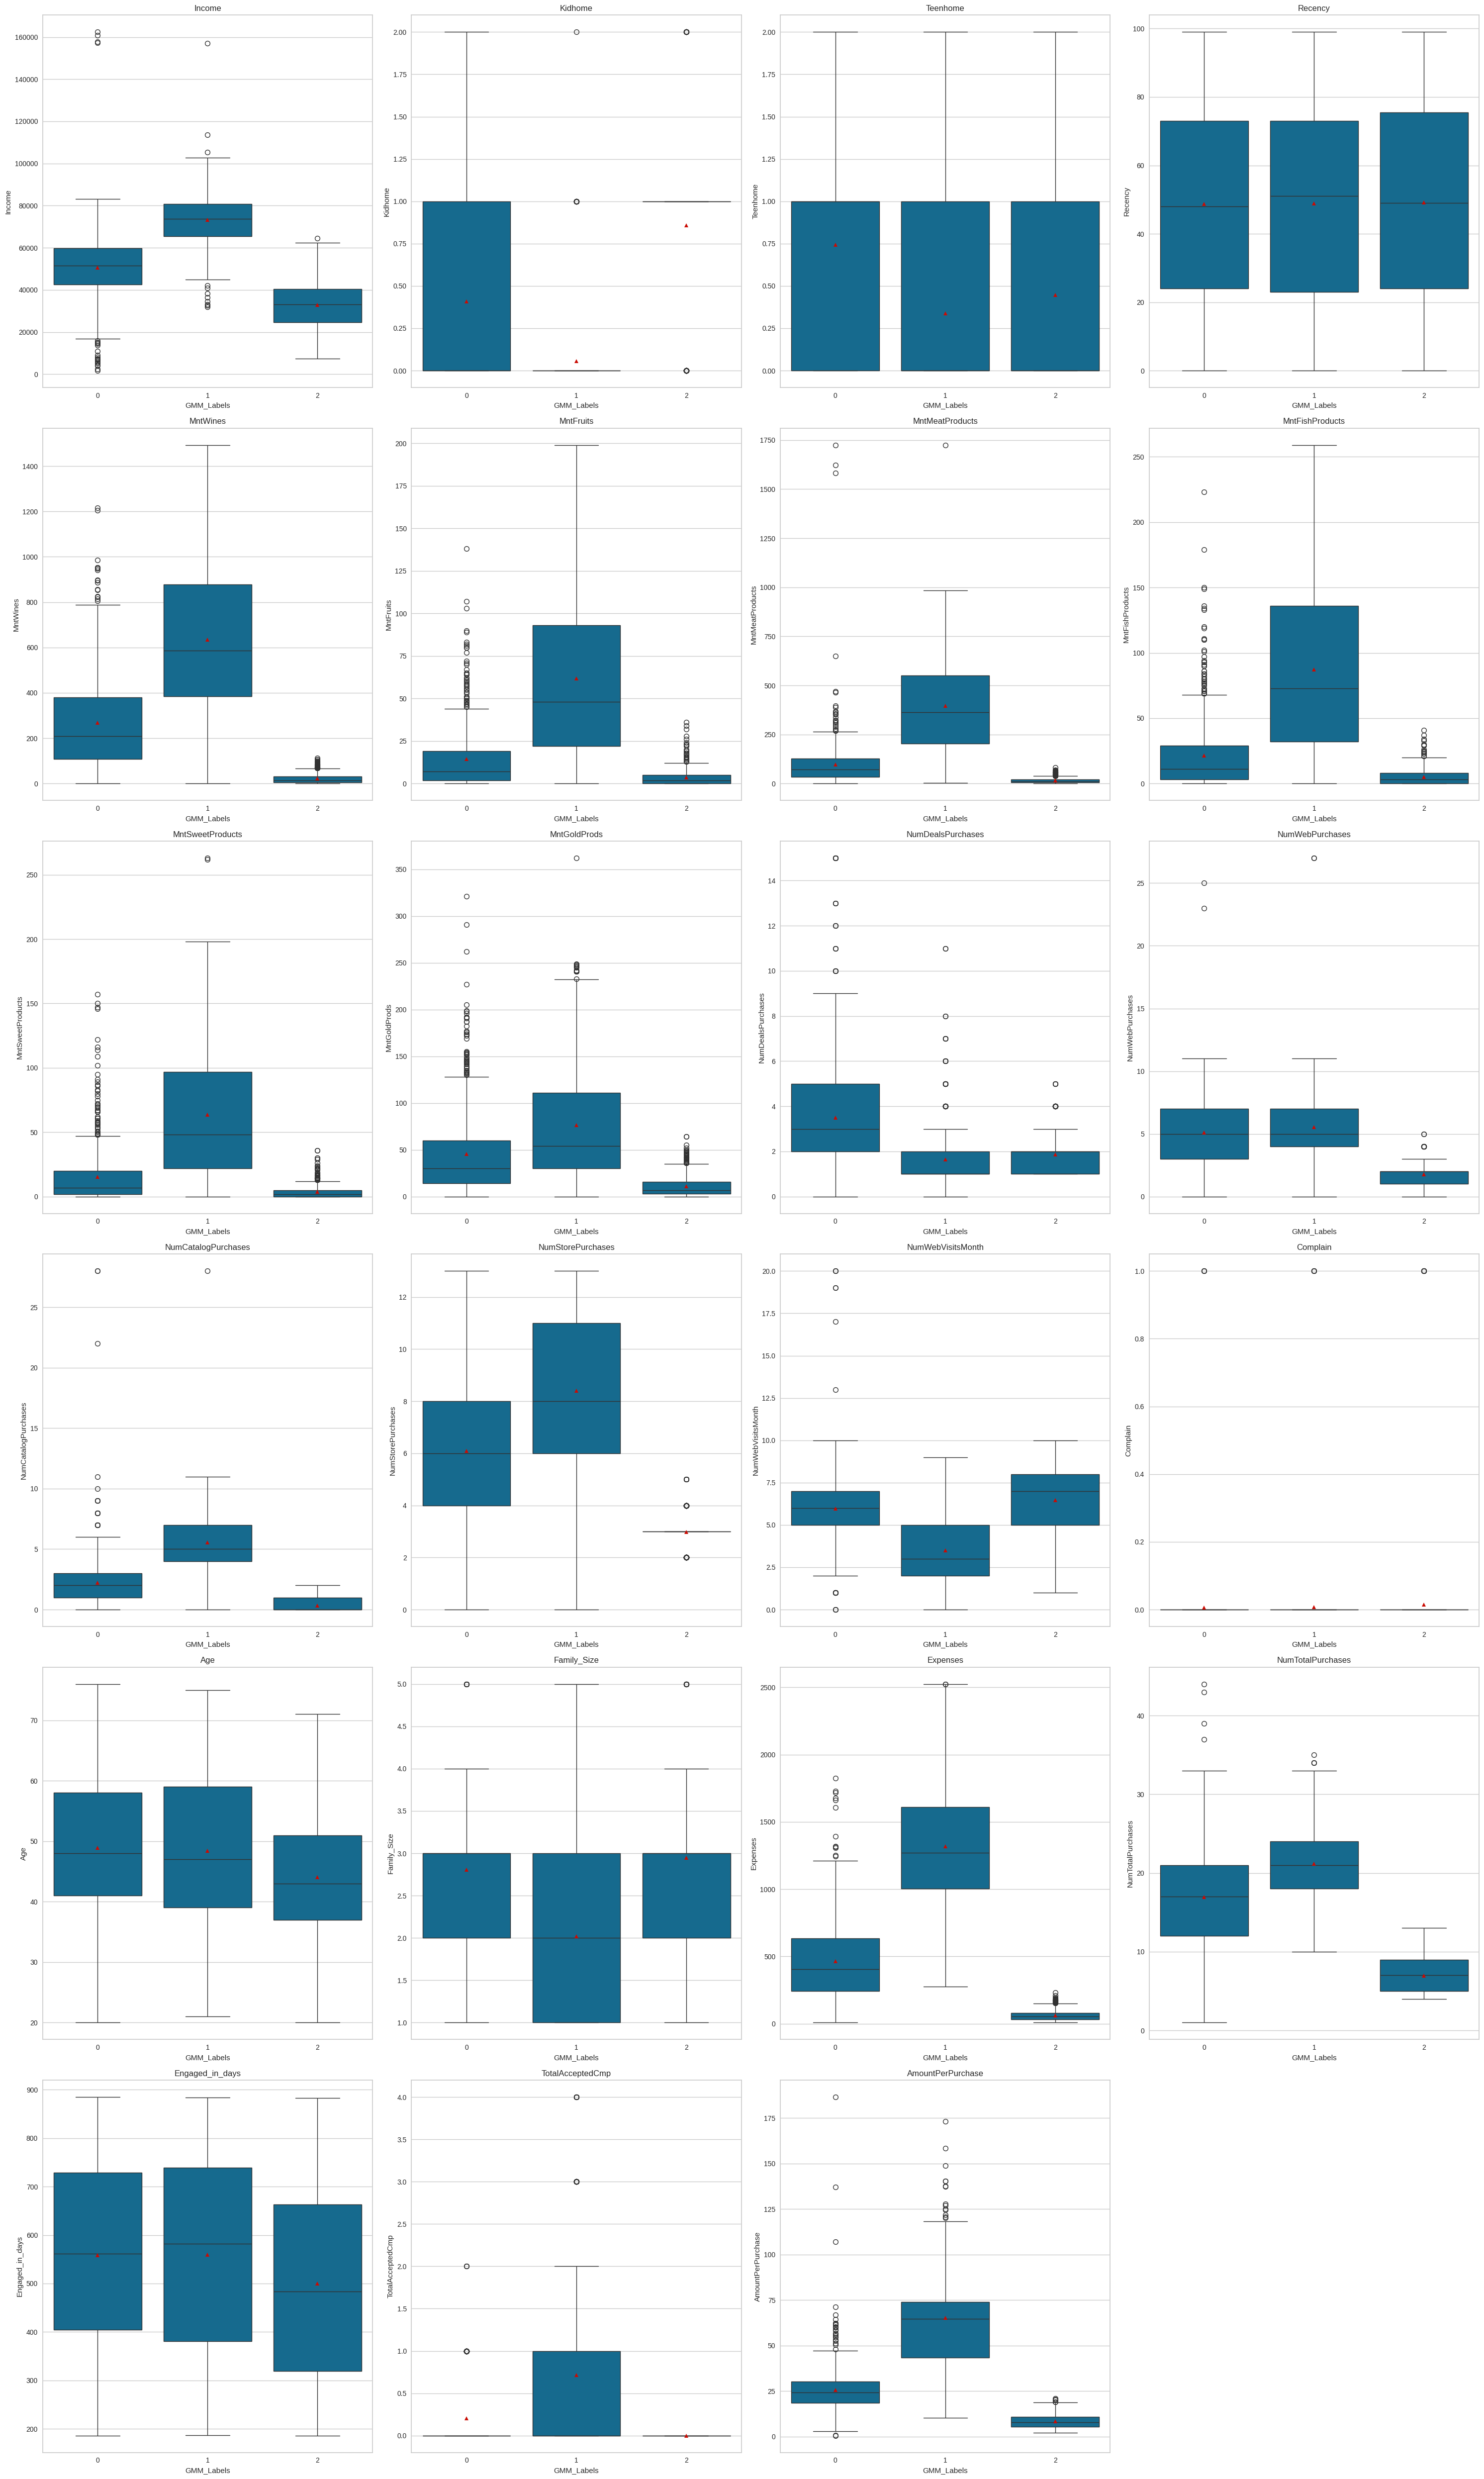

In [ ]:
# Create boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data[variable], x=data['GMM_Labels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**


### **Characteristics of each cluster**

**Summary of each cluster:**

**Cluster 0 (Green)**

*  Moderate Income, Low Engagement

* Medium income range, not the highest nor the lowest among the clusters.

* A mix of Kidhome and Teenhome values; moderate family size.

* Moderate spenders on Wines, Fruits, and Meat.

* Lower expenses compared to Cluster 1 but higher than Cluster 2.

* Average number of store/catalog/web purchases.

* Average number of campaigns accepted.

* Moderate Engagement_in_days with the brand.

* Generally steady consumers, not high spenders but show consistent engagement.

**Cluster 1 (Orange)**
* High Income, High Engagement Power Users

* Income: Highest among all clusters.

* Family Composition: Least likely to have kids at home (Kidhome and Teenhome values low).

* Highest spending across all product categories: Wines, Fruits, Meat, Fish, Sweets, Gold.

* Highest total expenses and amount per purchase.

* High store/catalog/web purchases.

* More promotional campaign acceptance.

* Most engaged users over time.

* Premium, loyal and responsive customers. Best group for targeting upsells and loyalty programs.

**Cluster 2 (Blue/Purple)**
* Low Income, Low Activity and Response

* Lowest of all three clusters.

* Similar family size to others but no prominent purchasing behavior.

* Very low spending across all categories.

* Almost negligible expenses and amount per purchase.

* Minimal purchases across all channels.

* Very low to zero campaign engagement.

* Least engaged in terms of days and loyalty.

* Likely uninterested or low-value customers. Possibly students or disengaged individuals.

Summary:
Cluster 1 is  prime audience – high income, highly active, and responsive.

Cluster 0 represents moderate but stable consumers, a good secondary market.

Cluster 2 is the low-priority segment – likely needs different or minimal engagement strategies.

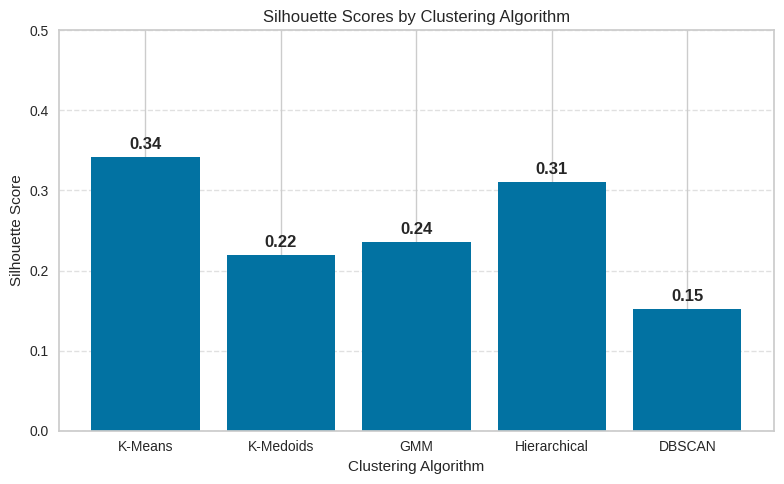

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Store your silhouette scores
silhouette_scores = {
    'K-Means': 0.3422,
    'K-Medoids': 0.2195,
    'GMM': 0.2360,
    'Hierarchical': 0.3110,
    'DBSCAN': 0.1520
}

# Step 2: Plot
plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values())

# Step 3: Add labels
plt.title('Silhouette Scores by Clustering Algorithm')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 0.5)  # Adjust based on your highest score
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Step 4: Annotate score values on top of bars
for i, score in enumerate(silhouette_scores.values()):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontweight='bold')

plt.t
